<img src="../assets/images/ga_logo.png" width="500"> <br>

# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

**Every day in every region we see or encounter or hear about an accident happen, and we lose peoples from these accidents, sometimes from a mistake from another driver and sometimes from the environment itself. By analyzing these two datasets we're trying to get and understand the relationship between the driving licenses and the accidents and find a technique or solution to decrease the number of accidents in Saudi Arabia. by using the Driving Licenses, Traffic Accidents datasets from 1993-2017 for licenses and from 2016-2017 for the accidents.<br><br>**

## Executive Summary


**We're going to take a look at the number of traffic accidents and driving licenses issued in Saudi Arabia. We'll seek to identify trends in the data and combine our data analysis with outside research to identify likely factors influencing the outcomes of traffic accidents in the various regions in Saudi Arabia. And we will use graphs, statistics, and some other resources to provide a good overview of the accidents in Saudi Arabia and how to improve and reduce the accidents that happen here. we will be looking in:**
- Which region has the most accidents.
- Which region has the most licenses.
- How the regions are doing over the years.
- And some other general information about the time period of this data.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_summary import DataFrameSummary as DFS
import statistics
from scipy.stats import mode
from ipywidgets import interact
import ipywidgets as widgets

#Set styles
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.style.use('fivethirtyeight')
%matplotlib inline

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
drive_lic = pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv', sep=';')
traffic_acc = pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv', sep=';')

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
drive_lic.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


In [4]:
traffic_acc.head(10)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


---------------------------------------------------------------------------------------------------------------------

#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer:
Both of datasets have a data sperated by (;), and starts with index from 0 to end, second data set has two indexes.
First data seems have no NaN values for now but it may have after we go deep but second one got one after showing the head for the frist 10 rows. And first two columns (like index) is without name.

First dataset contain the data for driving Licenses with relaseing date and where the license came out from 1993 to 2017.<br>
Second dataset contain the data for Saudi Arabia Traffic Accidents and Casualties by Region from 2016 to 2017.

#### 4a. How complete is the data?

Investigate missing values etc.

In [5]:
#Drive dataset NULLs
drive_lic.isnull().sum()

Unnamed: 0              0
Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64

In [6]:
#Traffic dataset NULLs
traffic_acc.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

### Missing values
Both datasets contain NaNs values, the First dataset have 25 NaN in the geo_point_2d column, and the second dataset have 6 NaNs in the same column

---------------------------------------------------------------------------------------------------------------------

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [7]:
print(f'Drive Minimum value:-\n{drive_lic.min()}\n')      #Min value in drive dataset;
print(f'Drive Maximum value:-\n{drive_lic.max()}\n\n')    #Max value in drive dataset;
print(f'Traffic Minimum value:-\n {traffic_acc.min()}\n') #Min value in drive dataset;
print(f'Traffic Maximum value:-\n {traffic_acc.max()}')   #Max value in drive dataset;

Drive Minimum value:-
Unnamed: 0                   0
Year                    (1993)
Administritive Area    Al-Baha
Driving Liceses        100291n
dtype: object

Drive Maximum value:-
Unnamed: 0                349
Year                   (2017)
Administritive Area     Total
Driving Liceses         9983n
dtype: object


Traffic Minimum value:-
 Unnamed: 0                     0
Unnamed: 0.1                   0
Year                      (2016)
Region                  Al-Baaha
Indicator       No. of Accidents
Value                      1007n
dtype: object

Traffic Maximum value:-
 Unnamed: 0                               83
Unnamed: 0.1                             83
Year                                 (2017)
Region                                Total
Indicator       No. of Casualties - Injured
Value                                99925n
dtype: object


**There are some datapoints represented incorrectly. ex. Year, Value.**

---------------------------------------------------------------------------------------------------------------------

#### 5. What are your data types? 
Display the data types of each feature. 

In [8]:
drive_lic.dtypes

Unnamed: 0              int64
Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object

**There are some error types in Drive datset**

In [9]:
traffic_acc.dtypes

Unnamed: 0       int64
Unnamed: 0.1     int64
Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object

**There are some error types in Traffic datset**

---------------------------------------------------------------------------------------------------------------------

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 

### Saudi-arabia-driving-licenses:

- <b>Year:<br></b>
<b>Type: str</b> - it should be an int. <br>
<br>
- <b>Driving Liceses:<br></b>
<b>Type: str</b> - it should be an int and remove 'n's. <br>
<br>

- <b>geo_point_2d:<br></b>
<b>Type: str</b> - it should be a float. <br>


### Saudi-arabia-traffic-accidents:

- <b>Unnamed: 0 and Unnamed: 0.1:<br></b>
<b>Type: int</b> - Are duplicated they have the same values but nothing wrong with the type.<br>
<br>
- <b>Year:<br></b>
<b>Type: str</b> - it should be an int. <br>
<br>
- <b>Value:<br></b>
<b>Type: str</b> - it should be an int and remove 'n'.<br>
<br>
- <b>geo_point_2d:<br></b>
<b>Type: str</b> - it should be a float. <br>

---------------------------------------------------------------------------------------------------------------------

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [10]:
def to_numeric(col):
    "A function take a neumric column as input and convert it to integer, return the converted column "
    
    #convert each value one by one in column;
    numeric_col = col.apply((lambda x: int(x))) 
    return numeric_col

---------------------------------------------------------------------------------------------------------------------

- Make new columns `x` and `y` using `geo_point_2d`

In [11]:
# x and y for Driver dataset;

#split the data point [0] = x, [-1] = y, then add it to the dataset as column;

drive_lic['x'] = drive_lic.geo_point_2d.apply(lambda x: list(str(x).split(','))[0]) 

drive_lic['y'] = drive_lic.geo_point_2d.apply(lambda x: list(str(x).split(','))[-1])

drive_lic.head(2) #Print the first two records in Driver dataset;

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334",21.628962766,41.2636898334


In [12]:
# x and y for Traffic dataset;

#split the data point [0] = x, [-1] = y, then add it to the dataset as column;
traffic_acc['x'] = traffic_acc.geo_point_2d.apply(lambda x: list(str(x).split(','))[0])
traffic_acc['y'] = traffic_acc.geo_point_2d.apply(lambda x: list(str(x).split(','))[-1])

traffic_acc.head(2) #Print the first two records in Traffic dataset;

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d,x,y
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439


---------------------------------------------------------------------------------------------------------------------

- Fix any individual values preventing other columns from being the appropriate type.

In [13]:
#Driver dataset:

#Removing () from year column;
drive_lic.Year = drive_lic.Year.str.replace('[(,)]', '')

In [14]:
# Remove letter 'n' from Driver dataset; by using replace each 'n' with '' (delete it);
drive_lic['Driving Liceses'] = drive_lic['Driving Liceses'].str.replace('n', '')

drive_lic.head(2)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628962766,41.2636898334


**I used replace because i found that i don't need to use a loop and itterate when a method can do it + I can always filter the column wihtout need to re-read the dataset, because it will try to replace the old values which is already cleaned and it will rise an error except if i use if-else. But replace will find which data i need and clean it.**

_________________________________________________________________________________________________________________________

**Removing () from year column**


In [15]:
#Traffic dataset;

#Removing () from year column;
traffic_acc.Year = traffic_acc.Year.str.replace('[(,)]', '')

**Remove letter 'n' from value**

In [16]:
#Traffic dataset;

#Remove letter 'n' from value;
traffic_acc['Value'] = traffic_acc['Value'].str.replace('n', '')

traffic_acc.head(2)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d,x,y
0,0,0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1,1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439


---------------------------------------------------------------------------------------------------------------------

- Finish your data modifications by making sure the columns are now typed appropriately.

**Saudi-arabia-driving-licenses converting to numeric by sending each needed column to the user-defin-function:**

In [17]:
# Send year column to to_numeric;
drive_lic['Year'] = to_numeric(drive_lic['Year']) 

# Send Driving Liceses column to to_numeric;
drive_lic['Driving Liceses'] = to_numeric(drive_lic['Driving Liceses']) 

# Change x column from STR to Float;
drive_lic.x = drive_lic.x.apply(lambda x: float(x)) 

# Change y column from STR to Float;
drive_lic.y = drive_lic.y.apply(lambda x: float(x)) 

In [18]:
drive_lic.dtypes

Unnamed: 0               int64
Year                     int64
Administritive Area     object
Driving Liceses          int64
geo_point_2d            object
x                      float64
y                      float64
dtype: object

**Saudi-arabia-traffic-accidents converting to numeric by sending each needed column to the user-defin-function:**

In [19]:
#Saudi-arabia-traffic-accidents converting to numeric by sending each needed column to the pre-defin-function:

# Send year column to to_numeric;
traffic_acc.Year = to_numeric(traffic_acc.Year) 

# Send Driving Liceses column to to_numeric;
traffic_acc['Value'] = to_numeric(traffic_acc['Value'])

# Change x column from STR to Float;
traffic_acc.x = traffic_acc.x.apply(lambda x: float(x)) 

# Change y column from STR to Float;
traffic_acc.y = traffic_acc.y.apply(lambda x: float(x)) 

**Re-naming region values for fixing splling errors and use the same names for both sets.**<br>
**Run these two CODES ONLY ONCE, if u run it again it will cut off some values because names changed:**

In [20]:
#Print the Unique values on datasets for Administritive Area;
print('Old values:\n',drive_lic['Administritive Area'].unique())

#Dictonary for all columns with new and old names;
driver_regoin_names = {'Al-Baha': 'Al_Baha',    
                       'Al-Jouf': 'Al_Jouf',    
                       'Al-Qaseem': 'Qassim',
                       'Hail': 'Hail',
                       'Jazan': 'Jazan',
                       'Madinah': 'Madinah',
                       'Makkah': 'Makkah',
                       'Najran': 'Najran',
                       'Assir': 'Asir',
                       'Eastern': 'Eastern_Region',
                       'Northern Boarder': 'Northern_Border',
                       'Tabouk': 'Tabuk',
                       'Riyadh':'Riyadh',
                       'Total': 'Total'}

#Mapping each item to new value
drive_lic['Administritive Area'] = drive_lic['Administritive Area'].map(driver_regoin_names)

print('\nNewvalues:\n',drive_lic['Administritive Area'].unique())

Old values:
 ['Makkah' 'Madinah' 'Al-Qaseem' 'Eastern' 'Assir' 'Tabouk' 'Hail'
 'Northern Boarder' 'Jazan' 'Najran' 'Al-Baha' 'Al-Jouf' 'Total' 'Riyadh']

Newvalues:
 ['Makkah' 'Madinah' 'Qassim' 'Eastern_Region' 'Asir' 'Tabuk' 'Hail'
 'Northern_Border' 'Jazan' 'Najran' 'Al_Baha' 'Al_Jouf' 'Total' 'Riyadh']


In [21]:
#Print the Unique values on datasets for Administritive Area;
print('Old values:\n',traffic_acc['Region'].unique())

#Dictonary for all columns with new and old names,;
trafrfic_regoin_names = {'Makkah': 'Makkah', 
                        'Eastern Region': 'Eastern_Region',
                        'Tabouk': 'Tabuk',
                        'Hail': 'Hail',
                        'Northern Boarder':'Northern_Border',
                        'Jazan': 'Jazan',
                        'Al-Jouf': 'Al_Jouf', 
                        'Total': 'Total',
                        'Al-Baaha': 'Al_Baha',
                        'Riyadh':'Riyadh',
                        'Madinah': 'Madinah',
                        'Qassim': 'Qassim',
                        'Najran': 'Najran',
                        'Asir': 'Asir'}   

#Mapping each item to new value;
traffic_acc['Region'] = traffic_acc['Region'].map(trafrfic_regoin_names) 

print('\nNewvalues:\n',traffic_acc['Region'].unique())


Old values:
 ['Makkah' 'Eastern Region' 'Tabouk' 'Hail' 'Northern Boarder' 'Jazan'
 'Al-Jouf' 'Total' 'Al-Baaha' 'Riyadh' 'Madinah' 'Qassim' 'Najran' 'Asir']

Newvalues:
 ['Makkah' 'Eastern_Region' 'Tabuk' 'Hail' 'Northern_Border' 'Jazan'
 'Al_Jouf' 'Total' 'Al_Baha' 'Riyadh' 'Madinah' 'Qassim' 'Najran' 'Asir']


**Re-naming Indicator values for fixing valeus to be optimal**

In [22]:
#Print the Unique values on datasets for Administritive Area;
print('Old values:\n',traffic_acc['Indicator'].unique())

#Dictonary for all columns with new and old names,;
trafrfic_regoin_names = {'No. of Casualties - Injured': 'no_injured', 
                         'No. of Casualties - Dead': 'no_dead',
                         'No. of Accidents': 'no_accidents'}  

#Mapping each item to new value;
traffic_acc['Indicator'] = traffic_acc['Indicator'].map(trafrfic_regoin_names) 

print('\nNewvalues:\n',traffic_acc['Indicator'].unique())

Old values:
 ['No. of Casualties - Injured' 'No. of Casualties - Dead'
 'No. of Accidents']

Newvalues:
 ['no_injured' 'no_dead' 'no_accidents']


**Droping columns**

In [23]:
#droping duplicated column;
drive_lic.drop(columns='Unnamed: 0', inplace=True) 

#droping unused column;
drive_lic.drop(columns='geo_point_2d', inplace=True) 

#droping duplicated column;
traffic_acc.drop(columns='Unnamed: 0', inplace=True)

#droping duplicated column;
traffic_acc.drop(columns='Unnamed: 0.1', inplace=True)

#droping unused column;
traffic_acc.drop(columns='geo_point_2d', inplace=True) 

---------------------------------------------------------------------------------------------------------------------

- Display the data types again to confirm they are correct.

In [24]:
drive_lic.dtypes

Year                     int64
Administritive Area     object
Driving Liceses          int64
x                      float64
y                      float64
dtype: object

In [25]:
traffic_acc.dtypes

Year           int64
Region        object
Indicator     object
Value          int64
x            float64
y            float64
dtype: object

---------------------------------------------------------------------------------------------------------------------

#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [26]:
#Saudi-arabia-driving-licenses columns renaming:;

#Dict of new names
driving_Cols = {'Year':'year',
                'Administritive Area':'region',
                'Driving Liceses':'number_of_licenses',
                'x':'region_x',
                'y':'region_y'}

#Rename the columns
drive_lic.rename(columns=driving_Cols, inplace=True)
drive_lic.head()

,year,region,number_of_licenses,region_x,region_y
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369
2,1998,Makkah,86082,21.628963,41.26369
3,2004,Makkah,86636,21.628963,41.26369
4,2005,Makkah,65099,21.628963,41.26369


In [27]:
#Saudi-arabia-traffic-accidents columns renaming:

#Dict of new names
traffic_Cols = {'Year':'year',
                'Region': 'region',
                'Indicator':'accident_indicator',
                'Value':'indicator_value',
                'x':'region_x',
                'y':'region_y'} 

#Rename the columns
traffic_acc.rename(columns=traffic_Cols, inplace=True)
traffic_acc.head()

,year,region,accident_indicator,indicator_value,region_x,region_y
0,2016,Makkah,no_injured,12383,21.628963,41.263690
1,2016,Eastern_Region,no_dead,1113,23.288331,50.147830
2,2016,Tabuk,no_dead,434,27.901655,37.259858
3,2016,Hail,no_dead,299,27.400846,41.440696
4,2016,Hail,no_accidents,10199,27.400846,41.440696


---------------------------------------------------------------------------------------------------------------------

#### 8. Create a data dictionary

|Feature|Type|Dataset|Description|
|:--|:-:|:--|:---|
|**year**|*int*|Driving_Licenses|A time period for extracted driver licenses per year.|
|**region**|*object*|Driving_Licenses|Areas of Driver licenses.|
|**number_of_licenses**|*int*|Driving_Licenses|Total Number of driver licenses for each area over time.|
|**region_x**|*float*|Driving_Licenses|Latitude coordinate.|
|**region_y**|*float*|Driving_Licenses|Longitude coordinate.|

|Feature|Type|Dataset|Description|
|:--|:-:|:--|:---|
|**year**|*int*|Traffic_Accidents|A time period for accidents happened per year|
|**region**|*object*|Traffic_Accidents|Region of the accidents for each area. |
|**accident_indicator**|*object*|Traffic_Accidents|An indicator type for the accident for each area. No. of Accidents, Dead, or Injured |
|**indicator_value**|*int*|Traffic_Accidents|A value corresponding the indicator|
|**region_x**|*float*|Traffic_Accidents|Latitude coordinate|
|**region_y**|*float*|Traffic_Accidents|Longitude coordinate|

---------------------------------------------------------------------------------------------------------------------

#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:

0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

**Answer 0:**

**As we can see the value "Total" isn't a region but we can't drop it unless we are sure it's useless and not an important or affect the data.**

In [28]:
#"Total row" are not associated with region;
drive_lic.region.unique()

array(['Makkah', 'Madinah', 'Qassim', 'Eastern_Region', 'Asir', 'Tabuk',
       'Hail', 'Northern_Border', 'Jazan', 'Najran', 'Al_Baha', 'Al_Jouf',
       'Total', 'Riyadh'], dtype=object)

In [29]:
#"Total row" are not associated with region;
traffic_acc.region.unique()

array(['Makkah', 'Eastern_Region', 'Tabuk', 'Hail', 'Northern_Border',
       'Jazan', 'Al_Jouf', 'Total', 'Al_Baha', 'Riyadh', 'Madinah',
       'Qassim', 'Najran', 'Asir'], dtype=object)

---------------------------------------------------------------------------------------------------------------------

**Answer 1:**

**The Total here after doing the pivot appeard it contains the total number licences each year. But it appeared in the regoin column which is wrong.**

In [30]:
drive_lic_copy = drive_lic.copy()

drive_lic_copy = drive_lic_copy.pivot(index=["region"], 
                                      columns=["year"],
                                      values="number_of_licenses").reset_index()
drive_lic_copy.columns.name=None
drive_lic_copy

,region,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Al_Baha,3270,2729,2423,1468,3027,5110,4246,4832,7594,...,5418,9815,7076,6450,7593,7482,7268,4856,4614,4131
1,Al_Jouf,2884,2535,2270,2518,3565,3476,3950,4666,4756,...,10929,10567,10937,10180,10246,11602,9982,10233,9371,8091
2,Asir,6226,5185,4889,3319,12204,13220,14625,18622,20321,...,18800,21582,21835,24515,23136,29730,29552,38567,41367,39133
3,Eastern_Region,9964,10918,7831,8461,58814,70650,64973,65767,74119,...,104626,108544,110295,151087,129971,123325,121774,135752,142307,126816
4,Hail,10484,11131,9735,10267,6606,4708,3139,3215,6077,...,7413,7282,7637,9123,11082,9731,10417,7172,54507,22035
5,Jazan,6009,3826,2284,2226,5695,2613,4792,5678,10631,...,11346,9437,12270,10946,11156,14175,15621,13931,11504,18345
6,Madinah,4122,3767,4155,3425,10495,13020,11108,9562,13561,...,9194,11574,15045,14630,14459,28513,31447,22744,24540,36165
7,Makkah,65977,75349,60356,46195,76623,86082,103535,87053,85593,...,77013,112045,113531,110647,143954,131108,149234,157389,136055,142487
8,Najran,3769,3880,3268,3274,3073,4322,3959,4905,4950,...,7938,6771,6360,7314,9201,8996,9601,1864,2153,13825
9,Northern_Border,1510,1457,1318,1383,1531,2014,2311,2894,2971,...,3519,3649,3064,4314,3706,3921,5009,3837,4958,5280


In [31]:
# drive_lic_copy.iloc[:-1,1] = all row from first column except last row cuz it's the total value;

tot = sum([i for i in drive_lic_copy.iloc[:-1,1]])

print('Total for first row =', drive_lic_copy.iloc[-1,1])
print('Sum of all value in first column for year[1993] =',tot)

Total for first row = 294893
Sum of all value in first column for year[1993] = 294893


**The Total here after doing the pivot appeard it contains the total number of Casualties for both (Injured, Dead) and Accidents for each year for all regions. But it appeared in the regoin column which is wrong.**

In [32]:
traffic_acc_copy = traffic_acc.copy()
traffic_acc_copy = traffic_acc_copy.pivot(index="region", 
                                          columns=["year", "accident_indicator"],
                                          values='indicator_value')
traffic_acc_copy.columns.name = None
traffic_acc_copy

year                     2016                              2017          \
accident_indicator no_injured no_dead no_accidents no_accidents no_dead   
region                                                                    
Al_Baha                  1227     185         3618         1414     134   
Al_Jouf                   920     245        10212        10469     240   
Asir                     2541     983        32684        25245     828   
Eastern_Region           4893    1113       101619        81433     963   
Hail                      932     299        10199         9379     265   
Jazan                    2259     514        25873        22161     466   
Madinah                  4184     822        14475        16070     580   
Makkah                  12383    2243       134838       145541    1641   
Najran                    706     173         3235         3193     194   
Northern_Border           631     193        13196        11540     112   
Qassim                   1513     397        25664        22405     319   
Riyadh                   4207    1430       141736        99925    1399   
Tabuk                    1724     434        16031        11713     348   
Total                   38120    9031       533380       460488    7489   

year                           
accident_indicator no_injured  
region                         
Al_Baha                  1007  
Al_Jouf                   862  
Asir                     2368  
Eastern_Region           4073  
Hail                      773  
Jazan                    2207  
Madinah                  2917  
Makkah                  10623  
Najran                    766  
Northern_Border           374  
Qassim                   1446  
Riyadh                   4540  
Tabuk                    1243  
Total                   33199

In [33]:
# traffic_acc_copy.iloc[:,0][0:13] #all values from first column except last row cuz it's total;

tot = sum([i for i in traffic_acc_copy.iloc[:,0][0:13]])
print('Total for first column =',traffic_acc_copy.iloc[:,0][-1])
print('Sum of all value in first column =',tot)

Total for first column = 38120
Sum of all value in first column = 38120


---------------------------------------------------------------------------------------------------------------------

**Answer 2:**

In [34]:
#Show the unique values of region column;
drive_lic.region.unique() 

array(['Makkah', 'Madinah', 'Qassim', 'Eastern_Region', 'Asir', 'Tabuk',
       'Hail', 'Northern_Border', 'Jazan', 'Najran', 'Al_Baha', 'Al_Jouf',
       'Total', 'Riyadh'], dtype=object)

**Removing "Total" rows from both datasets**

In [35]:
#Get the index for 'Total' rows;
total_indx = drive_lic.index[drive_lic.region == 'Total'].tolist() 

#drop row by index using list total_indx;                                                                 
drive_lic.drop(total_indx, inplace=True)    

#Show number of rows affected by "Total" after drop;
drive_lic[drive_lic.region == 'Total'].count()                    

year                  0
region                0
number_of_licenses    0
region_x              0
region_y              0
dtype: int64

**We can see that all "Total" rows have been deleted and no longer appeared**

---------------------------------------------------------------------------------------------------------------------

In [36]:
traffic_acc.region.unique() #Show the unique values of region.;

array(['Makkah', 'Eastern_Region', 'Tabuk', 'Hail', 'Northern_Border',
       'Jazan', 'Al_Jouf', 'Total', 'Al_Baha', 'Riyadh', 'Madinah',
       'Qassim', 'Najran', 'Asir'], dtype=object)

In [37]:
#Get the index for 'Total' rows;
total_indx = traffic_acc.index[traffic_acc.region == 'Total'].tolist() 

#drop row by index using list total_indx;
traffic_acc.drop(total_indx, inplace=True)    

#Show number of rows affected by "Total";
traffic_acc[traffic_acc.region == 'Total'].count()                     

year                  0
region                0
accident_indicator    0
indicator_value       0
region_x              0
region_y              0
dtype: int64

**We can see that all "Total" rows have been deleted and no longer appeared**

---------------------------------------------------------------------------------------------------------------------

#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

In [38]:
#print the head of drive data;
drive_lic.head(3) 

,year,region,number_of_licenses,region_x,region_y
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369
2,1998,Makkah,86082,21.628963,41.26369


**Licenses data are in wide format:**<br> 
Each row is one year point per region. So each region will have data for each single year. And each data variable are in seperate column.

In [39]:
#print the head of drive data;
traffic_acc.tail(5)

,year,region,accident_indicator,indicator_value,region_x,region_y
79,2017,Asir,no_injured,2368,19.138785,42.941470
80,2017,Hail,no_injured,773,27.400846,41.440696
81,2017,Al_Baha,no_dead,134,20.148406,41.466548
82,2017,Al_Baha,no_accidents,1414,20.148406,41.466548
83,2017,Al_Baha,no_injured,1007,20.148406,41.466548


**Accidents data are in long format :**<br>
Each data point in accident_indicator represents a variable for each region wither it's (Injured, dead, or Accidents), in a particular year, so these variables are Injured, dead and Accidents are making the data set long because each category is taking 3 rows for single region.

_________________________________________________________________________________________________________________________

#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

**Wide format**

In [40]:
#Before converting;
traffic_acc.head()

,year,region,accident_indicator,indicator_value,region_x,region_y
0,2016,Makkah,no_injured,12383,21.628963,41.263690
1,2016,Eastern_Region,no_dead,1113,23.288331,50.147830
2,2016,Tabuk,no_dead,434,27.901655,37.259858
3,2016,Hail,no_dead,299,27.400846,41.440696
4,2016,Hail,no_accidents,10199,27.400846,41.440696


In [41]:
traffic_acc_wide = traffic_acc.copy()

#From long to wide;
traffic_acc_wide = traffic_acc_wide.pivot_table(index=['year','region'],
                                                columns='accident_indicator',
                                                values='indicator_value').reset_index()

traffic_acc_wide.columns.name=None
traffic_acc_wide.head() #After converting;

,year,region,no_accidents,no_dead,no_injured
0,2016,Al_Baha,3618,185,1227
1,2016,Al_Jouf,10212,245,920
2,2016,Asir,32684,983,2541
3,2016,Eastern_Region,101619,1113,4893
4,2016,Hail,10199,299,932


#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [42]:
#merging
inner_df = pd.merge(drive_lic, traffic_acc_wide, 
                      left_on=['region', 'year'],
                      right_on=['region', 'year'],
                      how='inner')

In [43]:
#merging
outer_df = pd.merge(drive_lic, traffic_acc_wide, 
                      left_on=['region', 'year'],
                      right_on=['region', 'year'],
                      how='outer')
outer_df.head()

,year,region,number_of_licenses,region_x,region_y,no_accidents,no_dead,no_injured
0,2012,Makkah,143954,21.628963,41.26369,NaN,NaN,NaN
1,1994,Makkah,75349,21.628963,41.26369,NaN,NaN,NaN
2,1998,Makkah,86082,21.628963,41.26369,NaN,NaN,NaN
3,2004,Makkah,86636,21.628963,41.26369,NaN,NaN,NaN
4,2005,Makkah,65099,21.628963,41.26369,NaN,NaN,NaN


**If i used the "Outer" join i'll get a 299 NaNs and it's imposible to fill it up and the type of value of data, and it will be a waste of most of the cleaning i did above. 
And if i use inner i'll waste a lot of observations too but i'll get a meaningful data but only for 2 years (2016-17), so i decied to go with outer for anything that not affected by nulls.<br>**

#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [44]:
outer_df.to_csv("../data/combined_datasets.csv")

---------------------------------------------------------------------------------------------------------------------

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

**(`inner_join`) means the two datasets with inner join, if i'll use the original dataset i'll make a comment describing why i used original rather than `inner one`**

In [45]:
outer_df.describe().T #Transpose the describe output;

,count,mean,std,min,25%,50%,75%,max
year,325.0,2005.000000,7.222222,1993.000000,1999.000000,2005.000000,2011.000000,2017.000000
number_of_licenses,325.0,28915.347692,47419.058819,915.000000,4846.000000,10267.000000,25423.000000,495307.000000
region_x,325.0,23.810447,4.197987,17.207231,20.148406,23.288331,27.400846,30.197075
region_y,325.0,42.602789,3.254196,37.259858,41.263690,41.817119,43.343000,50.147830
no_accidents,26.0,38225.692308,46493.705035,1414.000000,10276.250000,16050.500000,30981.250000,145541.000000
no_dead,26.0,635.384615,549.783381,112.000000,241.250000,415.500000,929.250000,2243.000000
no_injured,26.0,2743.038462,2922.641127,374.000000,923.000000,1618.500000,3784.000000,12383.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [46]:
def std_cal(col):
    
    #Calculate the mean;
    mean = sum(col)/len(col)
    
    #For each elm, find the square of its distance to mean;
    dev = [(elm - mean)**2 for elm in col]
    
    #Calcualte variance;
    Var = sum(dev)/len(col)
    
    #Calcualte STD;
    std = Var**(1/2)
    
    return round(std,6)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [47]:
#Get the numeric column and itterate through each column name, using dictionary comprehension ; 
sd = {i:std_cal(outer_df[i].dropna()) for i in outer_df.select_dtypes('number').columns} 
sd

{'year': 7.211103,
 'number_of_licenses': 47346.050217,
 'region_x': 4.191524,
 'region_y': 3.249185,
 'no_accidents': 45590.828699,
 'no_dead': 539.106959,
 'no_injured': 2865.885411}

In [48]:
#Column (Year) contain no NaN, no_accidents column contain NaNs;
outer_df.year.dropna().count(), outer_df.no_accidents.dropna().count()
#return the len of each column wihtout Nans;

(325, 26)

**By sending the column with the *`.dropna()`* and wihout `inplace = True`, i can get the len of each column without the nulls values affecting my dataframe and affect the calculation.**

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [52]:
#numpy;
np.std(outer_df)

year                      7.211103
number_of_licenses    47346.050217
region_x                  4.191524
region_y                  3.249185
no_accidents          45590.828699
no_dead                 539.106959
no_injured             2865.885411
dtype: float64

In [53]:
#Panda;
outer_df.describe()

,year,number_of_licenses,region_x,region_y,no_accidents,no_dead,no_injured
count,325.000000,325.000000,325.000000,325.000000,26.000000,26.000000,26.000000
mean,2005.000000,28915.347692,23.810447,42.602789,38225.692308,635.384615,2743.038462
std,7.222222,47419.058819,4.197987,3.254196,46493.705035,549.783381,2922.641127
min,1993.000000,915.000000,17.207231,37.259858,1414.000000,112.000000,374.000000
25%,1999.000000,4846.000000,20.148406,41.263690,10276.250000,241.250000,923.000000
50%,2005.000000,10267.000000,23.288331,41.817119,16050.500000,415.500000,1618.500000
75%,2011.000000,25423.000000,27.400846,43.343000,30981.250000,929.250000,3784.000000
max,2017.000000,495307.000000,30.197075,50.147830,145541.000000,2243.000000,12383.000000


Answer:

**It almost match up with .describe() output, and as we can see my beautiful function could calculate the *std* but not as pandas did.**<br>
But for numpy's std functiuon it did match it 100%, and this is because:
- Pandas is using [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction) by default which is simply the *std* with N-1 instead of N in the denominator. [CODE](https://github.com/pandas-dev/pandas/blob/v1.1.5/pandas/core/generic.py#L11484-L11500), [Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html).
- While Numpy is using the [*std* formula as](https://numpy.org/doc/stable/reference/generated/numpy.std.html):
$std = sqrt(mean(abs(x - x.mean())**2))$ **where** $x.sum() / N,$ **where** $N = len(x)$

 `_________________________________________________________________________________________________________________________`

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:
- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

- **Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)**

In [49]:
#Groupby 'region' and aggregate by the max of 'number_of_licenses', then sort the values based on 'number_of_licenses';
outer_df.groupby('region')[['number_of_licenses']].max().sort_values(by=['number_of_licenses'],ascending=False).head()

,number_of_licenses
region,
Riyadh,495307
Makkah,157389
Eastern_Region,151087
Qassim,73618
Hail,54507


 - **I think it already known that Riyadh will be at the top becuase of how big it's and it's the capital of Saudi Arabia.**

In [55]:
#Groupby 'region' and aggregate by the min of 'number_of_licenses', then sort the values based on 'number_of_licenses';
outer_df.groupby('region')[['number_of_licenses']].min().sort_values(by=['number_of_licenses'],ascending=True).head()

# outer_df[['year', 'region', 'number_of_licenses']].sort_values('number_of_licenses',ascending=True).head()

,number_of_licenses
region,
Tabuk,915
Al_Baha,997
Northern_Border,1318
Najran,1864
Jazan,2226


___________________________________________________________________________________________________________________________

- **Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)**

In [50]:
#Groupby 'region' and aggregate by the mean of 'no_accidents', then sort the values based on 'no_accidents';
outer_df.groupby('region')[['no_accidents']].mean().sort_values('no_accidents',ascending=False).head()

,no_accidents
region,
Makkah,140189.5
Riyadh,120830.5
Eastern_Region,91526.0
Asir,28964.5
Qassim,24034.5


- **Makkah get the top in the no.accidents is really wierd, it got more than the Riyadh. But i think it's understandable because of how people come to visit Makkah from around of the world and how Taxies are in thier with huge numbers**

In [51]:
#Groupby 'region' and aggregate by the mean of 'no_accidents', then sort the values based on 'no_accidents';
outer_df.groupby('region')[['no_accidents']].mean().sort_values('no_accidents').head()

,no_accidents
region,
Al_Baha,2516.0
Najran,3214.0
Hail,9789.0
Al_Jouf,10340.5
Northern_Border,12368.0


- **Al_Baha is the lowest region in accidents**

___________________________________________________________________________________________________________________________

- **What are the regions that have more Driving Licenses issued in each year than the year average?**

In [52]:
#Create an empty dataframe
sub_df = pd.DataFrame() 

#Get the mean for number_of_licenses for every year, ['year', 'mean']
years_mean = outer_df.groupby('year')['number_of_licenses'].mean().reset_index().sort_values('year',ascending=True)

#itterate on number of years in year_mean, where year_mean.loc[i][0] = years, and year_mean.loc[i][1] = mean of the year
for i in range(len(years_mean)): 
    sub_df = sub_df.append(outer_df[
                                    (outer_df["year"] == years_mean.loc[i][0]) &   #Compare year
                                    (outer_df["number_of_licenses"] > years_mean.loc[i][1]) 
                                   ])#Check the current licenses > mean year

sub_df.sort_values('number_of_licenses', ascending=False).head(10) #Print the first 10 rows

,year,region,number_of_licenses,region_x,region_y,no_accidents,no_dead,no_injured
271,2017,Riyadh,495307,23.081434,45.585751,99925.0,1399.0,4540.0
272,2016,Riyadh,242851,23.081434,45.585751,141736.0,1430.0,4207.0
140,2014,Riyadh,194208,23.081434,45.585751,NaN,NaN,NaN
59,2013,Riyadh,165994,23.081434,45.585751,NaN,NaN,NaN
62,2015,Makkah,157389,21.628963,41.263690,NaN,NaN,NaN
89,2011,Eastern_Region,151087,23.288331,50.147830,NaN,NaN,NaN
66,2014,Makkah,149234,21.628963,41.263690,NaN,NaN,NaN
0,2012,Makkah,143954,21.628963,41.263690,NaN,NaN,NaN
142,2017,Makkah,142487,21.628963,41.263690,145541.0,1641.0,10623.0
235,2016,Eastern_Region,142307,23.288331,50.147830,101619.0,1113.0,4893.0


___________________________________________________________________________________________________________________________


- **What are the regions that have more Traffic Accidents happened in each year than the year average?**

In [53]:
#Create an empty dataframe
sub_df1 = pd.DataFrame()

#Get the mean for no_accidents for every year, ['year', 'mean']
years_mean1 = inner_df.groupby('year')['no_accidents'].mean().reset_index().sort_values('year',ascending=True)

#itterate on number of years in year_mean, where year_mean.loc[i][0] = years, and year_mean.loc[i][1] = mean of the year
for j in range(len(years_mean1)): #itterate on number of years in year_mean
    sub_df1 = sub_df1.append(
                             inner_df[(inner_df["year"] == years_mean1.loc[j][0]) & #Compare year
                                      (inner_df["no_accidents"] > years_mean1.loc[j][1]) 
                                     ]) #Check the current licenses > mean year
                                  
sub_df1.sort_values('no_accidents', ascending=False)

,year,region,number_of_licenses,region_x,region_y,no_accidents,no_dead,no_injured
8,2017,Makkah,142487,21.628963,41.263690,145541,1641,10623
22,2016,Riyadh,242851,23.081434,45.585751,141736,1430,4207
9,2016,Makkah,136055,21.628963,41.263690,134838,2243,12383
16,2016,Eastern_Region,142307,23.288331,50.147830,101619,1113,4893
21,2017,Riyadh,495307,23.081434,45.585751,99925,1399,4540
4,2017,Eastern_Region,126816,23.288331,50.147830,81433,963,4073


- **We still have `Riyadh` and `Makkah` as one of the top 3 regions for `number_of_licenses` and `no_accidents` for `2016` & `2017`.**
- **I used here the `inner_df`, because it will give me the needed time of serires that i need 2016, 2017.**

# Summary
- **Well based on the above sorting and exploration of all of the 4 points: `Riyadh` , `Makkah` and `Eastern_Region`. Are really intrested for me. They have a high numbers when we talk about `number of licenses` and `no accidents` over all region and years. But for number of licenses `Riyadh` is number 1 with a huge gap bewteen regions with almost `500k` licenses in a single year `2017`. Riyadh is expecting an inreasing in number of licenses because each year the number is increasing in `2016` we got `242,851` and in 2017 we got `495,307` almost `+49%`incresing over single year. So based on that i think `Riyadh` will get more number of licenses in `2018-2020` more than past years. And same for `Makkah` and `Eastern_Region`**

`___________________________________________________________________________________________________________________________`

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

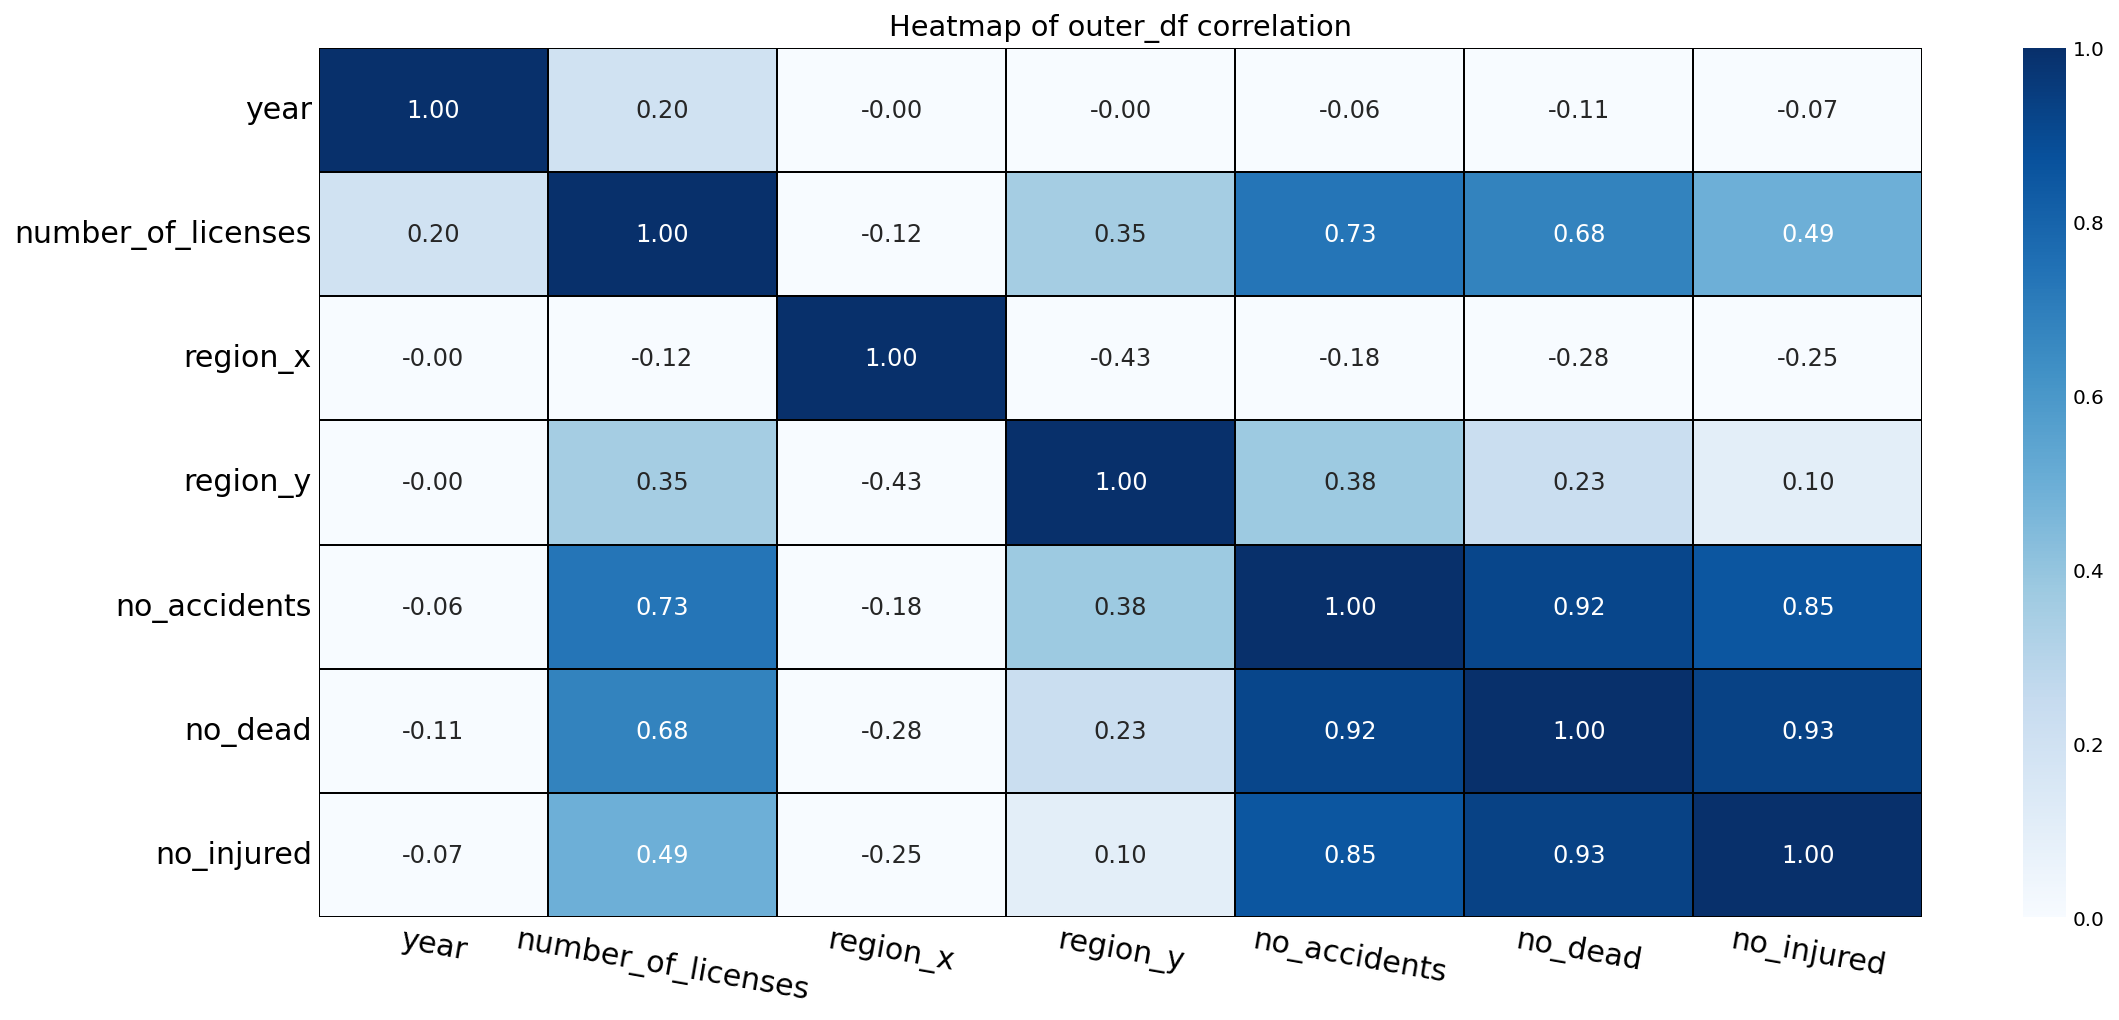

In [54]:
fig1 = plt.subplots(figsize=(16,8)) #Create a figure with 16,8 inchs;

sns.heatmap(outer_df.corr(), annot=True,
            linewidths = 0.5,       #size of the edge of the cells;
            vmin = 0.0,             #min value;
            vmax = 1.0,             #max value;
            linecolor = 'black',    #Color of edges of cell;
            annot_kws={"size": 12}, #increase the size of numbers inside cells.;
            fmt='.2f',              #Print the first 2 digits after the point.;
            cmap = 'Blues');        #Color of the cmap;

plt.xticks(rotation=-10,  horizontalalignment='center', fontsize=15)
plt.yticks(verticalalignment='center', fontsize=15)

plt.title('Heatmap of outer_df correlation'); #title of the figure;

**From above `heatmap`, i've visulaized the correlation between all columns so it becomes better to recognize the relation bewteen each feature and other. The more blue it goes the more correlation we get.<br> And we can see `num of licenses` is highly correlated wih `no_accidents`, and `no_dead` is high correlated with `num of licenses`**
- `NaN` is excluded from correlation because `.corr()` is exluding `NaNs` check [.corr() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html).


___________________________________________________________________________________________________________________________

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [55]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    """A function to create a histograms, param: dataframe, list_of_columns, list_of_titles, list_of_xlabels"""
    
    nrows = int(len(list_of_columns)/2) #Get the number of columns in list_of_columns and devided it by 2;
                
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(16,8), tight_layout=True) #Create a figure;

    ax = ax.ravel()
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists;
        ax[i].hist(dataframe[column],
                   color='skyblue',   #Set the color;
                   histtype = 'bar',  #Set the type of histogram;
                   edgecolor='black') #Set the edge color;
        
        ax[i].set_title(list_of_titles[i]+'\n', fontdict=font);  #Set the title;
        ax[i].set_xlabel('\n'+list_of_xlabels[i], fontdict=font) #Set the label x;
        ax[i].set_ylabel('count\n', fontdict=font)               #Set label y
        ax[i].tick_params(axis="x", labelsize=15)                #change size of xticks
        ax[i].tick_params(axis="y", labelsize=15)                #Change the size of yticks

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

In [56]:
#Costumize the labels
font = {'family': 'serif', #Font;
        'color':  'brown', #color;
        'weight': 'bold',  #weight (bold, regilar);
        'size': 20,        #Font size;
        }

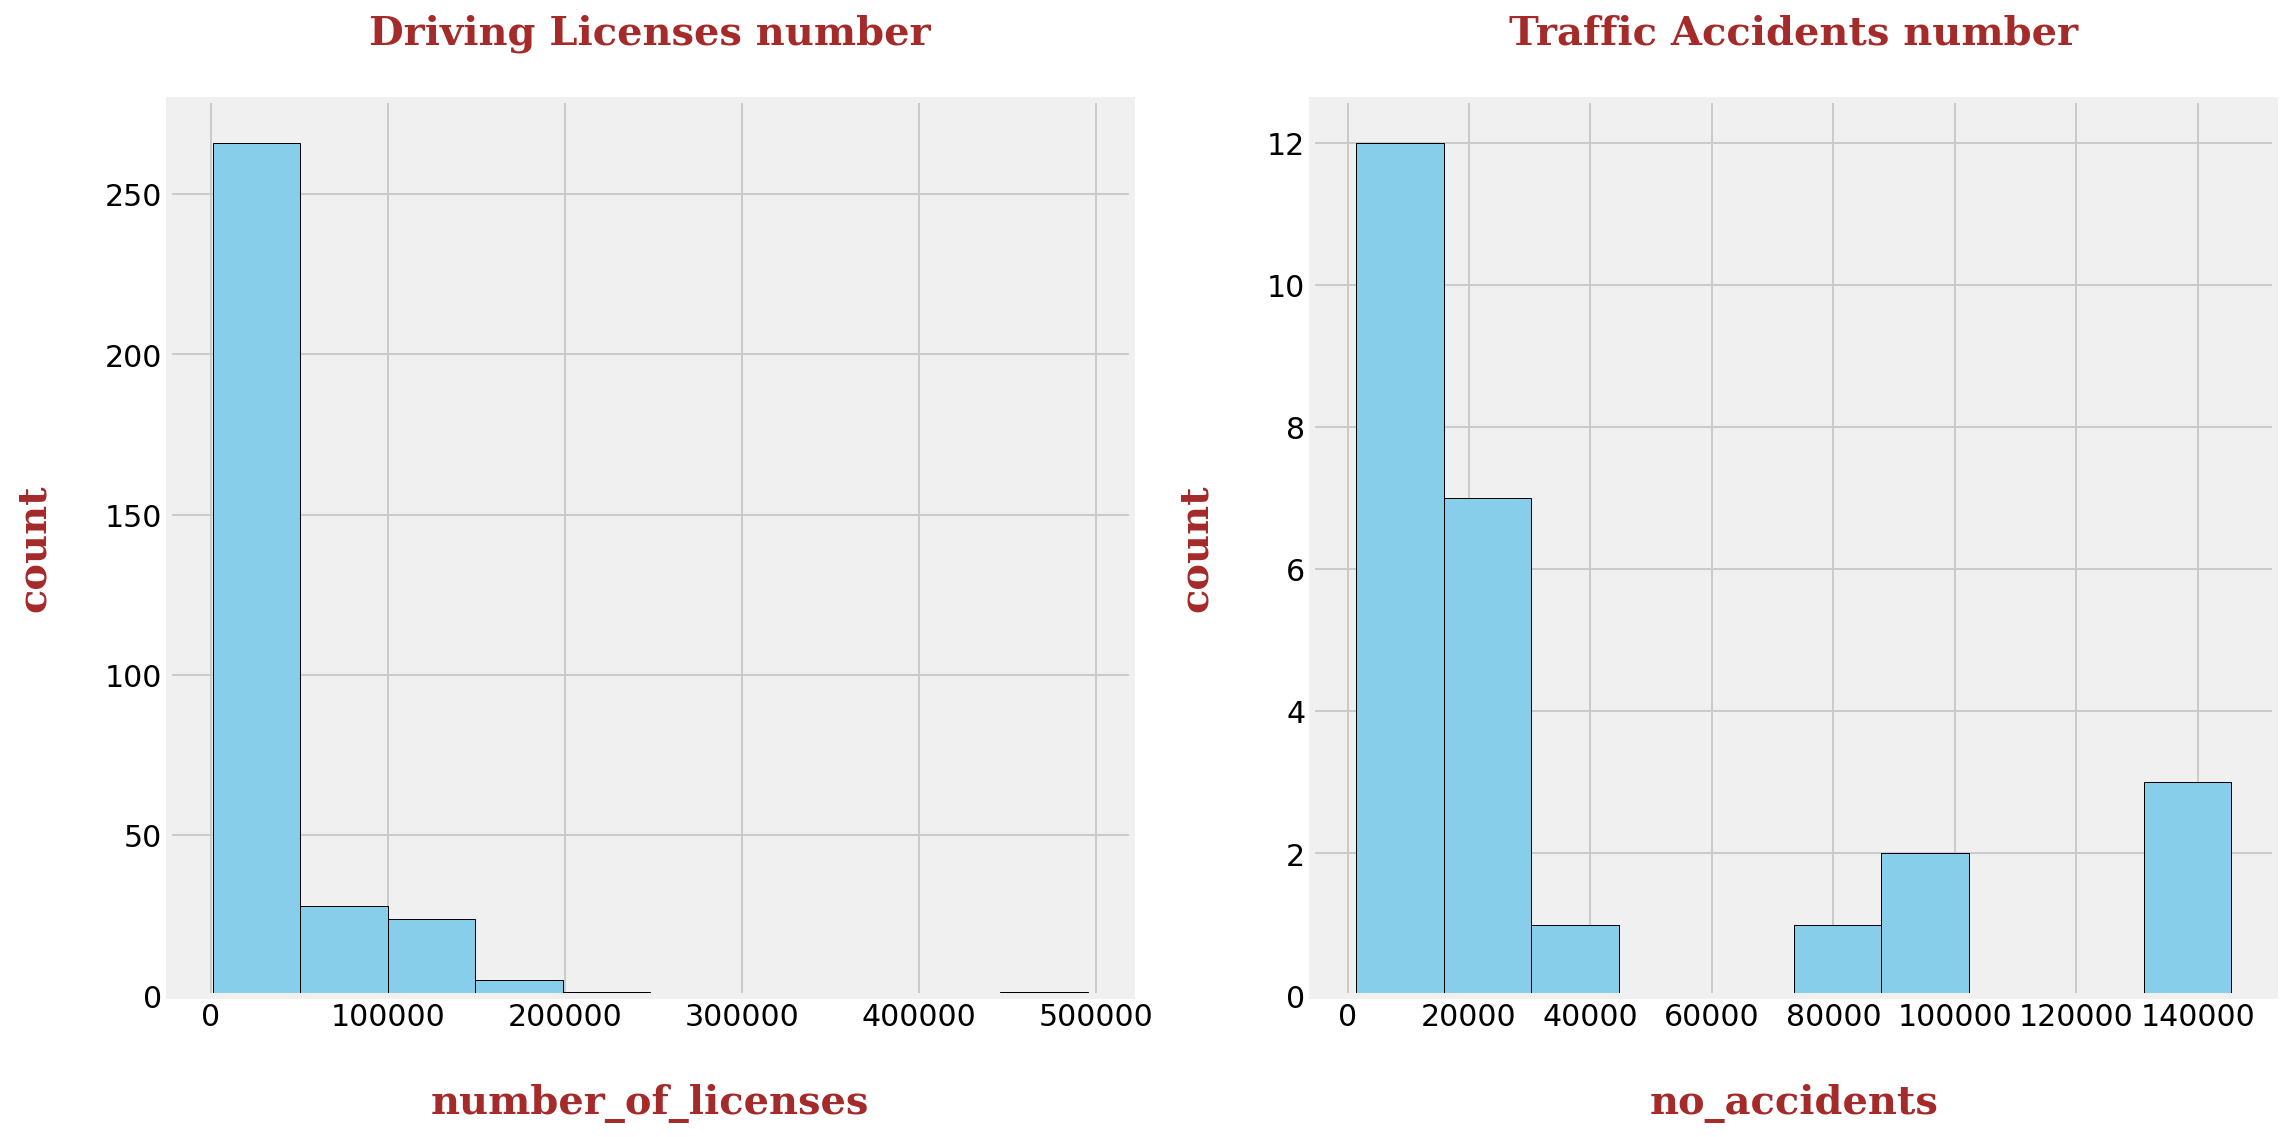

In [57]:
colum_list = ['number_of_licenses','no_accidents'] #Columns list;
title_list = ['Driving Licenses number','Traffic Accidents number'] #Titles list;
list_of_xlabels =['number_of_licenses', 'no_accidents'] #xlabels list;

subplot_histograms(outer_df, colum_list, title_list, list_of_xlabels) #Call the function for ploting

- **Most of licenses for regions were under the range of `0-5000` with`255` frequancy, and there are some of the regions with range of `5000-15,000` were got a low frequency and that means we ahve mroe regions with low number of liecenses comparing to the regions with a high number of licenses, and defenitly there are clear relation between accidents number and license number from the plots. But we have low number of accidents happened more than the high number of accidents for all regions which is good.**

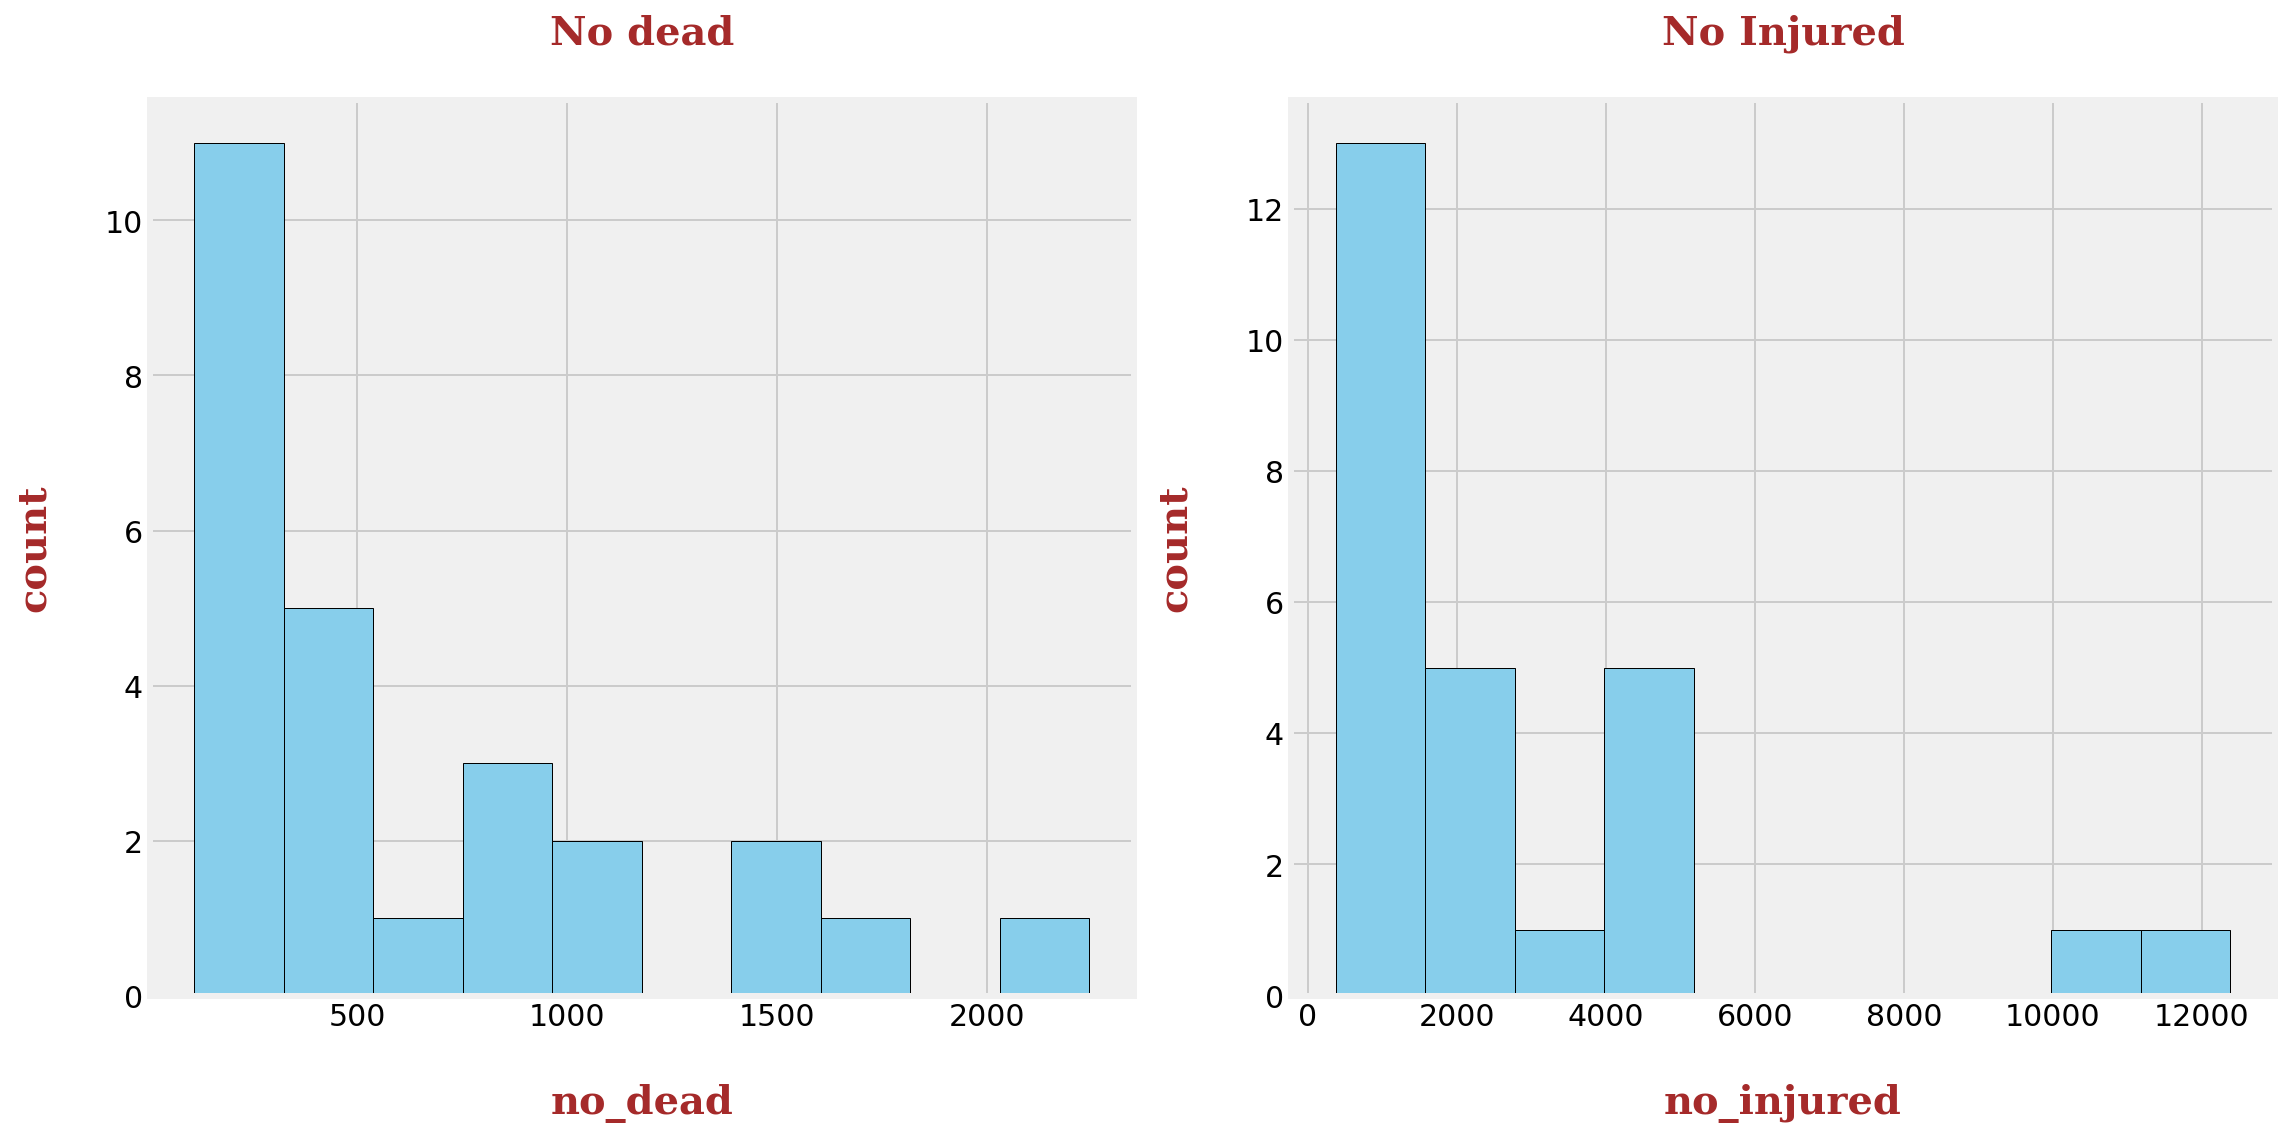

In [58]:
colum_list = ['no_dead','no_injured']      #Columns list;
title_list = ['No dead','No Injured']      #Titles list;
list_of_xlabels =['no_dead', 'no_injured'] #xlabels list;

subplot_histograms(outer_df, colum_list, title_list, list_of_xlabels) #Call the function for ploting

- **From the above plot we can see we have low numbers for deads and injured, the occurance of most of the ranges is in low values between 0-500, and the othre ranges are in low frequancy which is good. And every high numeber of deads and injured occured only once that indicates we only have one or two regions with these numebrs or range of values.**

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


- **In this part i'll be using the `inner_df` dataset because it contain the data only for `2016` and `2017`.**

- **A costume font dictionary, will be used in many plots.`MUST BE EXECUTED FIRST`.**

- **A function to create a scatter plot**

In [59]:
def subplot_scatter(data, x, y, legend, labelx, labely, title):
    """A function to create a scatterplot, param: data, name of x col, name of y col, name of hue, labelx, labely, title"""
    
    fig, ax = plt.subplots(figsize=(13,8), tight_layout=True) #Create a figure;
       
    sns.scatterplot(data=data,                   #Select the data;
                    x = x,                       #Choose x data;
                    y = y,                       #choose y data;
                    hue = legend,                #choose the hue;
                    s = 250,                     #Size of the points;
                    edgecolor='black',           #color of edge of the point;
                    linewidth=1.3,               #Size of the edge of the point;
                    ax=ax
                   ); 
    
    plt.xticks(rotation=-10, fontsize=12, horizontalalignment='center')
    plt.yticks(rotation=-10, fontsize=15, verticalalignment='center')
    
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=15); #Make the legend outside the figure;

    ax.set_title(title, fontdict=font, pad=50);           #Set the title;
    ax.set_xlabel(labelx, fontdict=font, labelpad=50)     #Set x label;
    ax.set_ylabel(labely , fontdict=font, labelpad=50)    #Set y label;

- **Driving Licenses vs. Traffic Accidents for 2017**


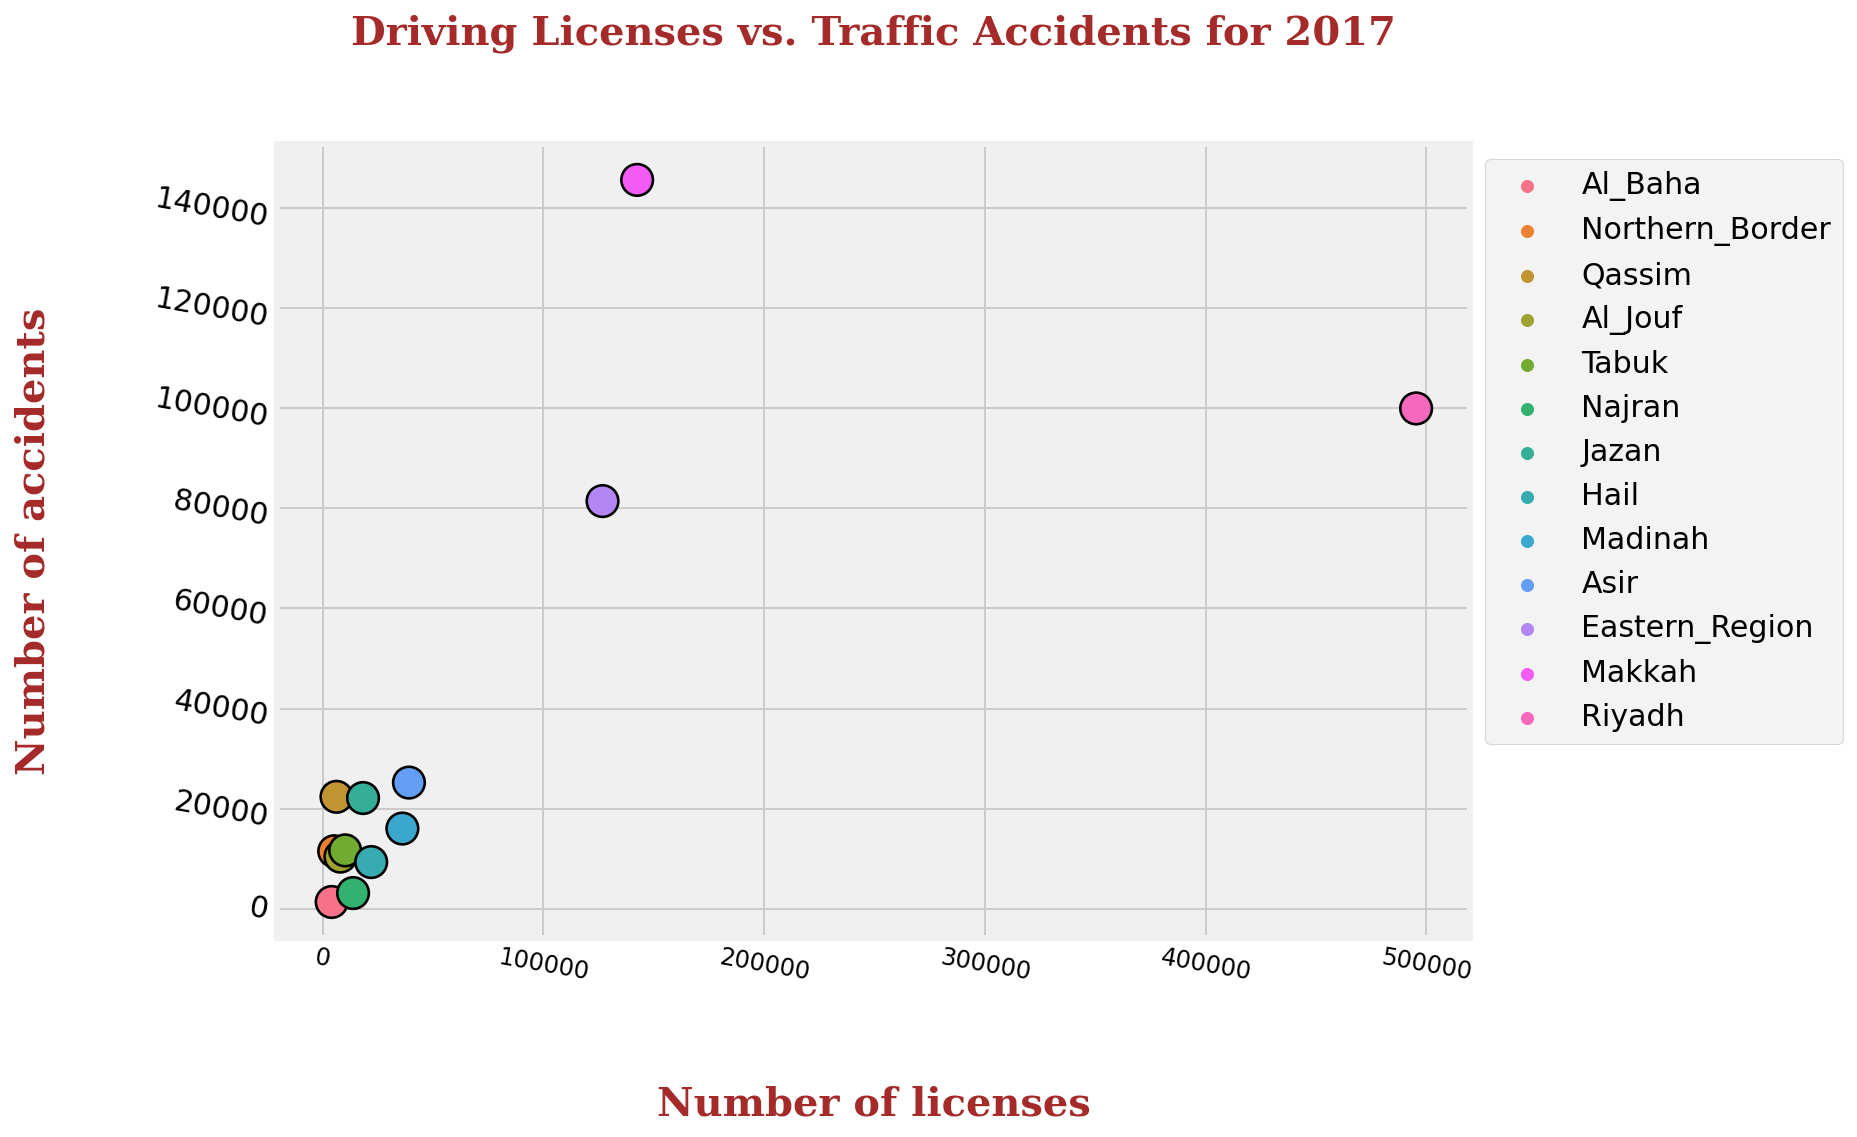

In [60]:
data = inner_df[['region','number_of_licenses','no_accidents']][inner_df.year ==2017].sort_values('number_of_licenses')

subplot_scatter(data,                       #Data
                'number_of_licenses',       #x axis
                'no_accidents',             #y axis
                'region',                   #Hue
                'Number of licenses',       #x label
                'Number of accidents',      #y label
                'Driving Licenses vs. Traffic Accidents for 2017') #Title


**In 2017 With inrease in Number of licenses we can see an increase with number of accidents for some regions and some are lwoer based on 2016, the 2017 is better for some regions like Riyadh, And we can see Makkah around 140k licenses it got +145k accidents. But for Riyadh it's Not.**

- **Driving Licenses vs. Traffic Accidents for 2016**

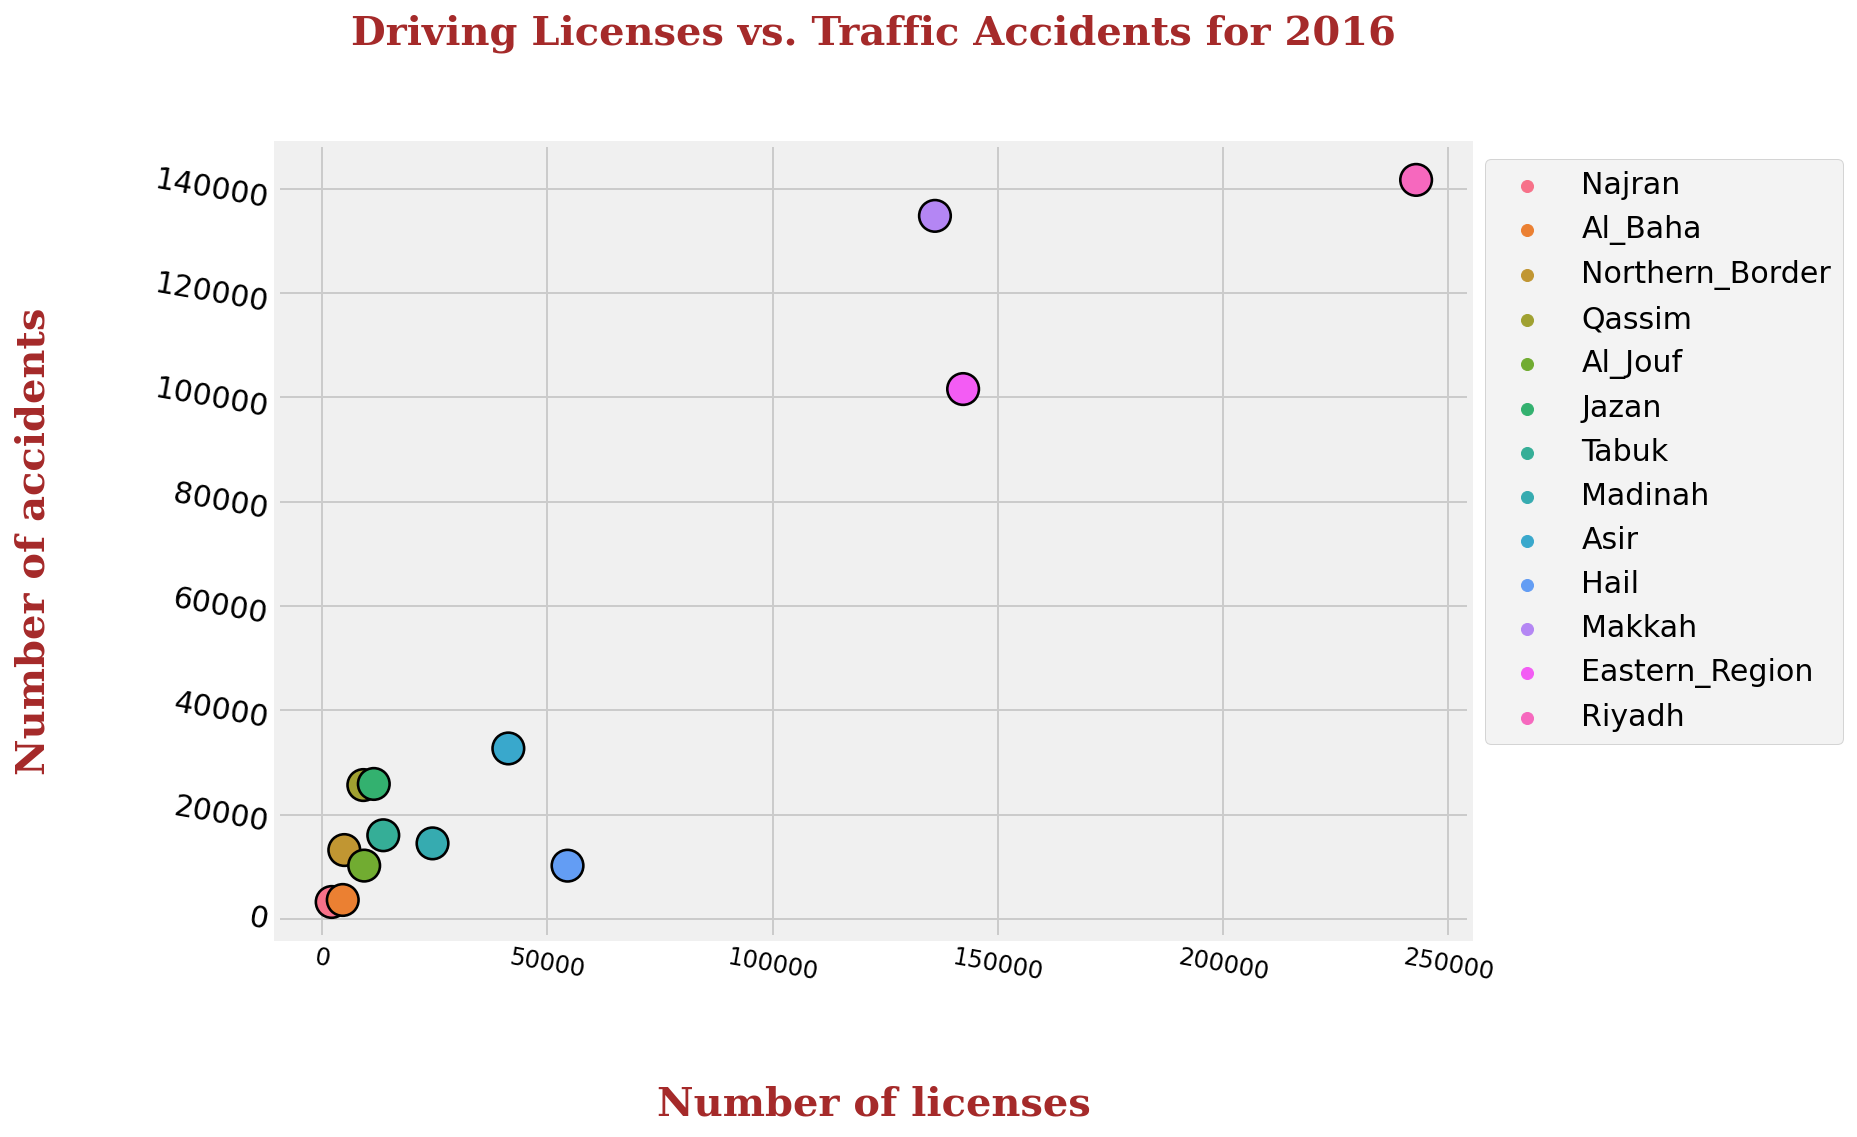

In [61]:
data = inner_df[['region','number_of_licenses','no_accidents']][inner_df.year ==2016].sort_values('number_of_licenses')

subplot_scatter(data,                       #Data
                'number_of_licenses',       #x axis
                'no_accidents',             #y axis
                'region',                   #Hue
                'Number of licenses',       #x label
                'Number of accidents',      #y label
                'Driving Licenses vs. Traffic Accidents for 2016') #Title


**As i said before, 2017 was better for some regions like Riyadh and Makkah etc.., With inrease in Number of licenses we can see an increaseing of accidents for some regions, the 2017 is better for some regions like Riyadh. But Riyadh in 2016 get 245k licenses but with 142k accidents.**

- **Driving Licenses for 2016 vs 2017**


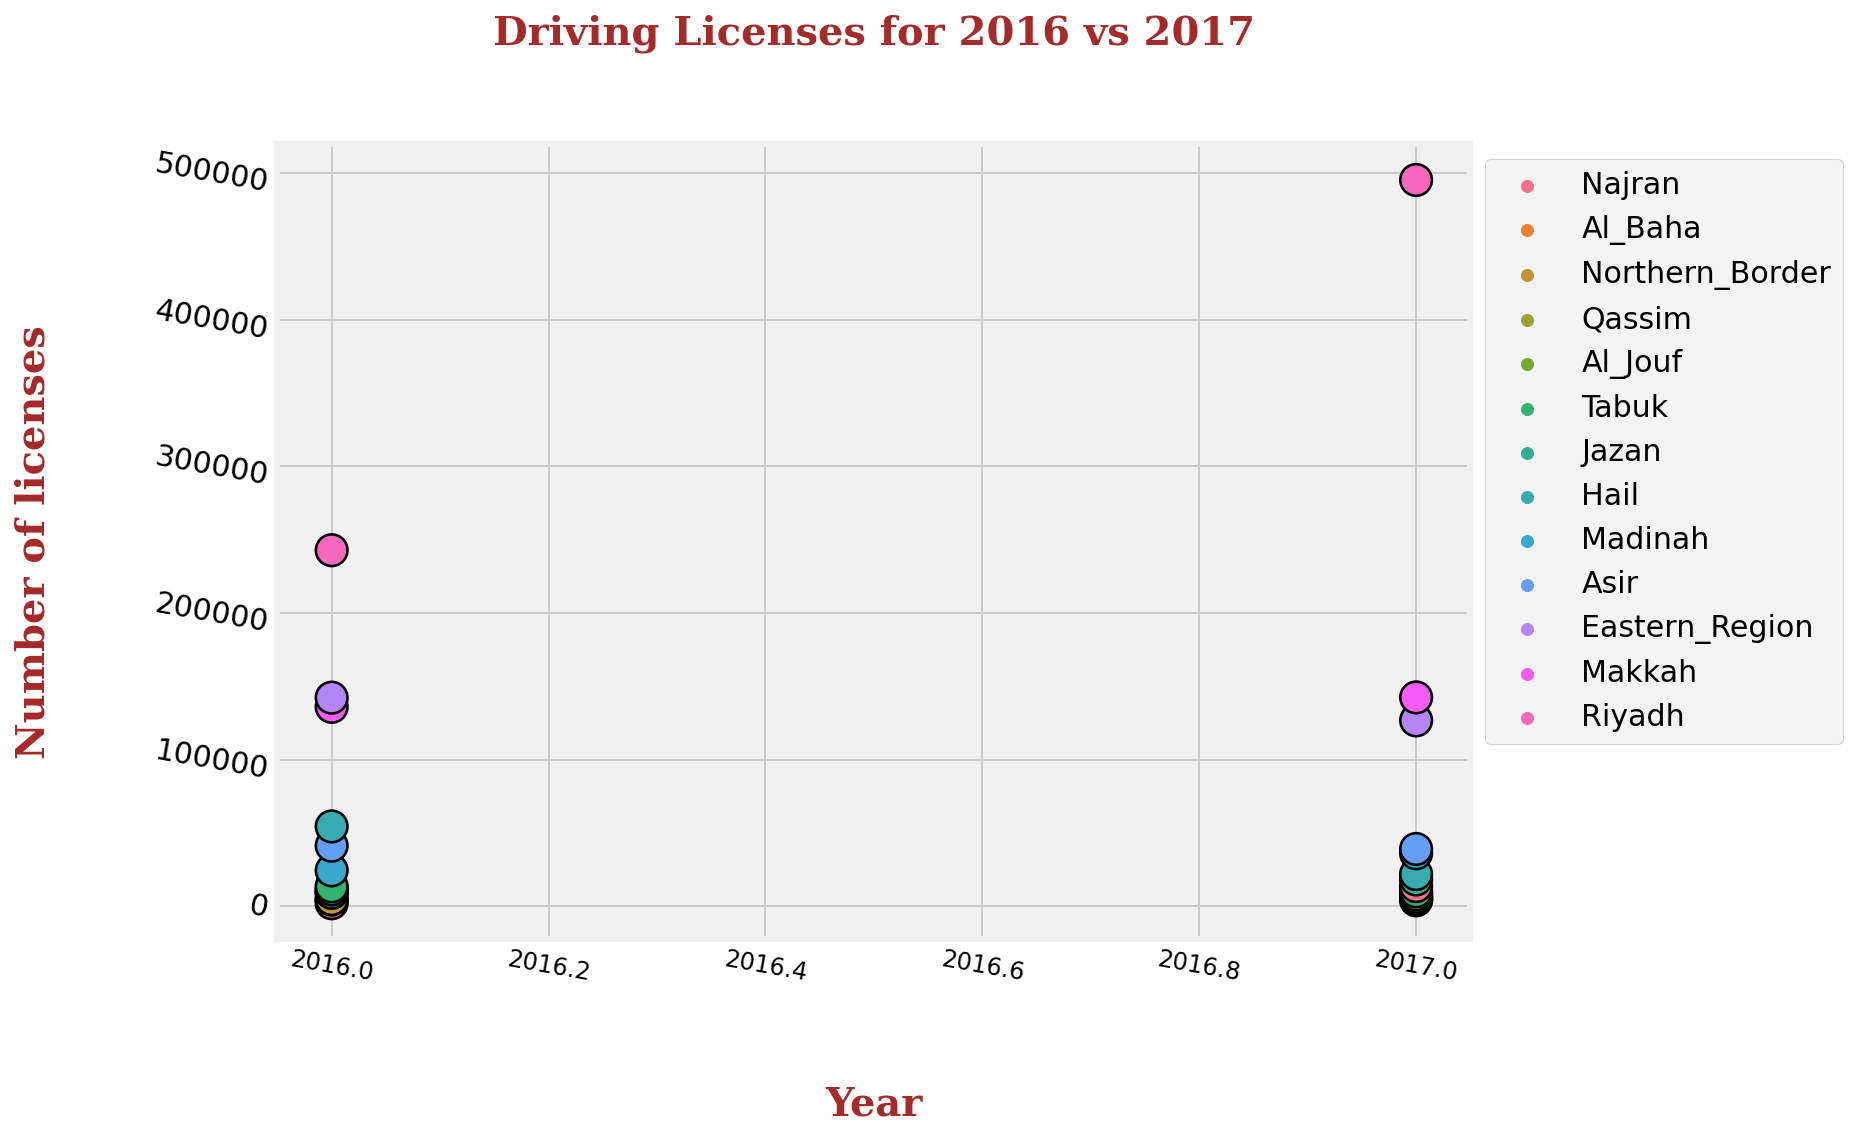

In [62]:
data = inner_df[['year','region','number_of_licenses']].sort_values('number_of_licenses')

subplot_scatter(data,                       #Data
                'year',                     #x axis
                'number_of_licenses',       #y axis
                'region',                   #Hue
                'Year',                     #x label
                'Number of licenses',       #y label
                'Driving Licenses for 2016 vs 2017') #Title

**From x-axis we can see each year with number of licenses corresponding to it, simpliy Number of licenses are decreased from 2016 to 2017 but not for all regions, Riyadh as an example got +49% of licenses more than 2016, Madinah got +5% in licenses. So with each year most of the regions will have low number licenses except some will be higher than before.**

- **Traffic Accidents for 2016 vs 2017**

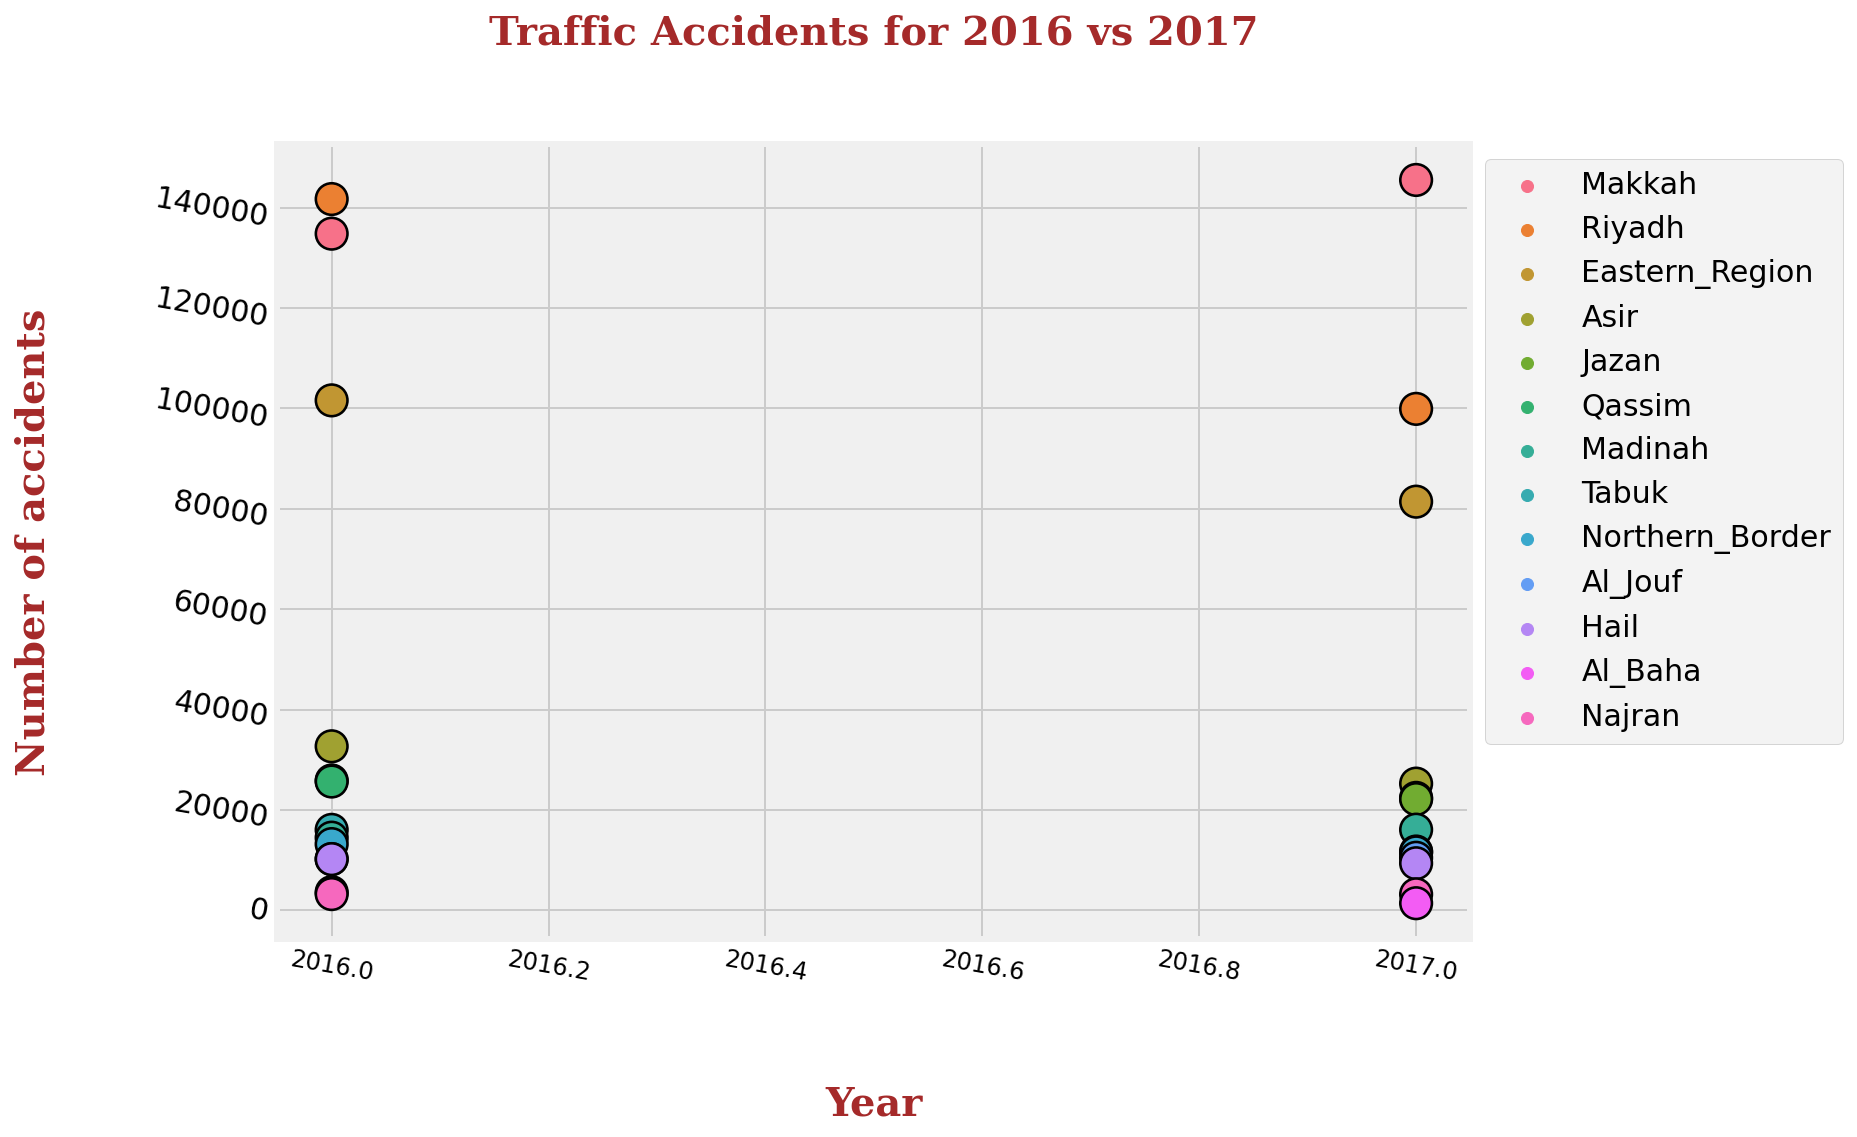

In [63]:
data = inner_df[['year','region','no_accidents']].sort_values('no_accidents', ascending=False)

subplot_scatter(data,                       #Data
                'year',                     #x axis
                'no_accidents',             #y axis
                'region',                   #Hue
                'Year',                     #x label
                'Number of accidents',      #y label
                'Traffic Accidents for 2016 vs 2017') #Title


**The accidents as we can see by each year, it got decreased by large number and inreased for some regions like Eastern region and Makkah, but for Riyadh it got decreased by almost `40k` or more. And i think this is because of the new system for monitoring the roads `'ساهر'`, it was relased on 2010 and start to apply it for regions but the first region got the new system was `Riyadh`, and it was under bulding for some years until it cover all of the `Riyadh` by `2013`. So i think it was a side in help to decrease the number of accidents in Riyadh by more than `20%`, if we checked the latest years i think it will be lower for all regions because now this system is in the entire of Saudi Arabia and in Travel roads too.**

___________________________________________________________________________________________________________________________

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

**A function to create boxplot**

In [64]:
def subplot_boxplot(data, title, labely):
    """A function to create a boxplot, param: data, title, ylabel"""
    
    fig, ax = plt.subplots(figsize=(10,8), tight_layout=True) #Create a figure;
    
    sns.boxplot(data= data,  #Select the data;
                orient='h',  #Select the orient horiz or  vertic;
                fliersize=6, #Size of outliers size;
                linewidth=2, #Size of boxplot lines;
                notch=True,  #Display the mean;
                ax=ax)
    
    plt.xticks(rotation=-10, fontsize=15, horizontalalignment='center')
    plt.yticks(fontsize=15, verticalalignment='center')
    
    ax.set_title(title, fontdict=font, pad=50);           #Set the title;
    ax.set_ylabel(labely , fontdict=font, labelpad=50)    #Set y label;

In [72]:
#Print the min and max for each variable
print('number_of_licenses: min=',min(outer_df.number_of_licenses), '|','max=',max(outer_df.number_of_licenses)) 

print('\nno_accidents: min=',min(outer_df.dropna().no_accidents), '|' ,'max=',max(outer_df.dropna().no_accidents))

print('\nno_injured: min=',min(outer_df.dropna().no_injured), '|' ,'max=',max(outer_df.dropna().no_injured))

print('\nno_dead: min=',min(outer_df.dropna().no_dead.dropna()), '|' ,'max=',max(outer_df.dropna().no_dead))

number_of_licenses: min= 915 | max= 495307

no_accidents: min= 1414.0 | max= 145541.0

no_injured: min= 374.0 | max= 12383.0

no_dead: min= 112.0 | max= 2243.0


**The above output is the min and max for each numeric column, and it seems we don't have any similar min/max values for any of them. So i'll plot each one in a boxplot. Because each one of them will affect th eother except if i'm going to do standarization.**

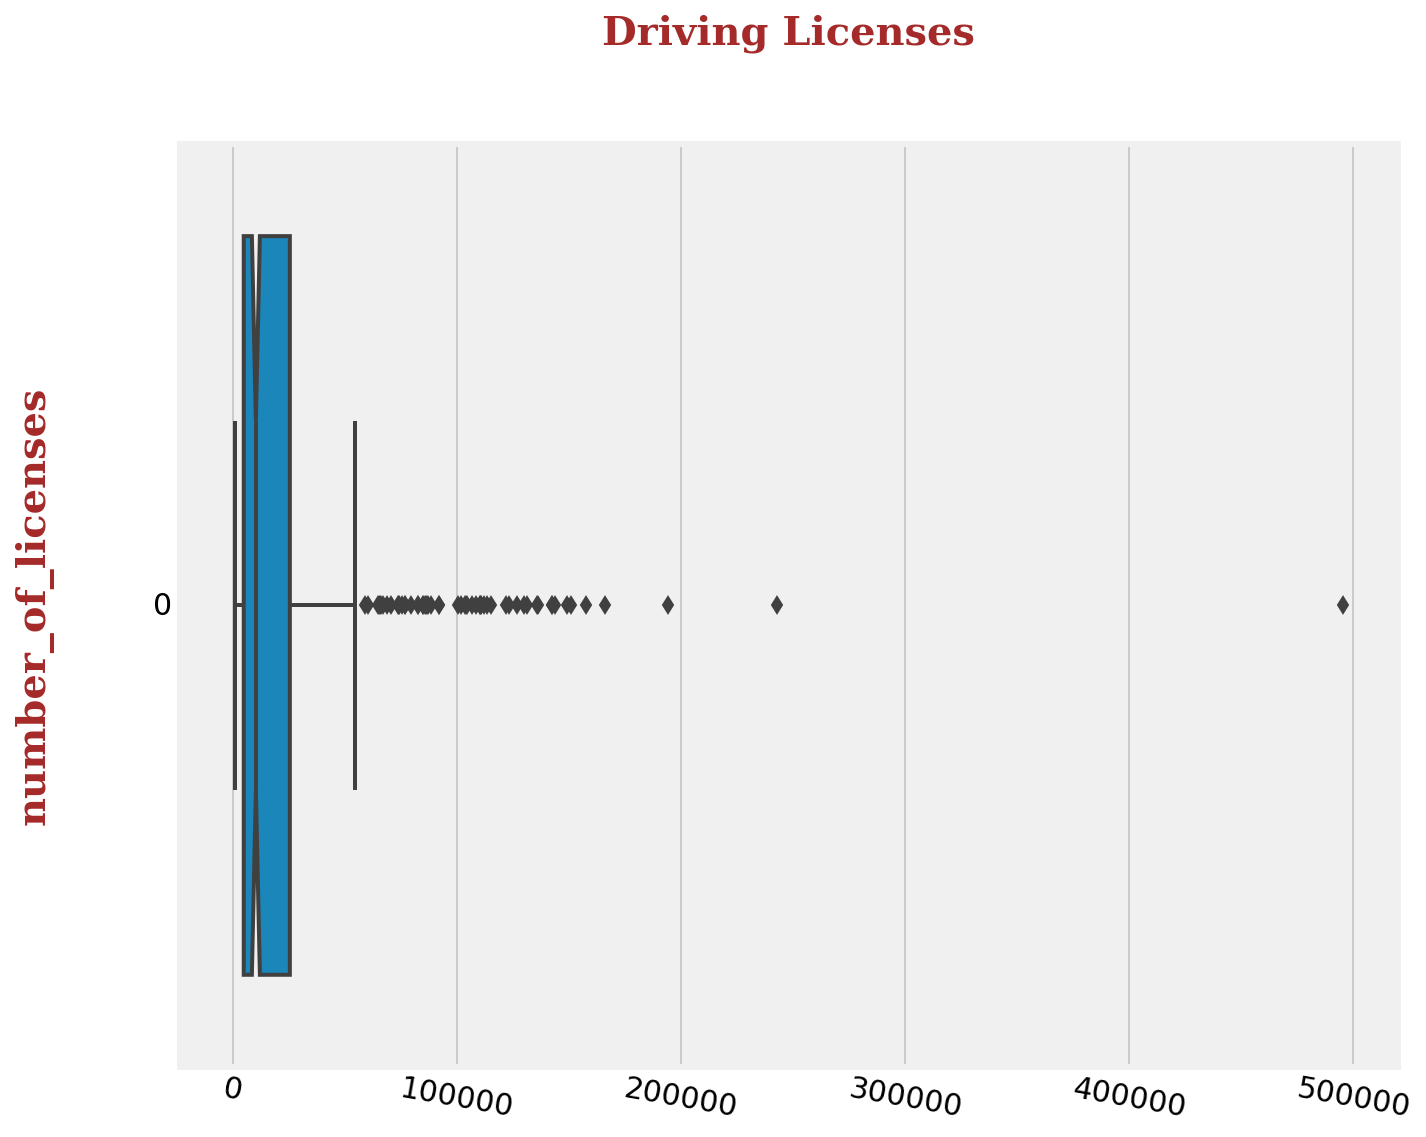

In [66]:
#Plot using ploting functoin
subplot_boxplot(outer_df.number_of_licenses, 'Driving Licenses', 'number_of_licenses')

**Well well, what do we have here. A LOT OF OUTLIERS. number of licenses got many outliers that affect the data if we're going to make some modling on it. The median here is not clear but it seems to be `10,000` or higher a bit. And it's small thing to notice but it's `right sekwed`.**

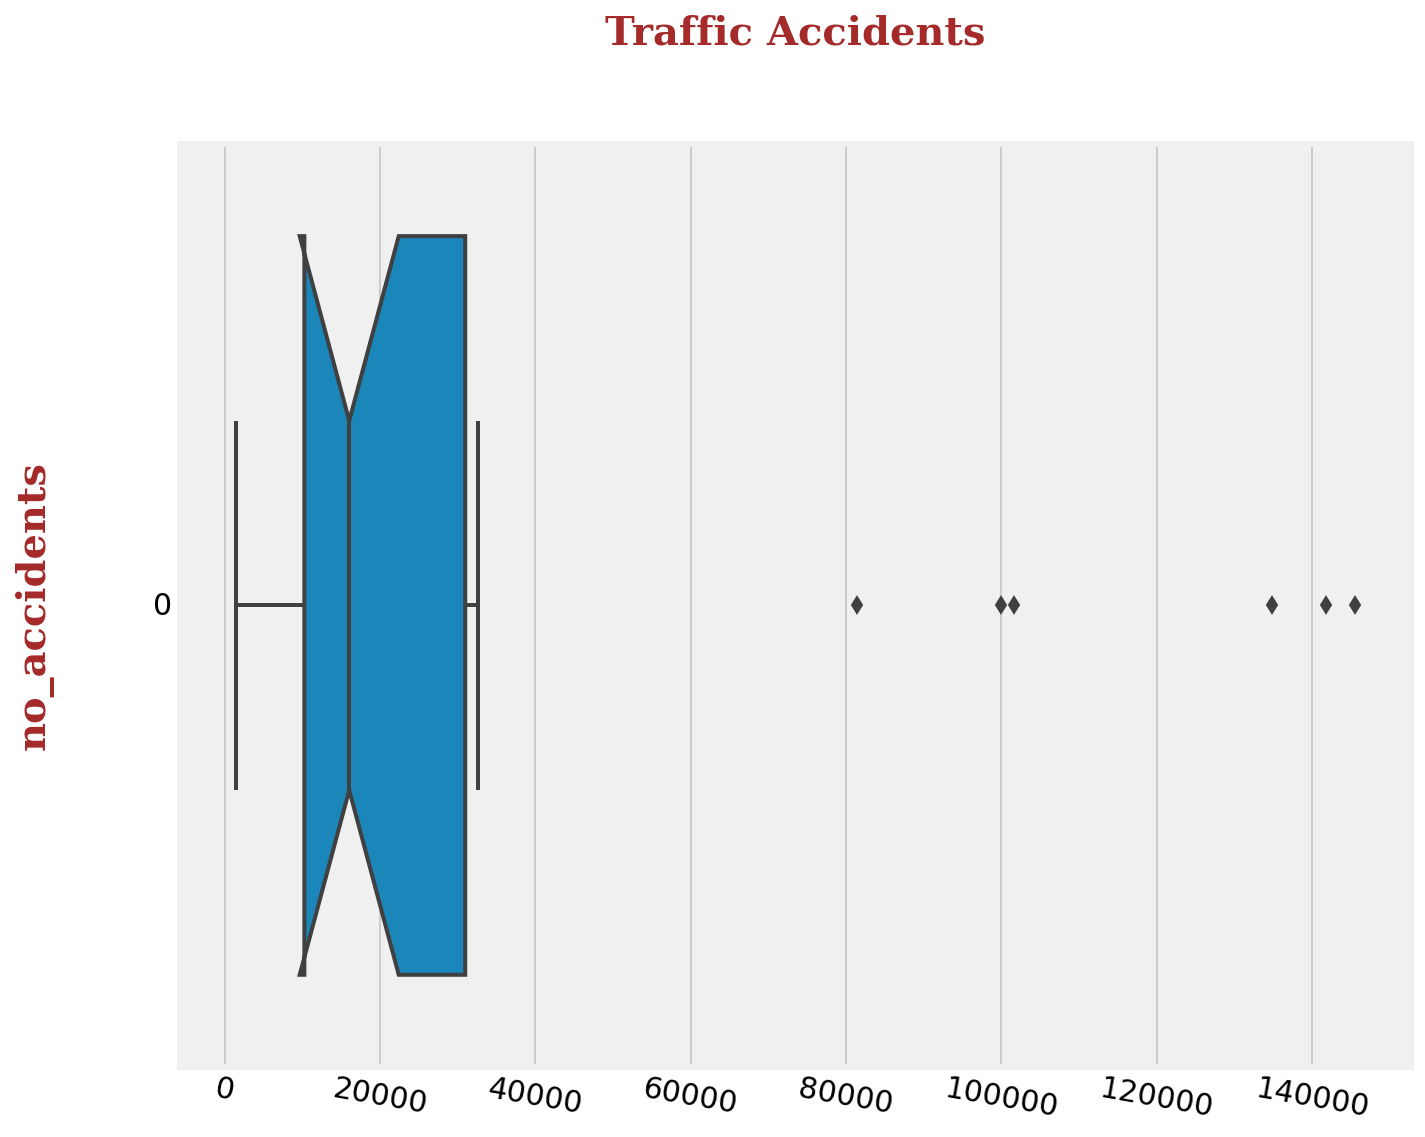

In [67]:
#Plot using ploting functoin
subplot_boxplot(outer_df.no_accidents, 'Traffic Accidents', 'no_accidents')

**Fot Accidents boxplot, We have outliers but they are not that much, not like licenses. The mean is also showing great here it seems almost `16,000` or less. The skew type is `right sekwed`.**

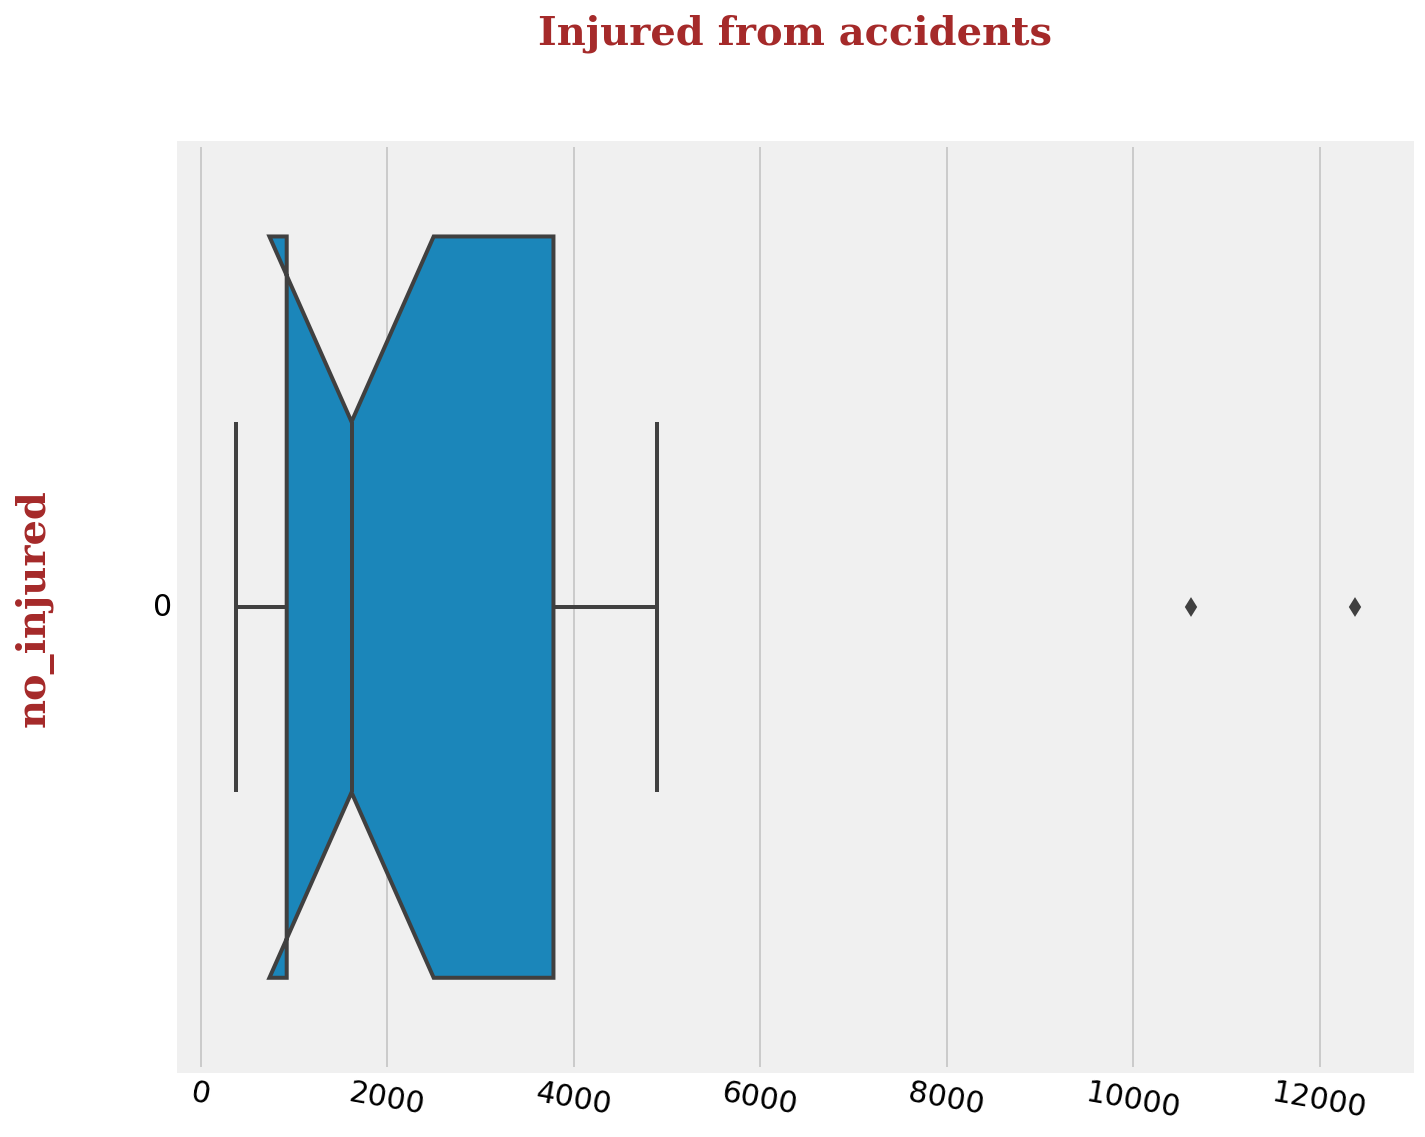

In [68]:
#Plot using ploting functoin
subplot_boxplot(outer_df.no_injured, 'Injured from accidents', 'no_injured')

**For the injured from accidents, it shows that we only have 2 outliers, and the median is `~1800` or less. But it did well `2` outliers isn't that much. The skew type is `right sekwed`.**

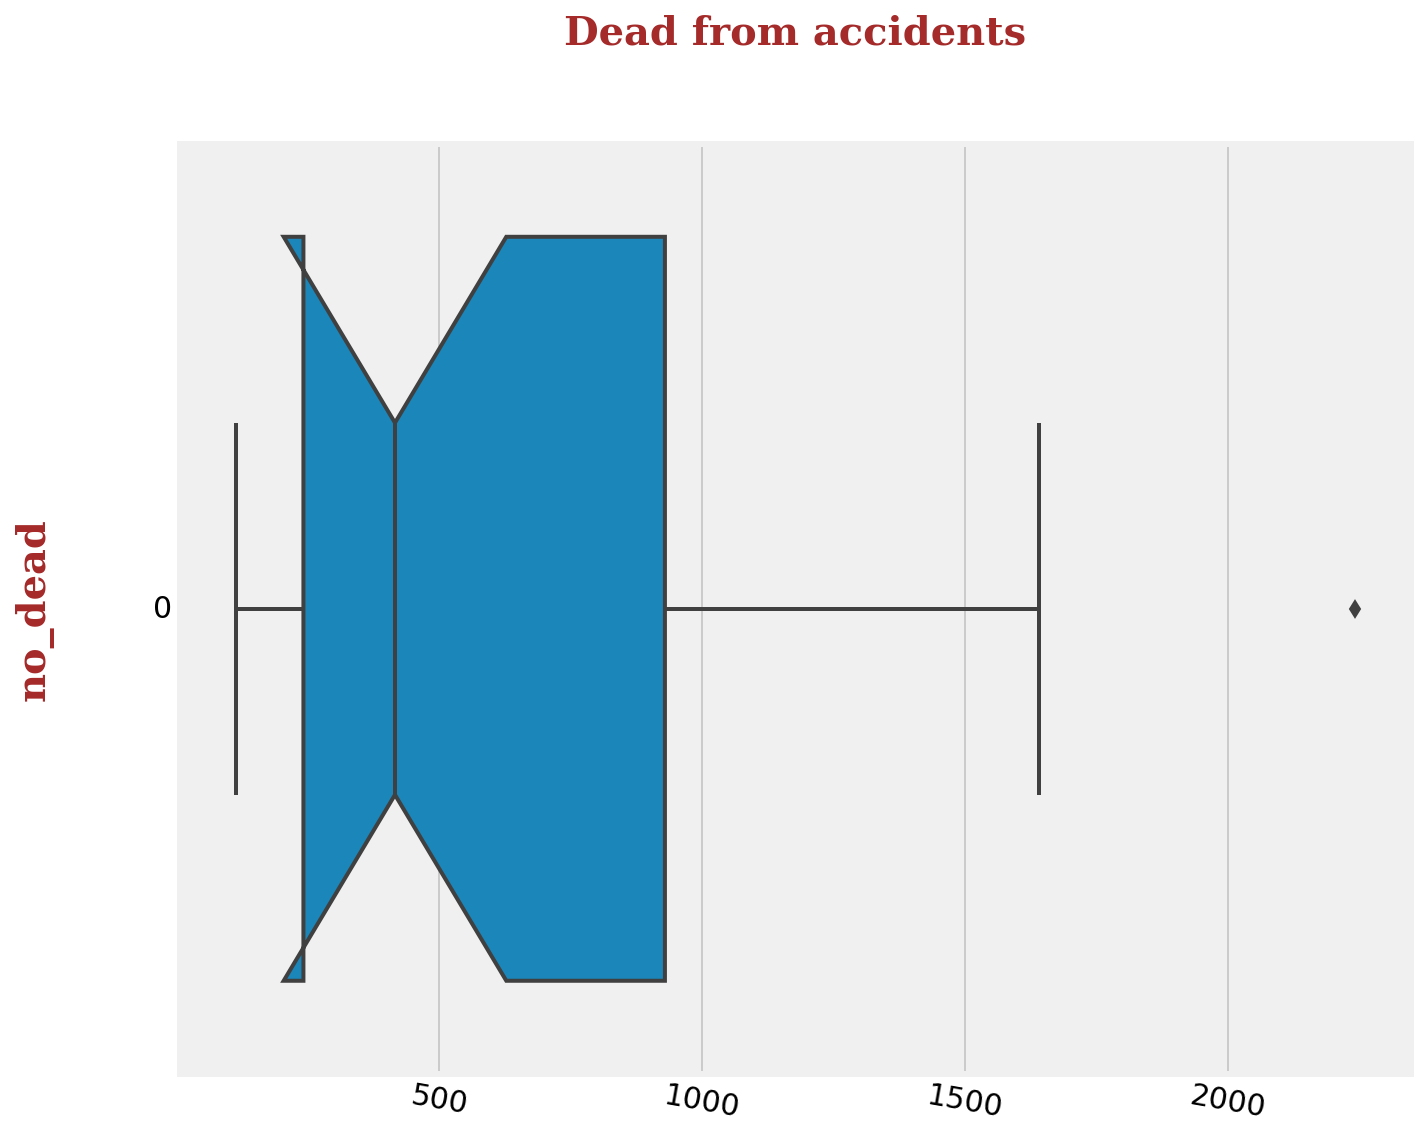

In [69]:
#Plot using ploting functoin
subplot_boxplot(outer_df.no_dead, 'Dead from accidents', 'no_dead')

**For the dead from accidents, it shows that we only have `1` outliers, and the median is `~900` or less. The skew type is `right sekwed`.**

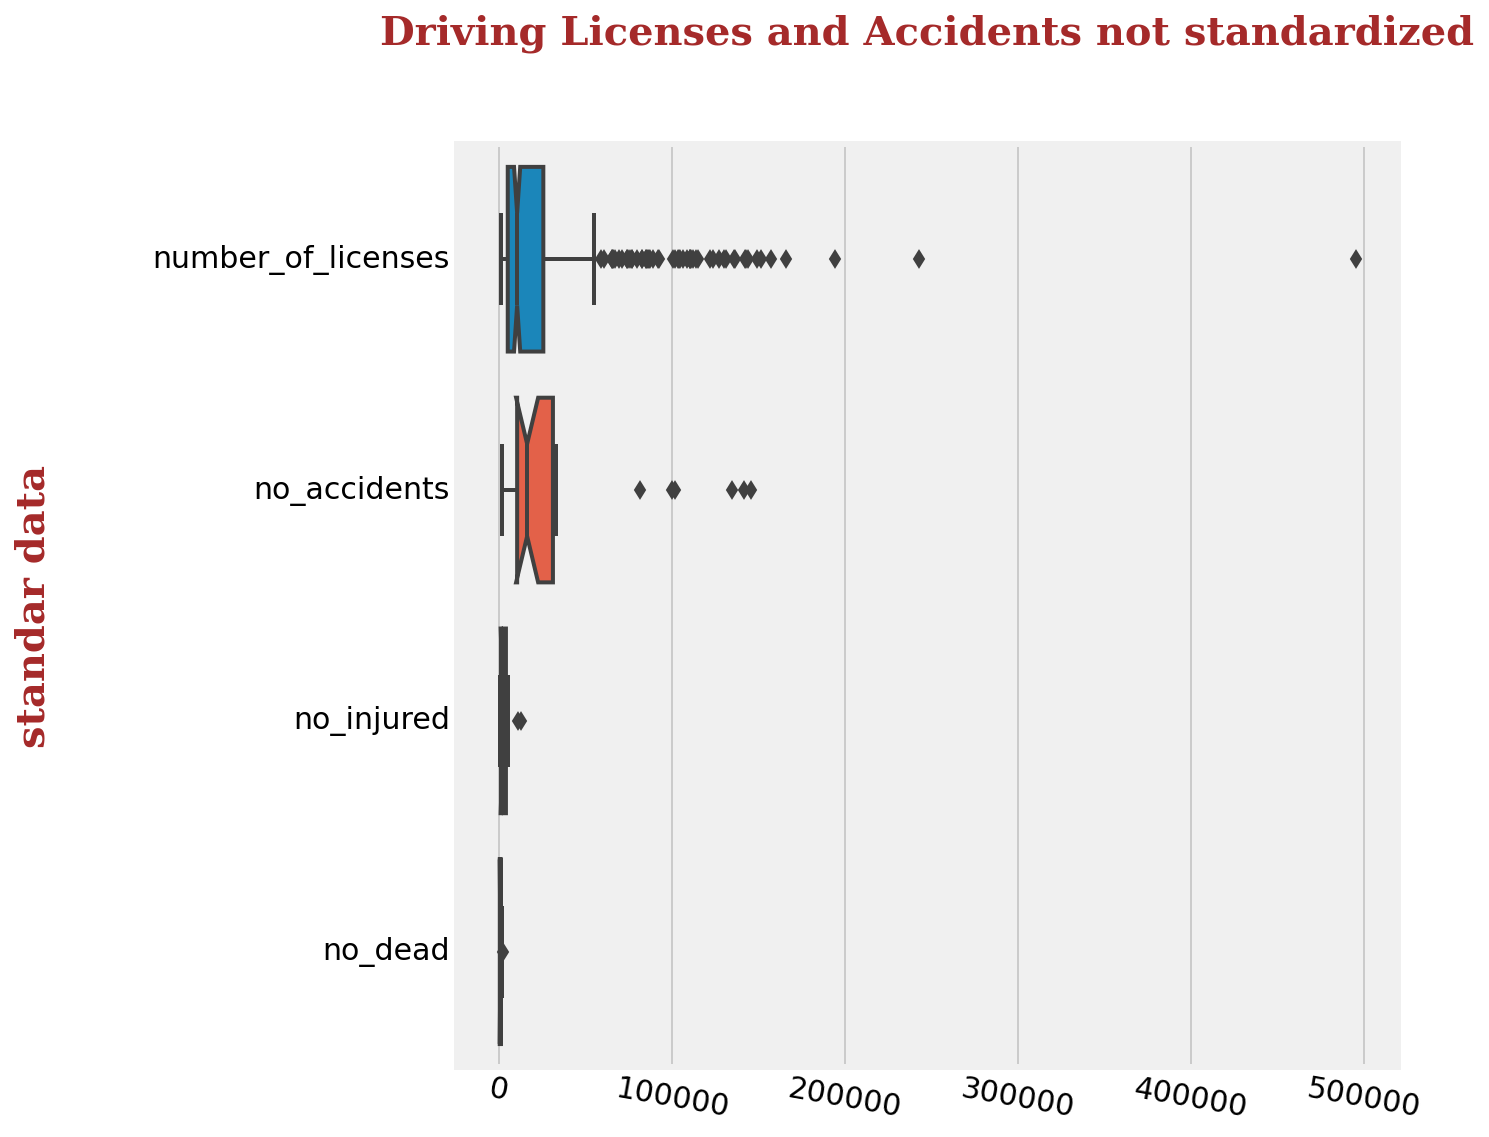

In [70]:
#Select the data
data = outer_df[['number_of_licenses','no_accidents','no_injured','no_dead']]

#Plot using ploting functoin
subplot_boxplot(data, 'Driving Licenses and Accidents not standardized', 'standar data')

**As we can see this what will happen if we plot all data without taking care of scale for each variable and it's scale. But there are many solution for this problem, one of them is standardization. i'll use it and then plot the variables in one plot to see how it work.**

**A fucntion to standardize data**

In [73]:
def stand_data(var):
    standard_data = (var-var.mean())/var.std() #standardization formula
    return standard_data

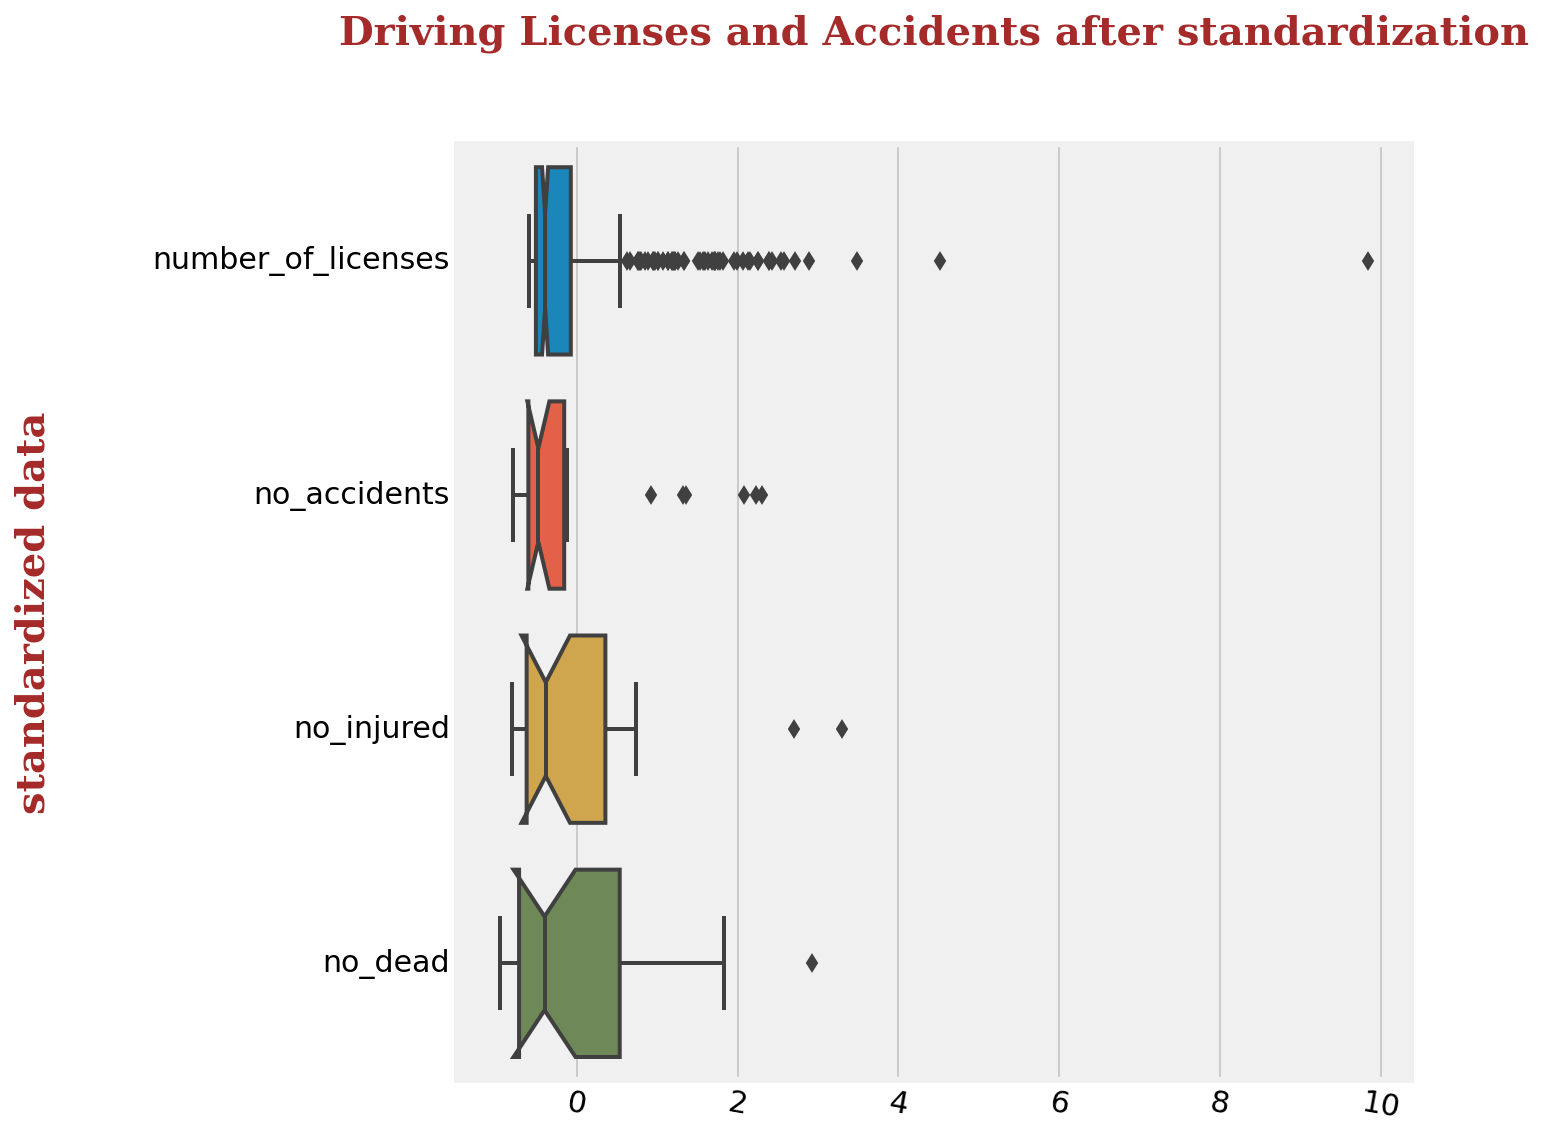

In [74]:
#Select the data
data = stand_data(outer_df[['number_of_licenses','no_accidents','no_injured','no_dead']])

#Plot using ploting functoin
subplot_boxplot(data, 'Driving Licenses and Accidents after standardization', 'standardized data') 

**I tried to standarize the numeric columns so it all be in one plot. And we can see the boxplot for data after standardization.**

___________________________________________________________________________________________________________________________

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

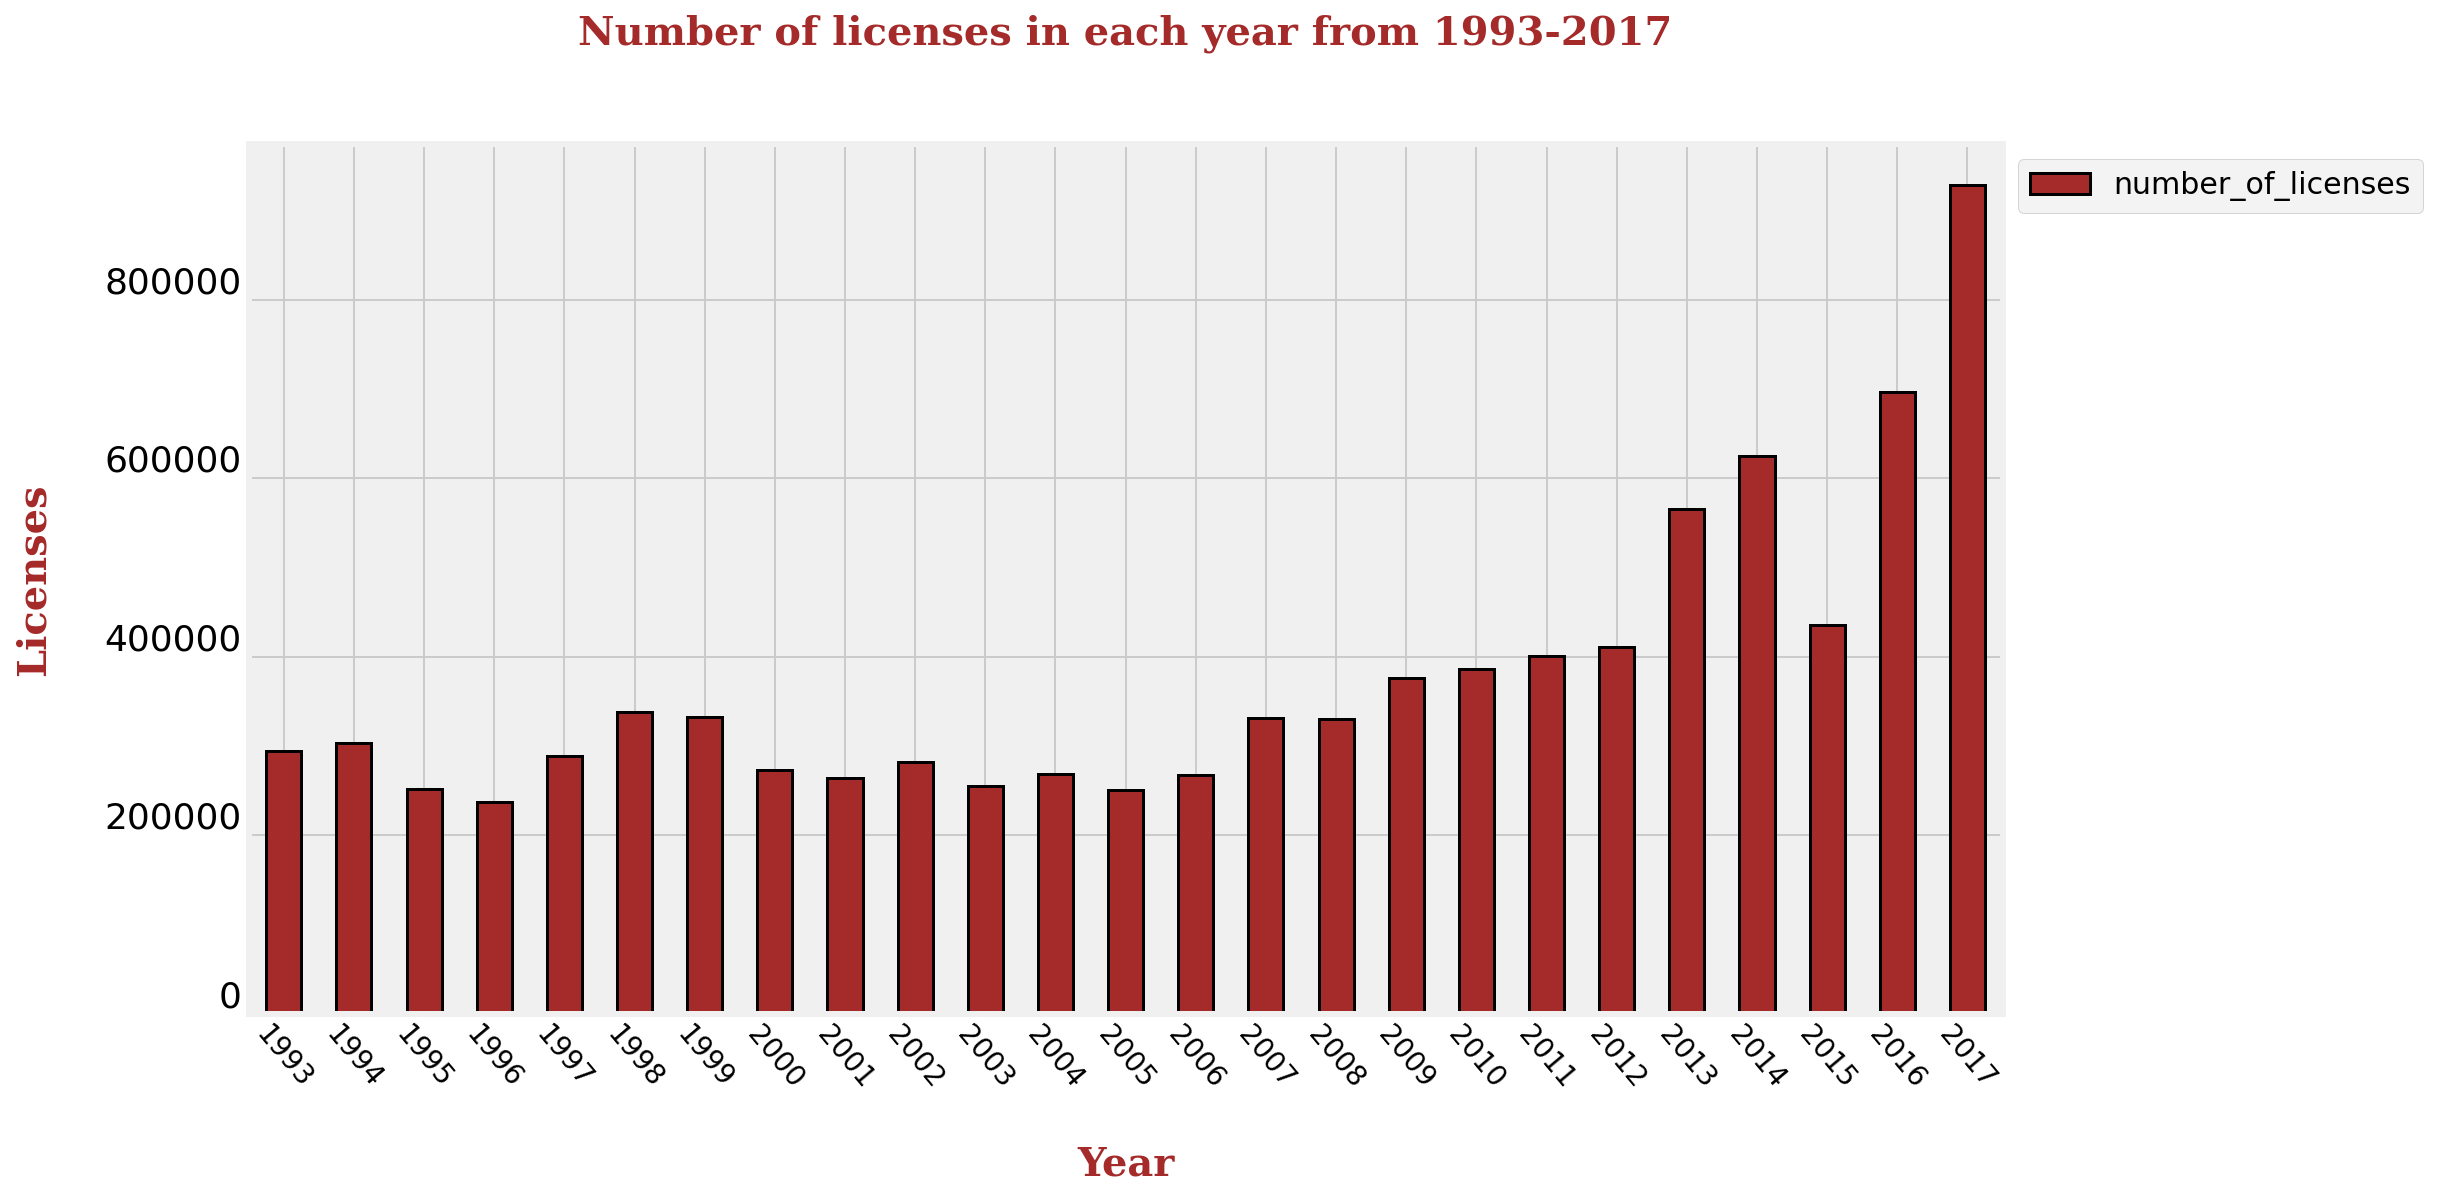

In [75]:
lics_data = outer_df[['region','number_of_licenses','year']].sort_values('number_of_licenses',ascending=False)

lics_data.groupby('year').sum().sort_values('year',ascending=True).plot(kind='bar',            #Type of plot;
                                                                        figsize=(14,8),        #Plot size;
                                                                        color = "brown",       #Color;
                                                                        edgecolor = 'black',   #Edge bar color;
                                                                        linewidth=1.5)         #Size of edge color;

plt.title('Number of licenses in each year from 1993-2017', fontdict=font, pad=50)  #Set title;

plt.xticks(rotation=-50, fontsize=14, horizontalalignment='center')            #xtricks options;
plt.yticks(fontsize=18, verticalalignment='bottom')                            #ytricks options;

plt.xlabel('\nYear',fontdict=font)                                             #xlabel;
plt.ylabel('Licenses\n',fontdict=font)                                         #ylabel;

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=15);              #legend location;

**From the pervious bar plot, we can see that before 2007 number of licenses were not changing that much, but from 2007 to 2017 we can see a good jumps in numbers especially in `2013` and `2014` then in `2015` the licenses drop by `20%`, After that year in `2016` and `2017` the licenses jumped so far to `700,000` then almost to `900,000`. Women driving isn't the cause of this jump because Licenses were set to be issued to women starting on `24 June 2018`, So i'm pretty sure if we have data for `2018-2020` we will see huge jump more than `2017` but so far `2017` is the highest year of licenses for this data.**

___________________________________________________________________________________________________________________________

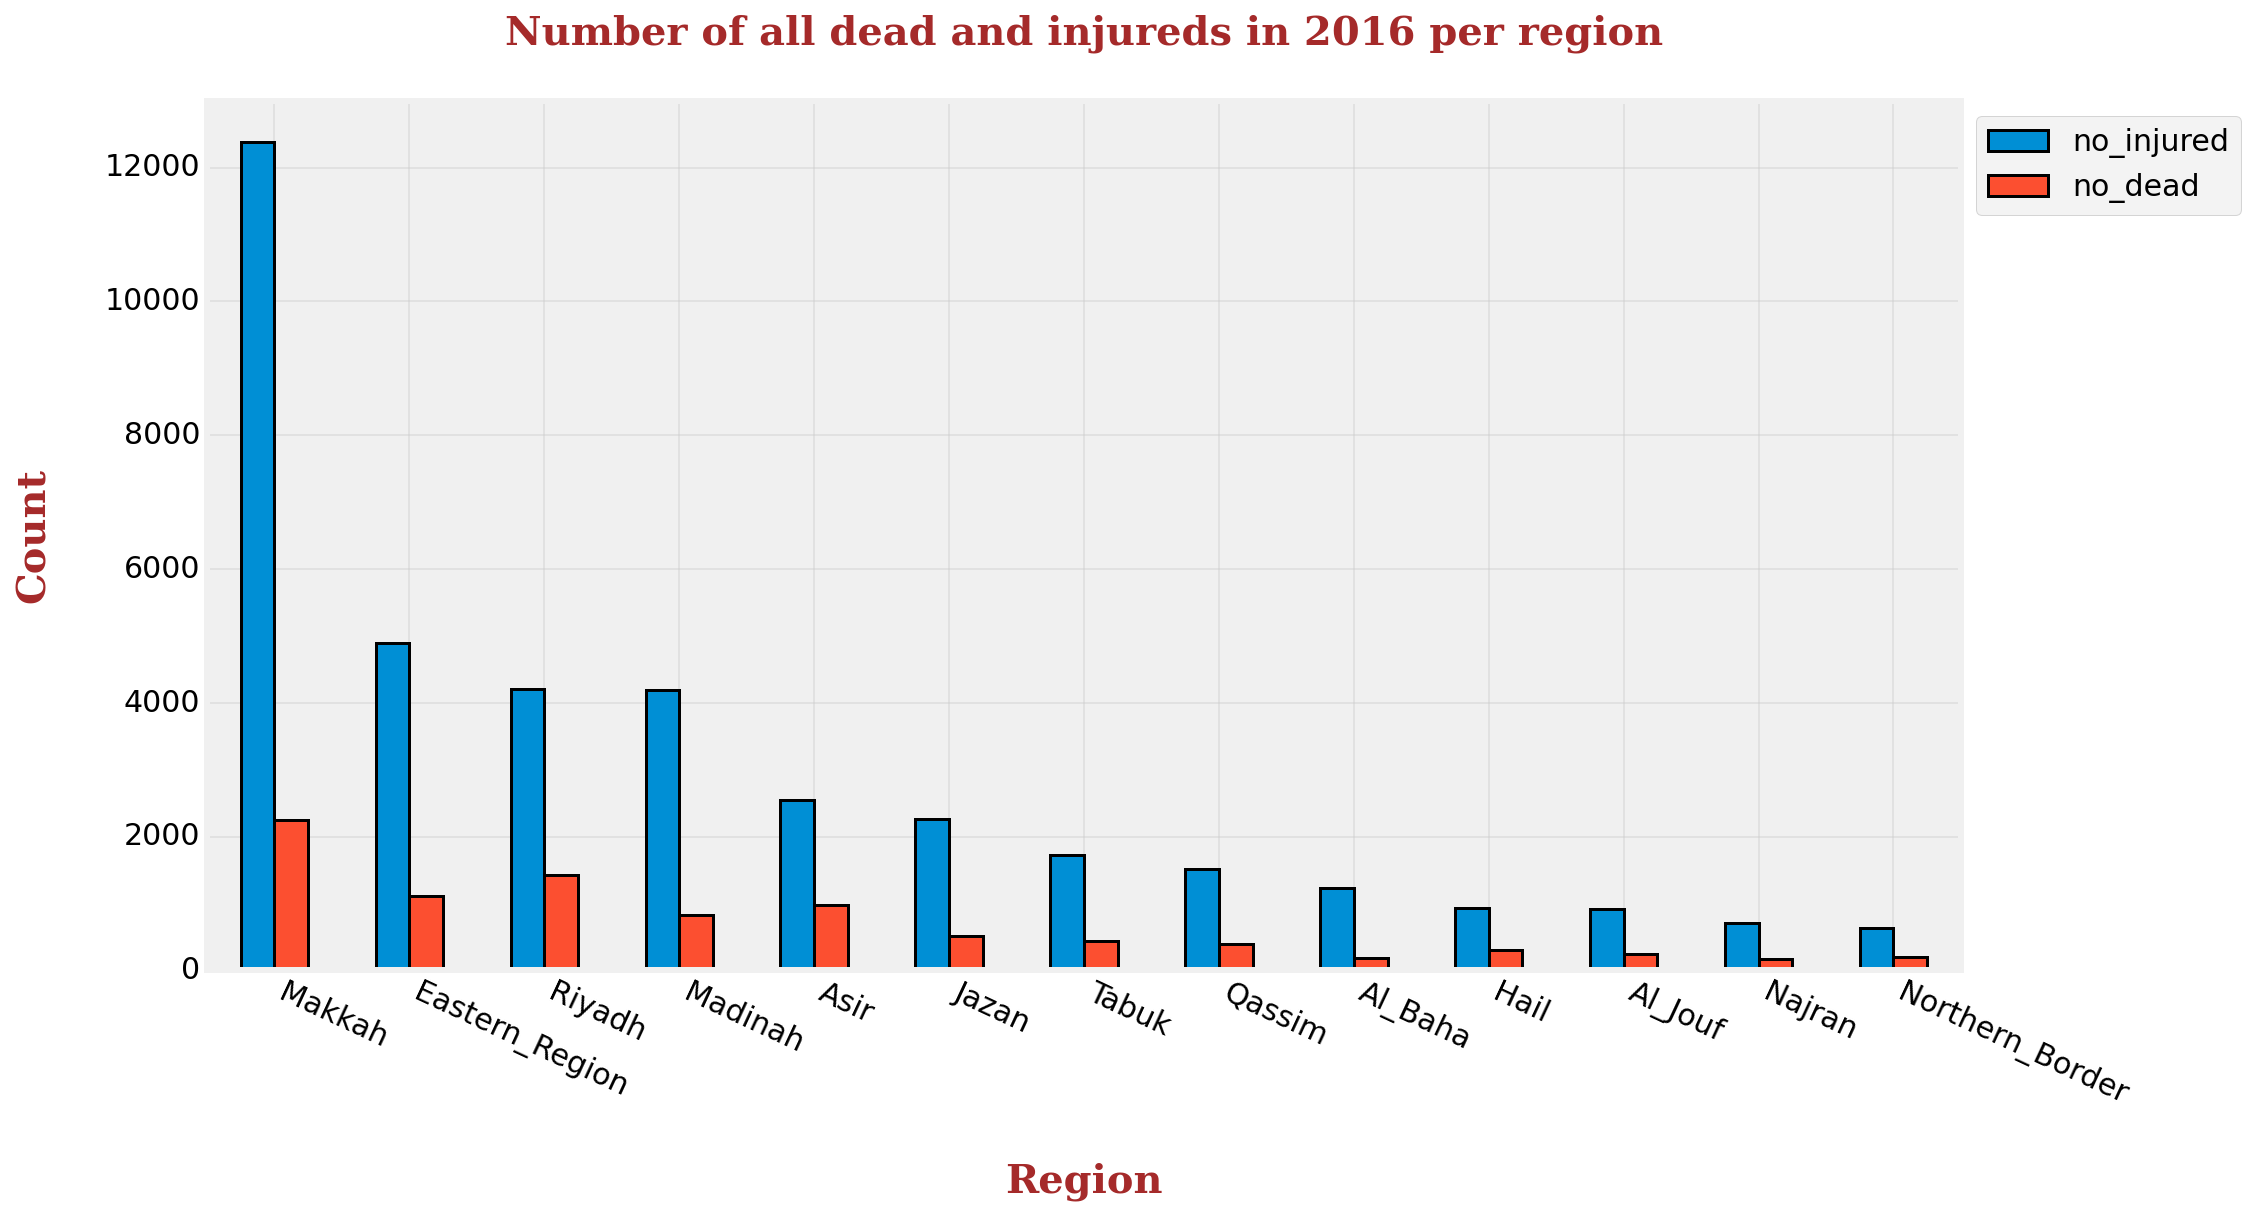

In [79]:
dead_inju_2016 = outer_df[['region','no_injured','no_dead']][outer_df.year == 2016].sort_values('no_dead',ascending=True)

dead_inju_2016.groupby('region').sum().sort_values('no_injured',
                                                   ascending=False).plot(kind='bar',        #Type of plot;
                                                                        figsize=(14,8),     #Plot size;
                                                                        edgecolor = 'black',#Edge bar color;
                                                                        linewidth=1.5)      #Size of edge color;
#Decoration
plt.xticks(rotation=-25, fontsize=15, horizontalalignment='left') #xticks option
plt.yticks( fontsize=15, verticalalignment='center')              #yticks option

plt.title("Number of all dead and injureds in 2016 per region\n", fontdict=font) #title 

plt.xlabel('\nRegion', fontdict=font) #xlabel;
plt.ylabel('Count\n', fontdict=font)  #ylabel;

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=15); #legend location;

plt.grid(alpha=0.4) #opacity of grid line

**Here we can see the barplot for all deads and injured in `2016` per region sorted by `no_injured`, and easily we can tell who whas the highest number of injured which is Makkah then Eastern_Region. But `Makkah` has a high cap between all of regions with over `12,383` injured over `2016`. For deads, Makkah still in front with over `2243` deaths over `2016` then `Riyadh` with `1430` deaths. When we go to the right each region is going less than Makkah bay far, Makkah in `2016` should made some plans to fix this by `2017`, i'll plot the `2017` year, and let's see if there's any changes or not.**

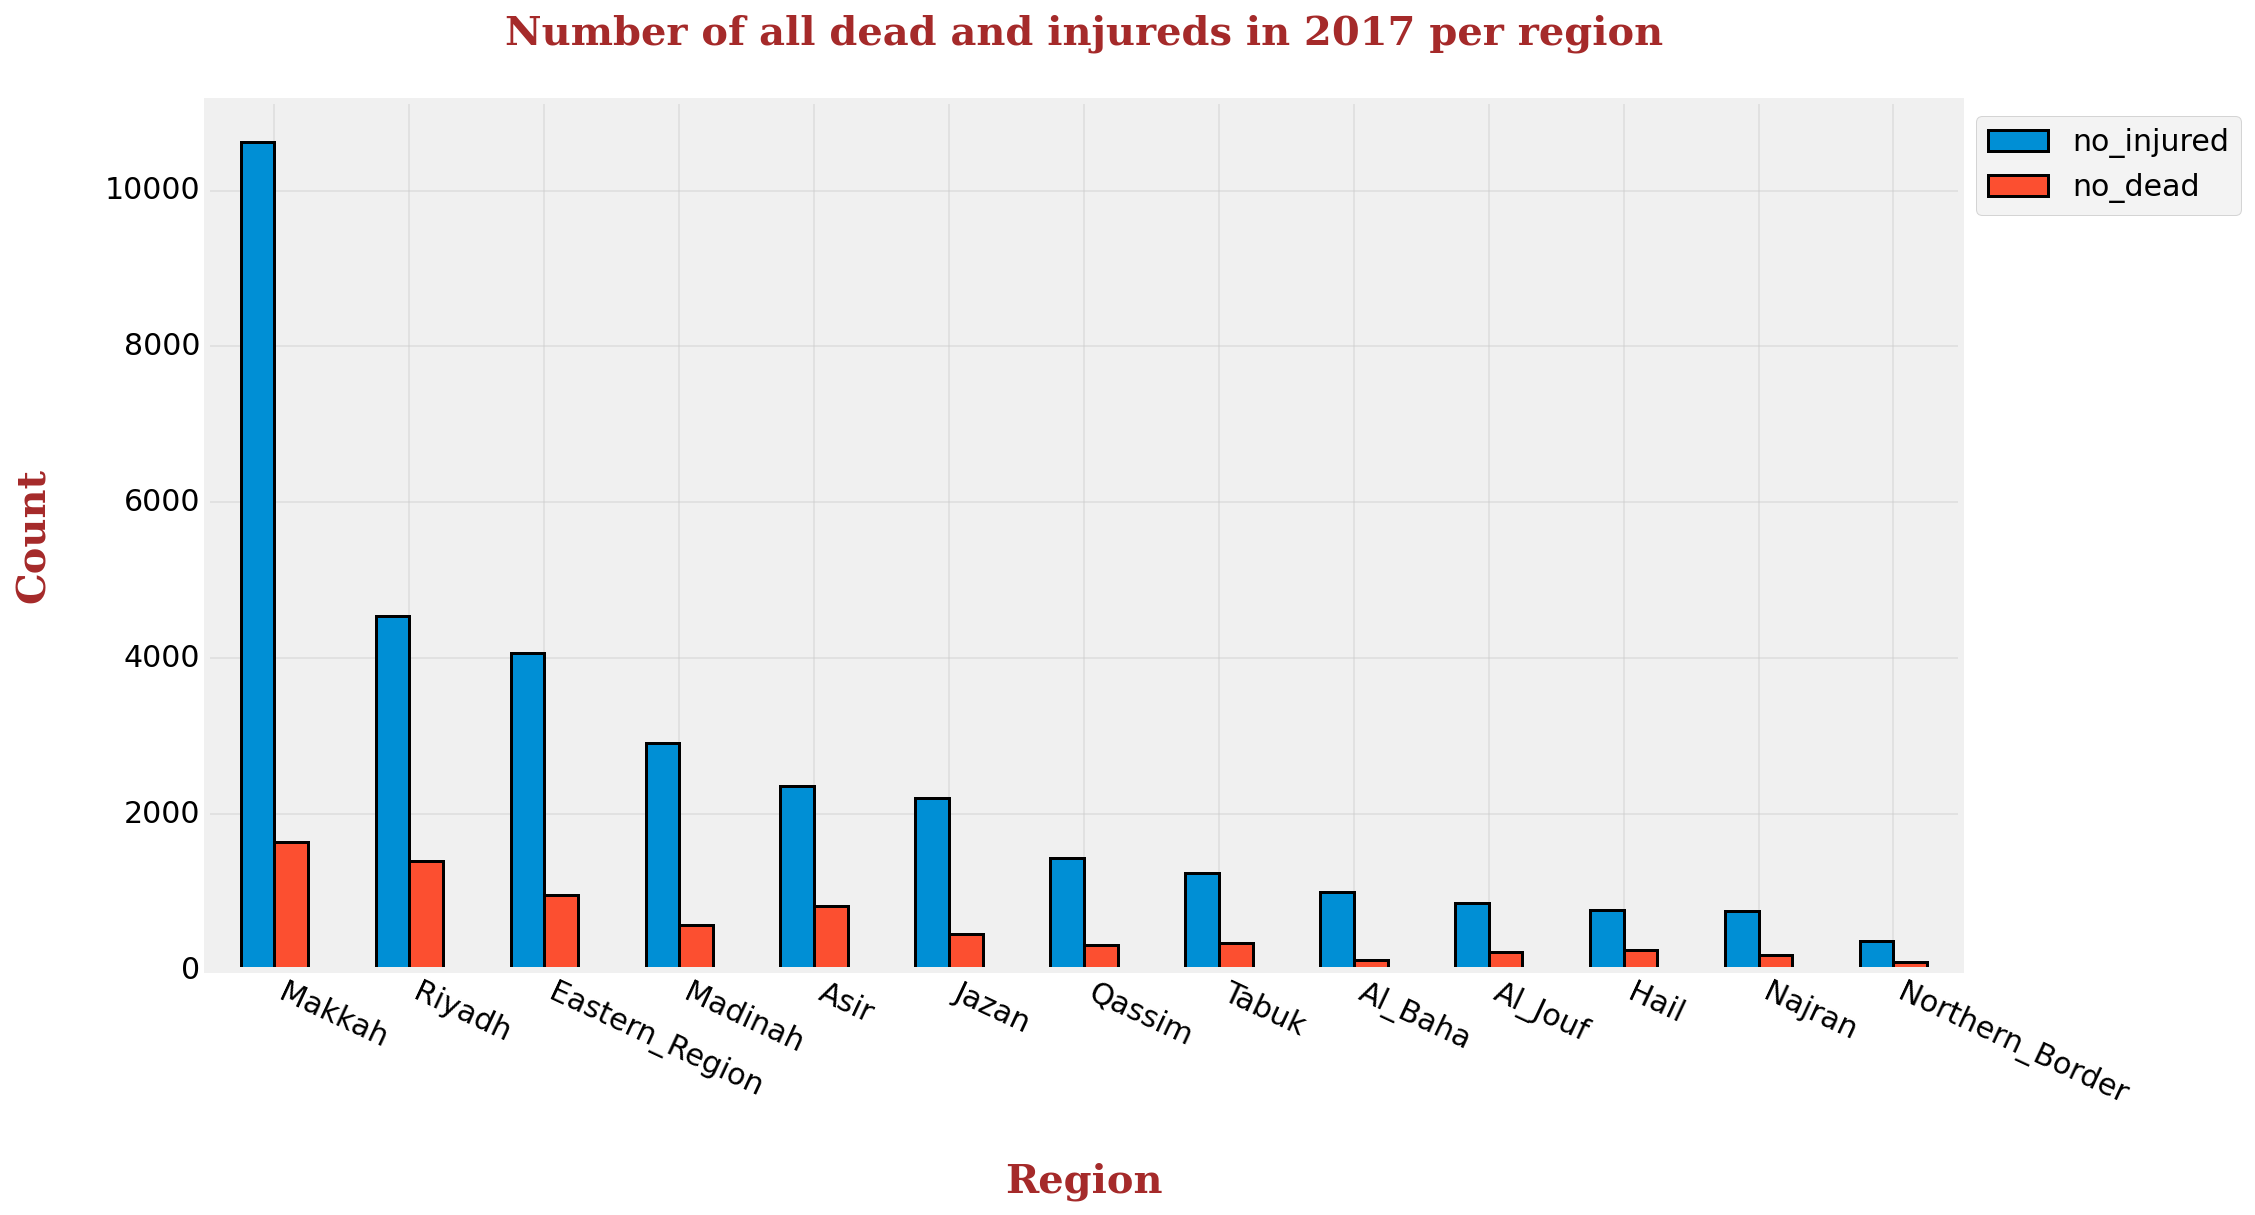

In [80]:
dead_inju_2017= outer_df[['region','no_injured','no_dead']][outer_df.year == 2017].sort_values('no_dead',ascending=True)

dead_inju_2017.groupby('region').sum().sort_values('no_injured',ascending=False).plot(kind='bar',     #Type of plot;
                                                                                 figsize=(14,8),      #Plot size;
                                                                                 edgecolor = 'black', #Edge bar color;
                                                                                 linewidth=1.5)       #Size of edge color;
#Decoration
plt.xticks(rotation=-25, fontsize=15, horizontalalignment='left') #xticks option
plt.yticks( fontsize=15, verticalalignment='center')              #yticks option

plt.title("Number of all dead and injureds in 2017 per region\n", fontdict=font) #title 

plt.xlabel('\nRegion', fontdict=font) #xlabel;
plt.ylabel('Count\n', fontdict=font)  #ylabel;

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=15); #legend location;

plt.grid(alpha=0.4) #opacity of grid line

**Here we can see the barplot for all deads and injured in `2017` per region sorted by `no_injured`, and easily we can tell again who whas the highest number of injured which is `Makkah` then `Riyadh` which is good for `Eastern` that they droped from what happen in `2016` but `Riyadh` increased by almost `10%`. But Makkah still the highest between all of regions with over `10,600` but they did well decreeasing from `12,600` to know is good thing. For deads, Makkah still in front with `2243` deaths over `2017` then `Riyadh` with `1430` deaths. As we go to the right each region is going less than before in `2016`. Which is good for all.**

___________________________________________________________________________________________________________________________

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answer:

**First let's see what is the numeric columns in our dataframe, by executing the follwoing code**

In [81]:
outer_df.select_dtypes('number').columns

Index(['year', 'number_of_licenses', 'region_x', 'region_y', 'no_accidents',
       'no_dead', 'no_injured'],
      dtype='object')

- **We will ignore 'year', 'region_x', 'region_y', because year is a date column and region_x and y are geo points represented as float**

- **Second i'll use some functions that i created will make some of the work easy and better than writing each code each time.**

In [82]:
def get_tendency(data, column):
    """A function return some stastistics calculation, Parm:data, column."""
   
    print(f'[Mean]   ---> \'{column}\' = {statistics.mean(data[column])}')   #Print the mean;
    print(f'[Median] ---> \'{column}\' = {statistics.median(data[column])}') #Print the Median;
    print(f'[Mode]   ---> \'{column}\' = {statistics.mode(data[column])}')   #Print the Mode;

In [83]:
def get_spread(data, column):
    """A function return some measures of spred, Parm: data, column."""
    
    Q1 = np.percentile(data[column], 25)
    Q2 = np.percentile(data[column], 50)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    
    print(f'[Range]    ---> \'{column}\' = {np.ptp(data[column])}')  #Print the range;
    print(f'[Variance] ---> \'{column}\' = {np.var(data[column])}')  #Print the Variance;
    print(f'[STD]      ---> \'{column}\' = {np.std(data[column])}')  #Print the STD;
    print(f'[Q1]       ---> \'{column}\' = {Q1}')  #Print the STD;
    print(f'[Q2]       ---> \'{column}\' = {Q2}')  #Print the STD;
    print(f'[Q3]       ---> \'{column}\' = {Q3}')  #Print the STD;
    print(f'[IQR]      ---> \'{column}\' = {IQR}')  #Print the STD;

In [84]:
def get_shape(data, column):
    """A function return some measures of shape with Dist ploting, Parm: data, column."""
    #Ploting
    fig, ax = plt.subplots(figsize=(13,8), tight_layout=True) # initials a plot with fig size = 13*5;


    sns.histplot(data[column],        # select data;
             color = "deepskyblue",   # Change bars color;
             edgecolor = 'black',     # Change bar edge color;
             bins=len(data[column]),
             ax=ax)
    
    ax.set_title(f'The distribution of {column}', fontdict=font, pad=20)  # Set the title for first plot;
    
    ax.set_xlabel('\n'+column, fontdict=font)              #Set the label x;
    ax.set_ylabel('count\n', fontdict=font)                #Set label y;
    
    plt.xticks(fontsize=15, horizontalalignment='center')  #xticks option;
    plt.yticks(fontsize=15, verticalalignment='center')    #yticks option;
    plt.grid(alpha=0.4)                                    #opacity of grid line;
    
    #Calculation
    skew = data[column].skew()          #Get the Skew of distribution;
        
    if skew > 0:  #Printing the type of the Skew; skew>0 = +, skew<0 = -
        print(f'[{column}], Skew = {skew} ==> Positive Skewed')
    elif skew < 0:
        print(f'[{column}], Skew = {skew} ==> Negative Skewed')
    else:
        print(f'[{column}], Skew = {skew} ==> Not Skwed')

---

**First thing before we start, there are no mode for our data, and the function and other liberaies will show that there are mode. For `statistics` library it will return the first number and for `stats` it will print the smallest number.**

In [87]:
test = [5,3,2,6] #No mode list
statistics.mode(test), mode(test)[0] #Print the mode using statistics and stats libs

(5, array([2]))

---

### - **Central tendency**

**Symmetric: $mean = median = mode$**

**Negatively skewed:** $mean < median < mode$

**Positively skewed:** $mode < median < mean$

**1) number_of_licenses**

In [85]:
get_tendency(outer_df,'number_of_licenses')

[Mean]   ---> 'number_of_licenses' = 28915.347692307692
[Median] ---> 'number_of_licenses' = 10267
[Mode]   ---> 'number_of_licenses' = 143954


**We can see from above results, the Skew of `'number_of_licenses'` is `Positive skewed` because  $mode<median<mean$. And the mode here is `0` not `143954`, because each observation appeared oonly once and the newxt plot showing that.**

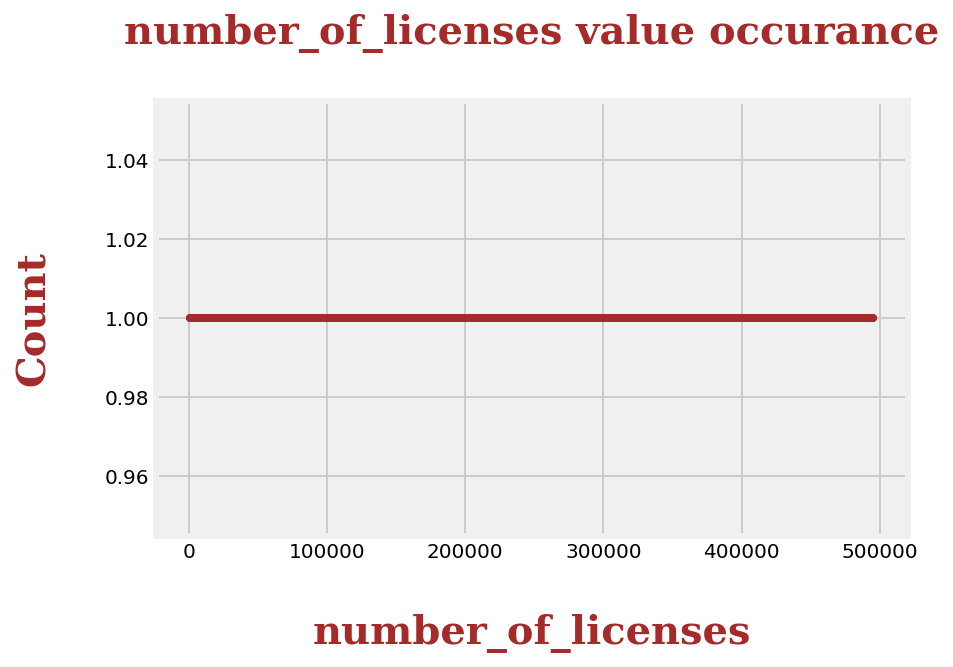

In [86]:
outer_df.number_of_licenses.value_counts().plot(color='brown')
plt.title('number_of_licenses value occurance\n', fontdict=font)
plt.xlabel('\nnumber_of_licenses', fontdict=font)
plt.ylabel('Count\n', fontdict=font);


**We can see from the line plot that, there are no Mode. All of the data has occured only once. So there are no mode.**

**2) no_accidents**

In [87]:
get_tendency(outer_df.dropna(),'no_accidents')

[Mean]   ---> 'no_accidents' = 38225.692307692305
[Median] ---> 'no_accidents' = 16050.5
[Mode]   ---> 'no_accidents' = 9379.0


- **I used `.dropna()` because this is the combined set so this column doesn't have enough data for all observations, droping NaNs will return only the needed data and will not let NaNs affect our claculations. <br>**
- **We can see from above results, the Skew of `'no_accidents'` is `Positive skewed` because  $mode<median<mean$. And the mode here is also `0` not `9379.0`, because each observation appeared oonly once and the newxt plot showing that.**

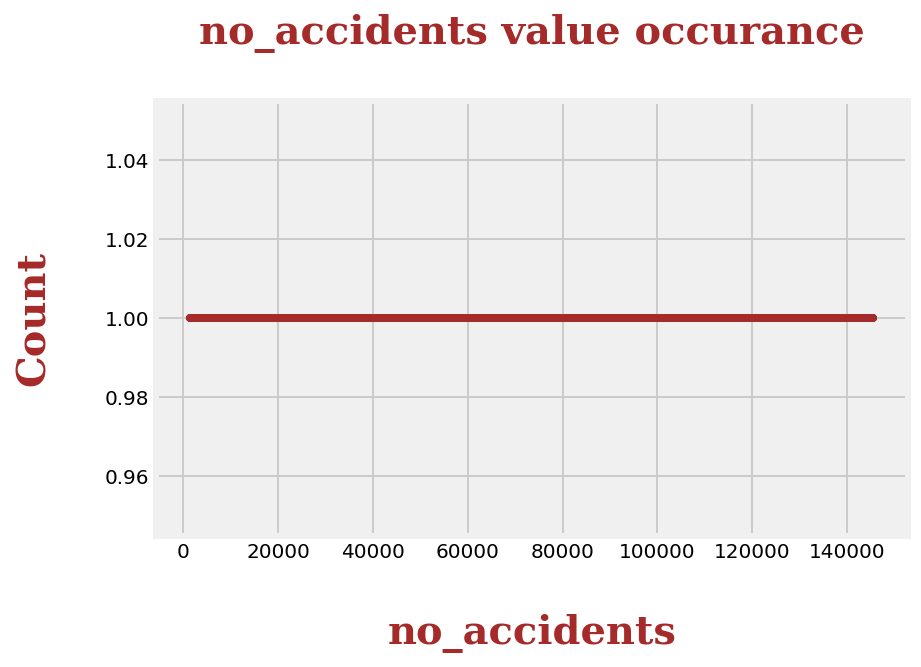

In [88]:
outer_df.no_accidents.value_counts().plot(color='brown')
plt.title('no_accidents value occurance\n', fontdict=font)
plt.xlabel('\nno_accidents', fontdict=font)
plt.ylabel('Count\n', fontdict=font);

**We can see from the line plot that, there are no Mode. All of the data has occured only once. So there are no mode.**

**3) no_dead**

In [89]:
get_tendency(outer_df.dropna(),'no_dead')

[Mean]   ---> 'no_dead' = 635.3846153846154
[Median] ---> 'no_dead' = 415.5
[Mode]   ---> 'no_dead' = 265.0


- **I used `.dropna()` because this is the combined set so this column doesn't have enough data for all observations, droping NaNs will return only the needed data and will not let NaNs affect our claculations. <br>**
- **We can see from above results, the Skew of `'no_dead'` is `Positive skewed` because  $mode<median<mean$. And the mode here is also `0` not `265.0`, because each observation appeared oonly once and the newxt plot showing that.**

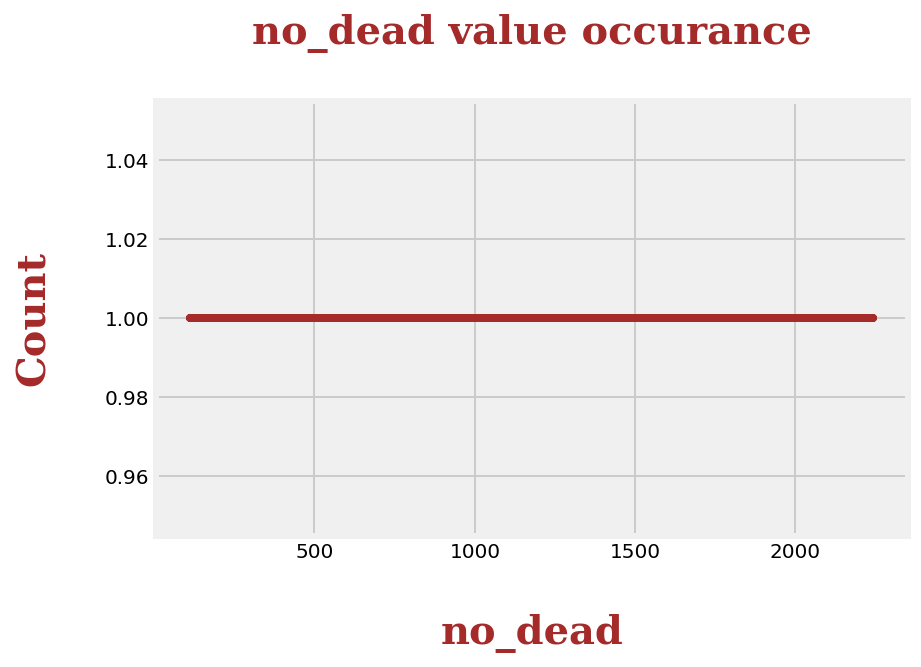

In [90]:
outer_df.no_dead.value_counts().plot(color='brown')
plt.title('no_dead value occurance\n', fontdict=font)
plt.xlabel('\nno_dead', fontdict=font)
plt.ylabel('Count\n', fontdict=font);

**We can see from the line plot that, there are no Mode. All of the data has occured only once. So there are no mode.**

**4) no_injured**

In [91]:
get_tendency(outer_df.dropna(),'no_injured')

[Mean]   ---> 'no_injured' = 2743.0384615384614
[Median] ---> 'no_injured' = 1618.5
[Mode]   ---> 'no_injured' = 773.0


- **I used `.dropna()` because this is the combined set so this column doesn't have enough data for all observations, droping NaNs will return only the needed data and will not let NaNs affect our claculations. <br><br>**
- **We can see from above results, the Skew of `'no_injured'` is `Positive skewed` because  $mode<median<mean$. And the mode here is also `0` not `773.0`, because each observation appeared oonly once and the newxt plot showing that.**

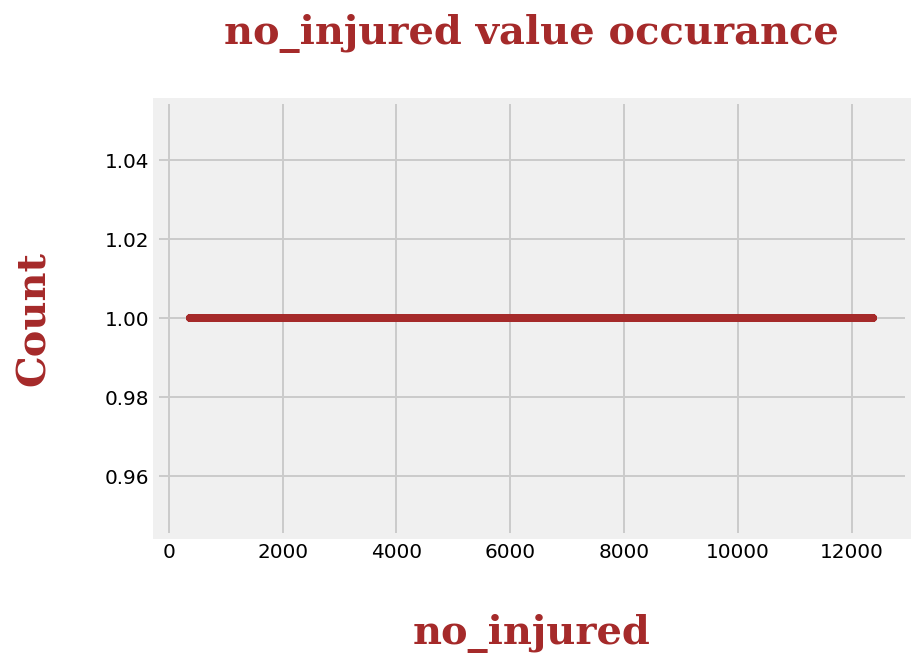

In [92]:
outer_df.no_injured.value_counts().plot(color='brown')
plt.title('no_injured value occurance\n', fontdict=font)
plt.xlabel('\nno_injured', fontdict=font)
plt.ylabel('Count\n', fontdict=font);

**We can see from the line plot that, there are no Mode. All of the data has occured only once. So there are no mode.**

---

### - **Measure of spread**

- **Variance reflect the  measure of the spread between numbers in a data set. in simple words variance measures how far each number in dataset is from the mean.**
 - Large variance means the numbers in dataset are far from the mean and far from each other.
 - Small variance means the opposite. 
 - Variance can't be negative, because we can't say that point `A` is far from point `B` with distance $= -1$.<br><br>
- **The standard deviation is measure the dispersion of a dataset to its mean.**
 - Calculated as the square root of the variance.
 - If data points are far from the mean, we get a high `STD` in the dataset.
 - In simple words, the far points from thier mean the high the STD.
<br><br>
- **Range is the difference bewteen the maximum value and the minimum value.**<br>
<br>
- **Percentiles means the percentage of group of data that fall under a particular value.**
 - Ex. If student got 4.6/5 gpa that means he's in the 91% part of the data and means he's better than 91% of others.
 - Quartiles are values that divide our data to quarters, and they based on percentiles [Q1, Q2, Q3].
 - The IQR is a measure of spred and this range means the distance between the Q1 and the Q3, (IQR = Q3 – Q1).
 - High IQRs means the data are more spread out.
 - And IQR represent the middle half of the data, One part of the values fall below the IQR and another part of the values are above it. 

**1) number_of_licenses**

In [93]:
get_spread(outer_df,'number_of_licenses')

[Range]    ---> 'number_of_licenses' = 494392
[Variance] ---> 'number_of_licenses' = 2241648471.1929564
[STD]      ---> 'number_of_licenses' = 47346.0502174464
[Q1]       ---> 'number_of_licenses' = 4846.0
[Q2]       ---> 'number_of_licenses' = 10267.0
[Q3]       ---> 'number_of_licenses' = 25423.0
[IQR]      ---> 'number_of_licenses' = 20577.0


**2) no_accidents**

In [94]:
get_spread(outer_df.dropna(),'no_accidents')

[Range]    ---> 'no_accidents' = 144127.0
[Variance] ---> 'no_accidents' = 2078523661.4437866
[STD]      ---> 'no_accidents' = 45590.82869880505
[Q1]       ---> 'no_accidents' = 10276.25
[Q2]       ---> 'no_accidents' = 16050.5
[Q3]       ---> 'no_accidents' = 30981.25
[IQR]      ---> 'no_accidents' = 20705.0


**3) no_dead**

In [95]:
get_spread(outer_df.dropna(),'no_dead')

[Range]    ---> 'no_dead' = 2131.0
[Variance] ---> 'no_dead' = 290636.3136094675
[STD]      ---> 'no_dead' = 539.1069593406002
[Q1]       ---> 'no_dead' = 241.25
[Q2]       ---> 'no_dead' = 415.5
[Q3]       ---> 'no_dead' = 929.25
[IQR]      ---> 'no_dead' = 688.0


**4) no_injured**

In [96]:
get_spread(outer_df.dropna(),'no_injured')

[Range]    ---> 'no_injured' = 12009.0
[Variance] ---> 'no_injured' = 8213299.190828402
[STD]      ---> 'no_injured' = 2865.885411322023
[Q1]       ---> 'no_injured' = 923.0
[Q2]       ---> 'no_injured' = 1618.5
[Q3]       ---> 'no_injured' = 3784.0
[IQR]      ---> 'no_injured' = 2861.0


---

### - **Measure of shape**

- **Skewness is a measure of asymmetry of a distribution, In a normal distribution, the mean divides the curve symmetrically into two equal parts at the median and the value of skewness is zero.**
 - When a distribution is symmetric the tail of the distribution is skewed equaly to each side.
 - When the value of the skewness is negative, the tail of the distribution is longer towards the left hand side of the curve.
 - When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve.
 - The distribution is defined by the mean $μ$, and standard deviation with $σ$. In simple word the mean determine the location and the standard deviation the spread.

**1) number_of_licenses**

[number_of_licenses], Skew = 4.177206160083835 ==> Positive Skewed


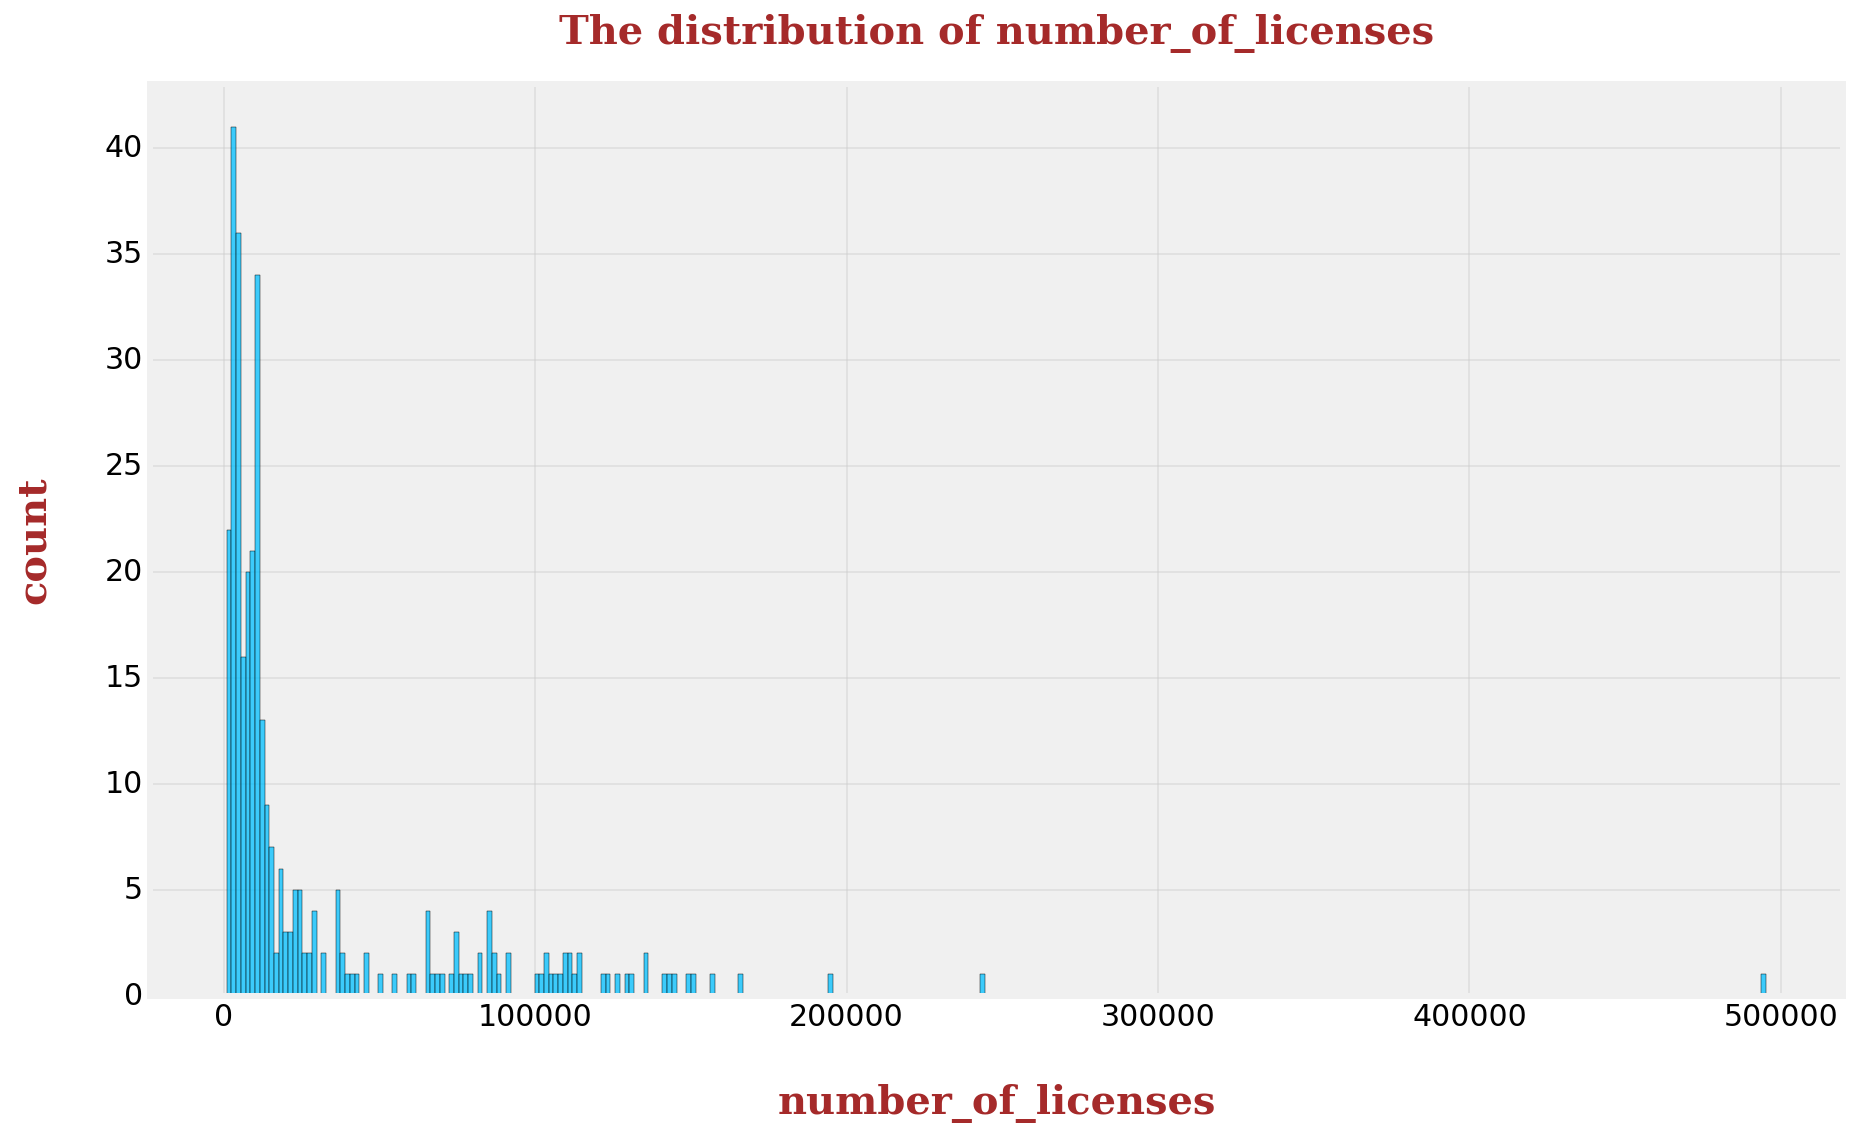

In [97]:
get_shape(outer_df, 'number_of_licenses')

- **We can see from the Skew value or even just by looking at the histplot, the `number_of_licenses` is skewed by `4.17` to the right (Positive).**

**2) no_accidents**

[no_accidents], Skew = 1.4864763703547583 ==> Positive Skewed


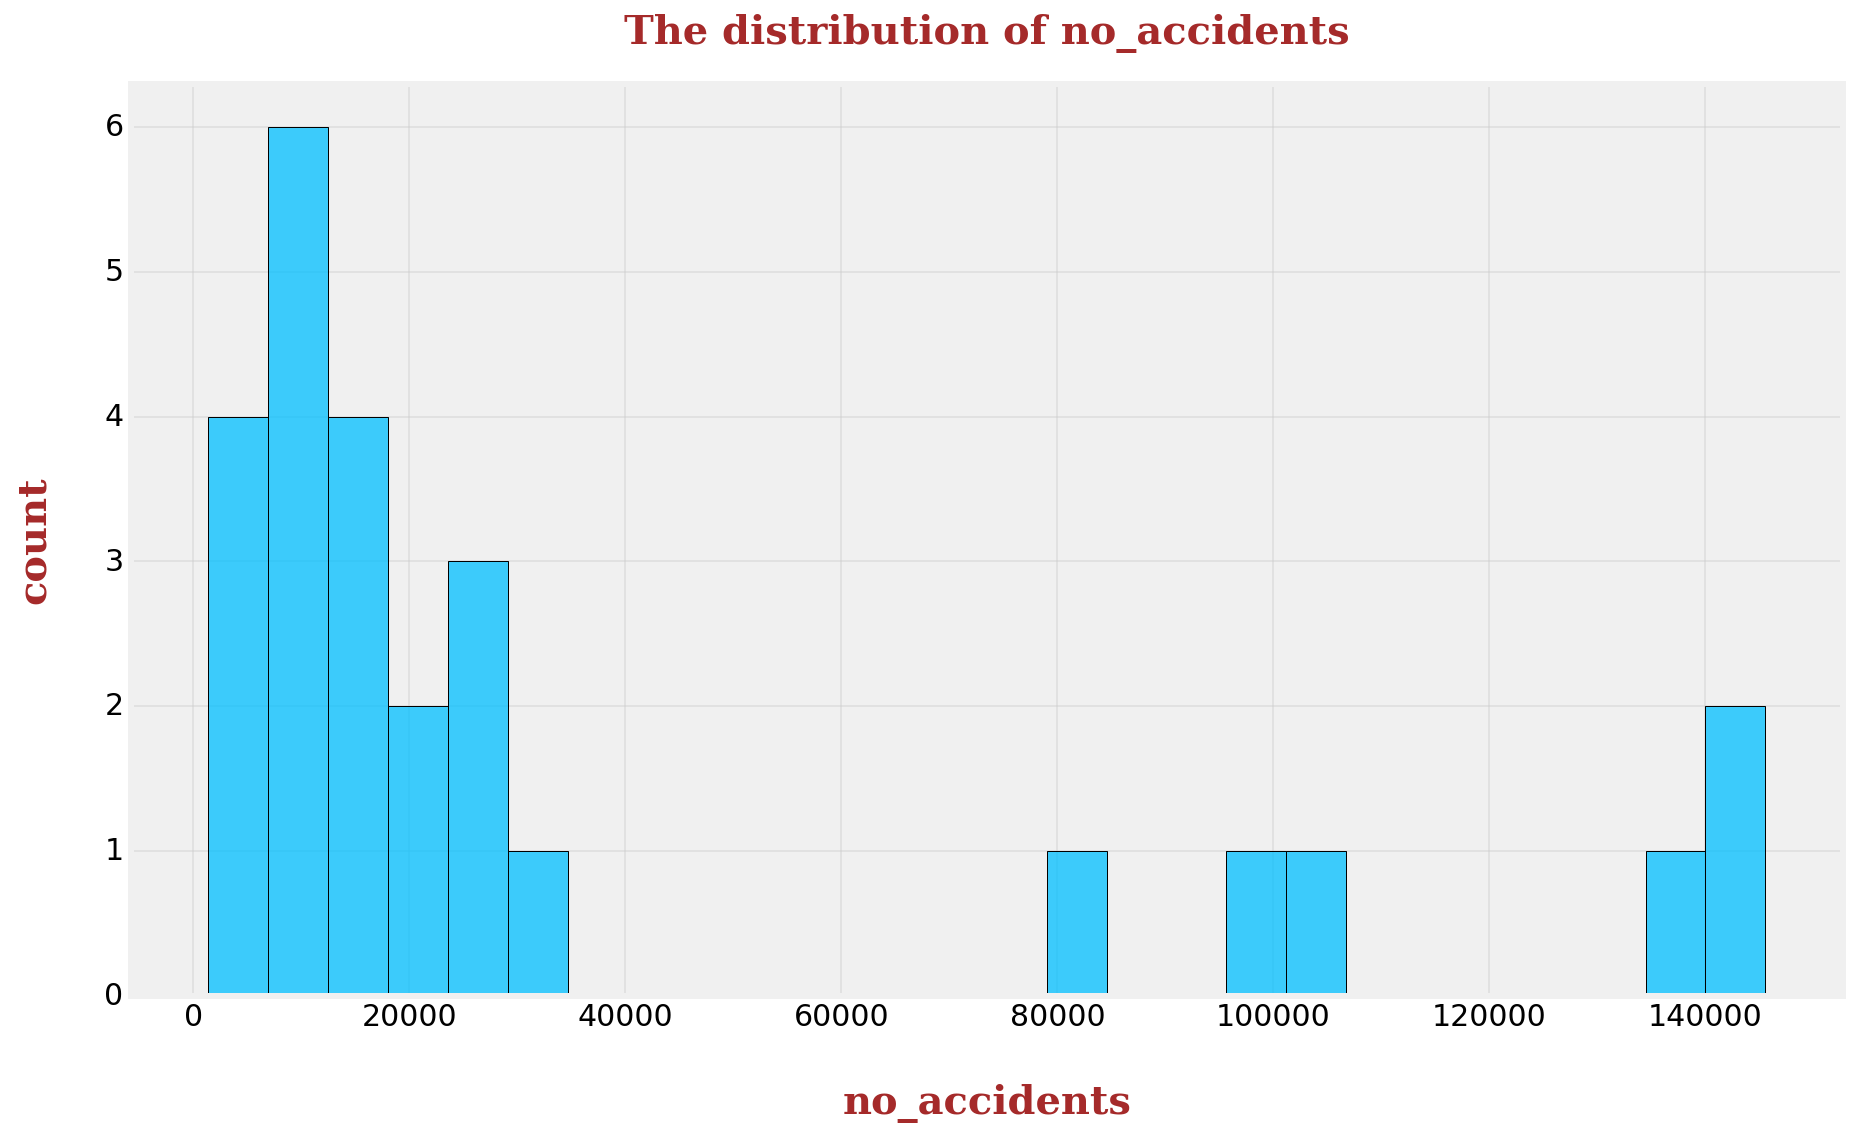

In [101]:
get_shape(outer_df.dropna(), 'no_accidents')

- **We can see from the Skew value the `no_accidents` is skewed by `1.48` to the right (Positive). But for the plot it seems not clear so much that's why Skew values sometimes help.**

**3) no_dead**

[no_dead], Skew = 1.4060799290932424 ==> Positive Skewed


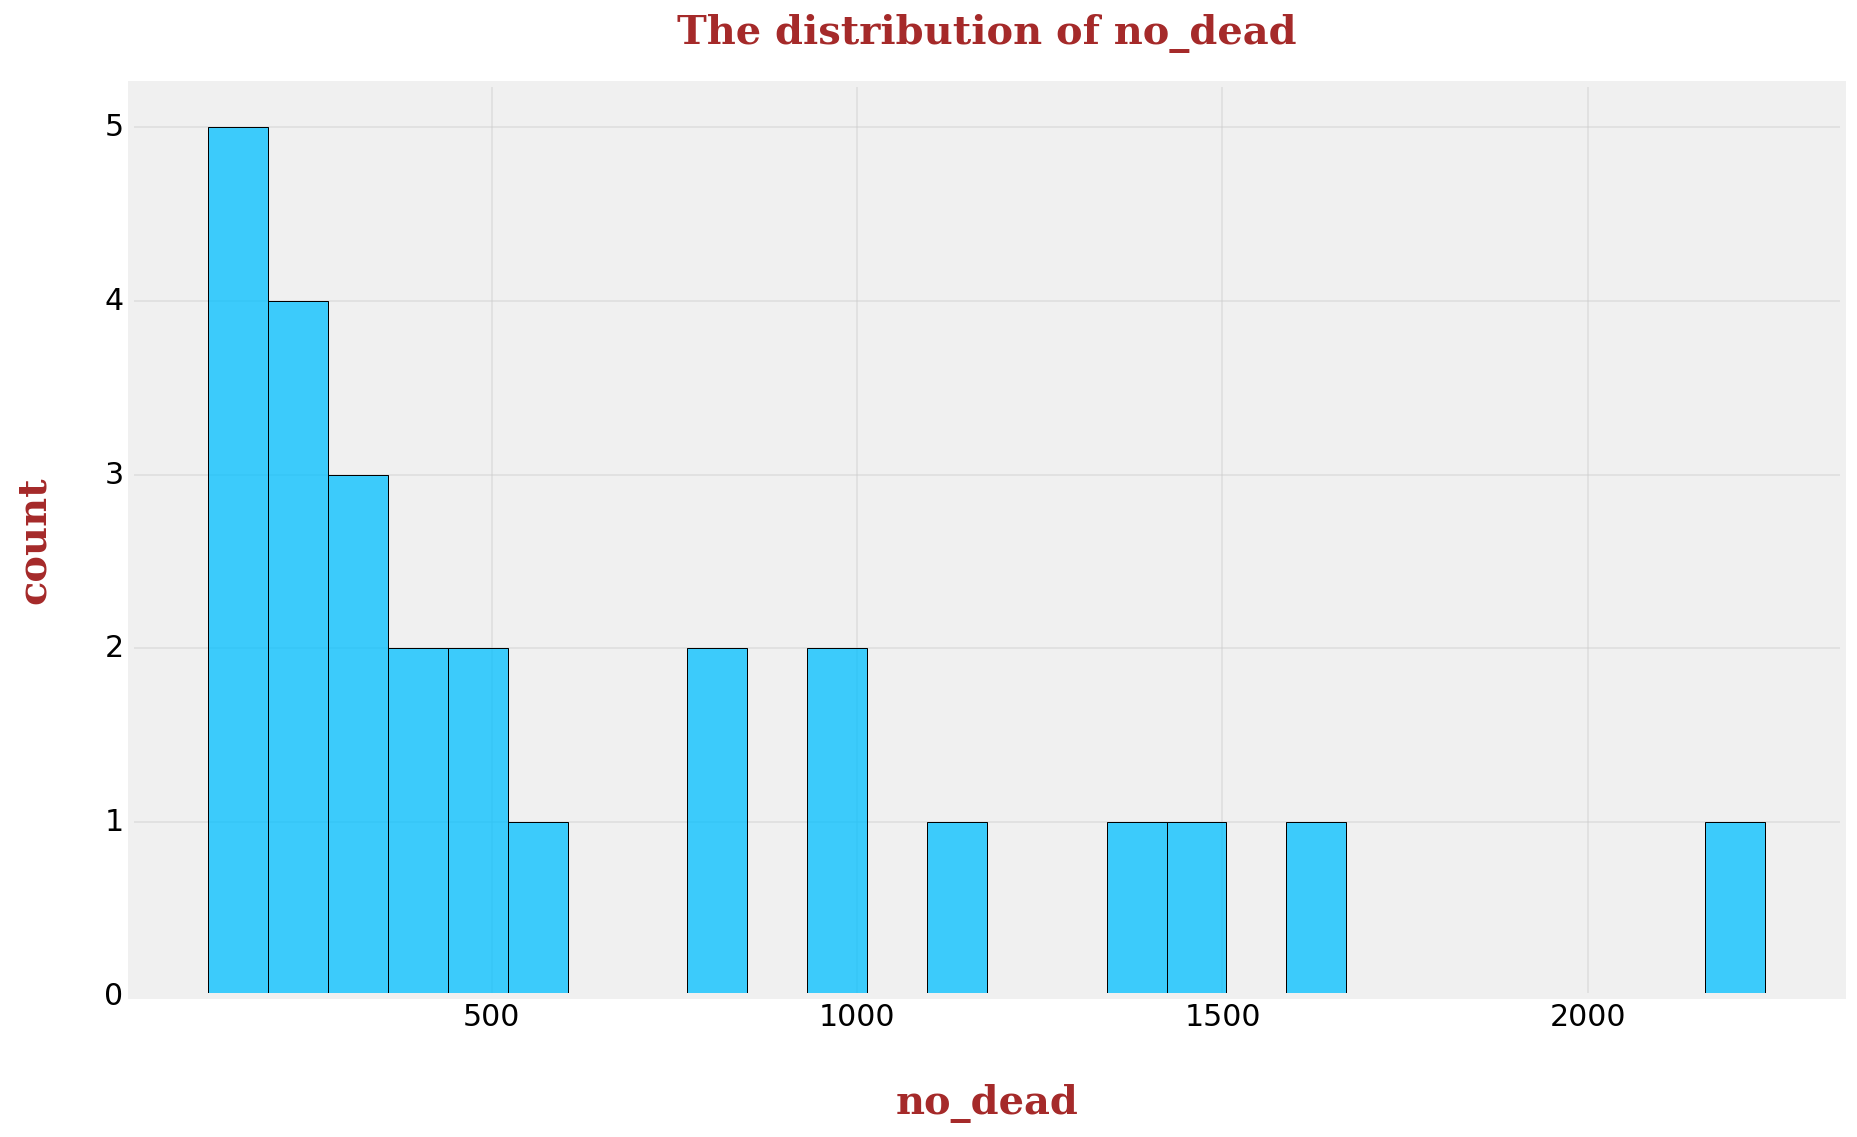

In [98]:
get_shape(outer_df.dropna(), 'no_dead')

- **We can see from the Skew value the `no_dead` is skewed by `1.40` to the right (Positive). But for the plot it's better than previous but still not clear that it's Postive Skew but the Skew vlaue admit it.**

**4) no_injured**

[no_injured], Skew = 2.3027527445728873 ==> Positive Skewed


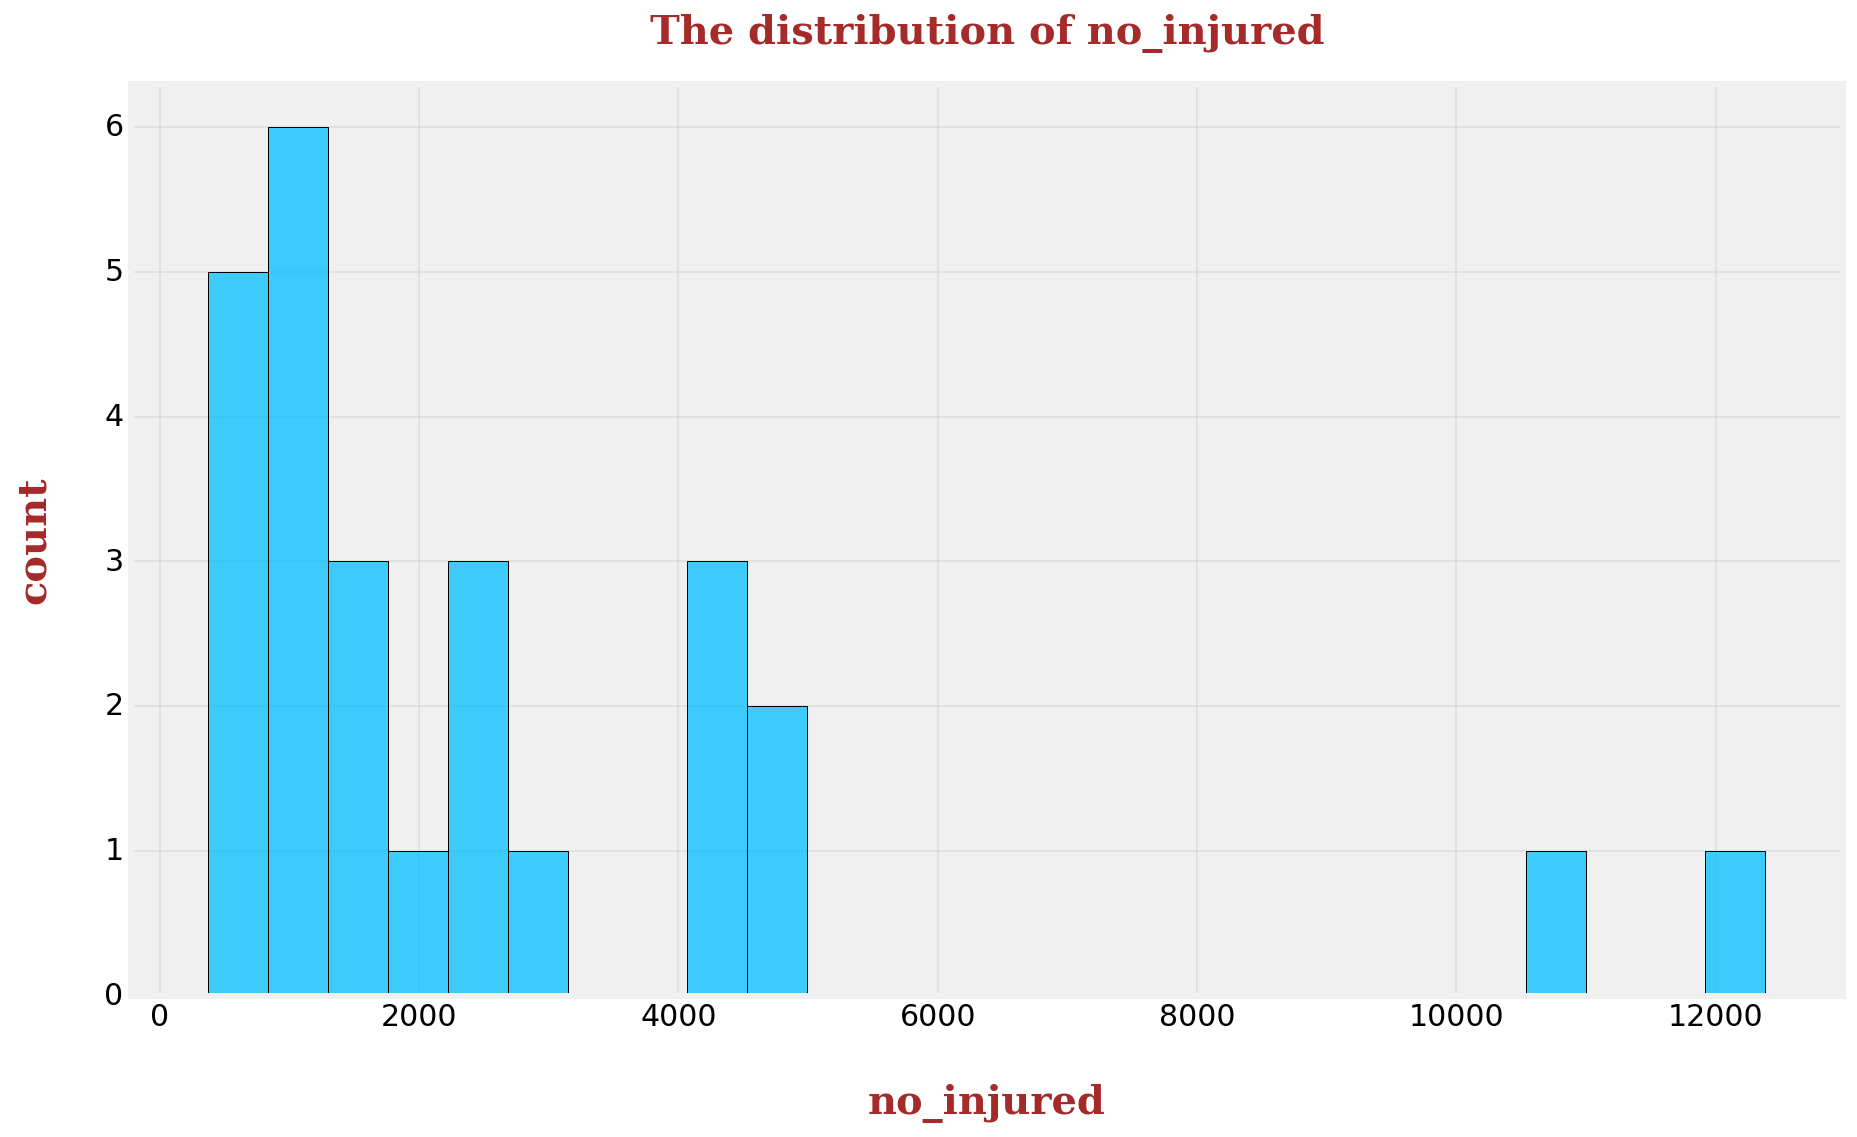

In [99]:
get_shape(outer_df.dropna(), 'no_injured')

- **We can see from the Skew value the no_dead is skewed by `2.30` to the right (Positive). But for the plot it's worst than than previous and still not clear that it's Postive Skew but the Skew vlaue admit it. And this is because of the outilers in every plot not only for this one.**

- **All of the Skews considered as large skewed**

---

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

In [100]:
def sampler(data, num_smp, size_smp):
    """ A function to return samples means, parm: data, numper of sampels, samples size."""
    sample_means = [] #Empty list
    
    for i in range(num_smp): #itterate in to number of samples
        sample = np.random.choice(data, size_smp, replace=True) #Generate a random sample for current column 
        sample_means.append(np.mean(sample)) #Append each mean
        
    return(sample_means) #Return the samples mean

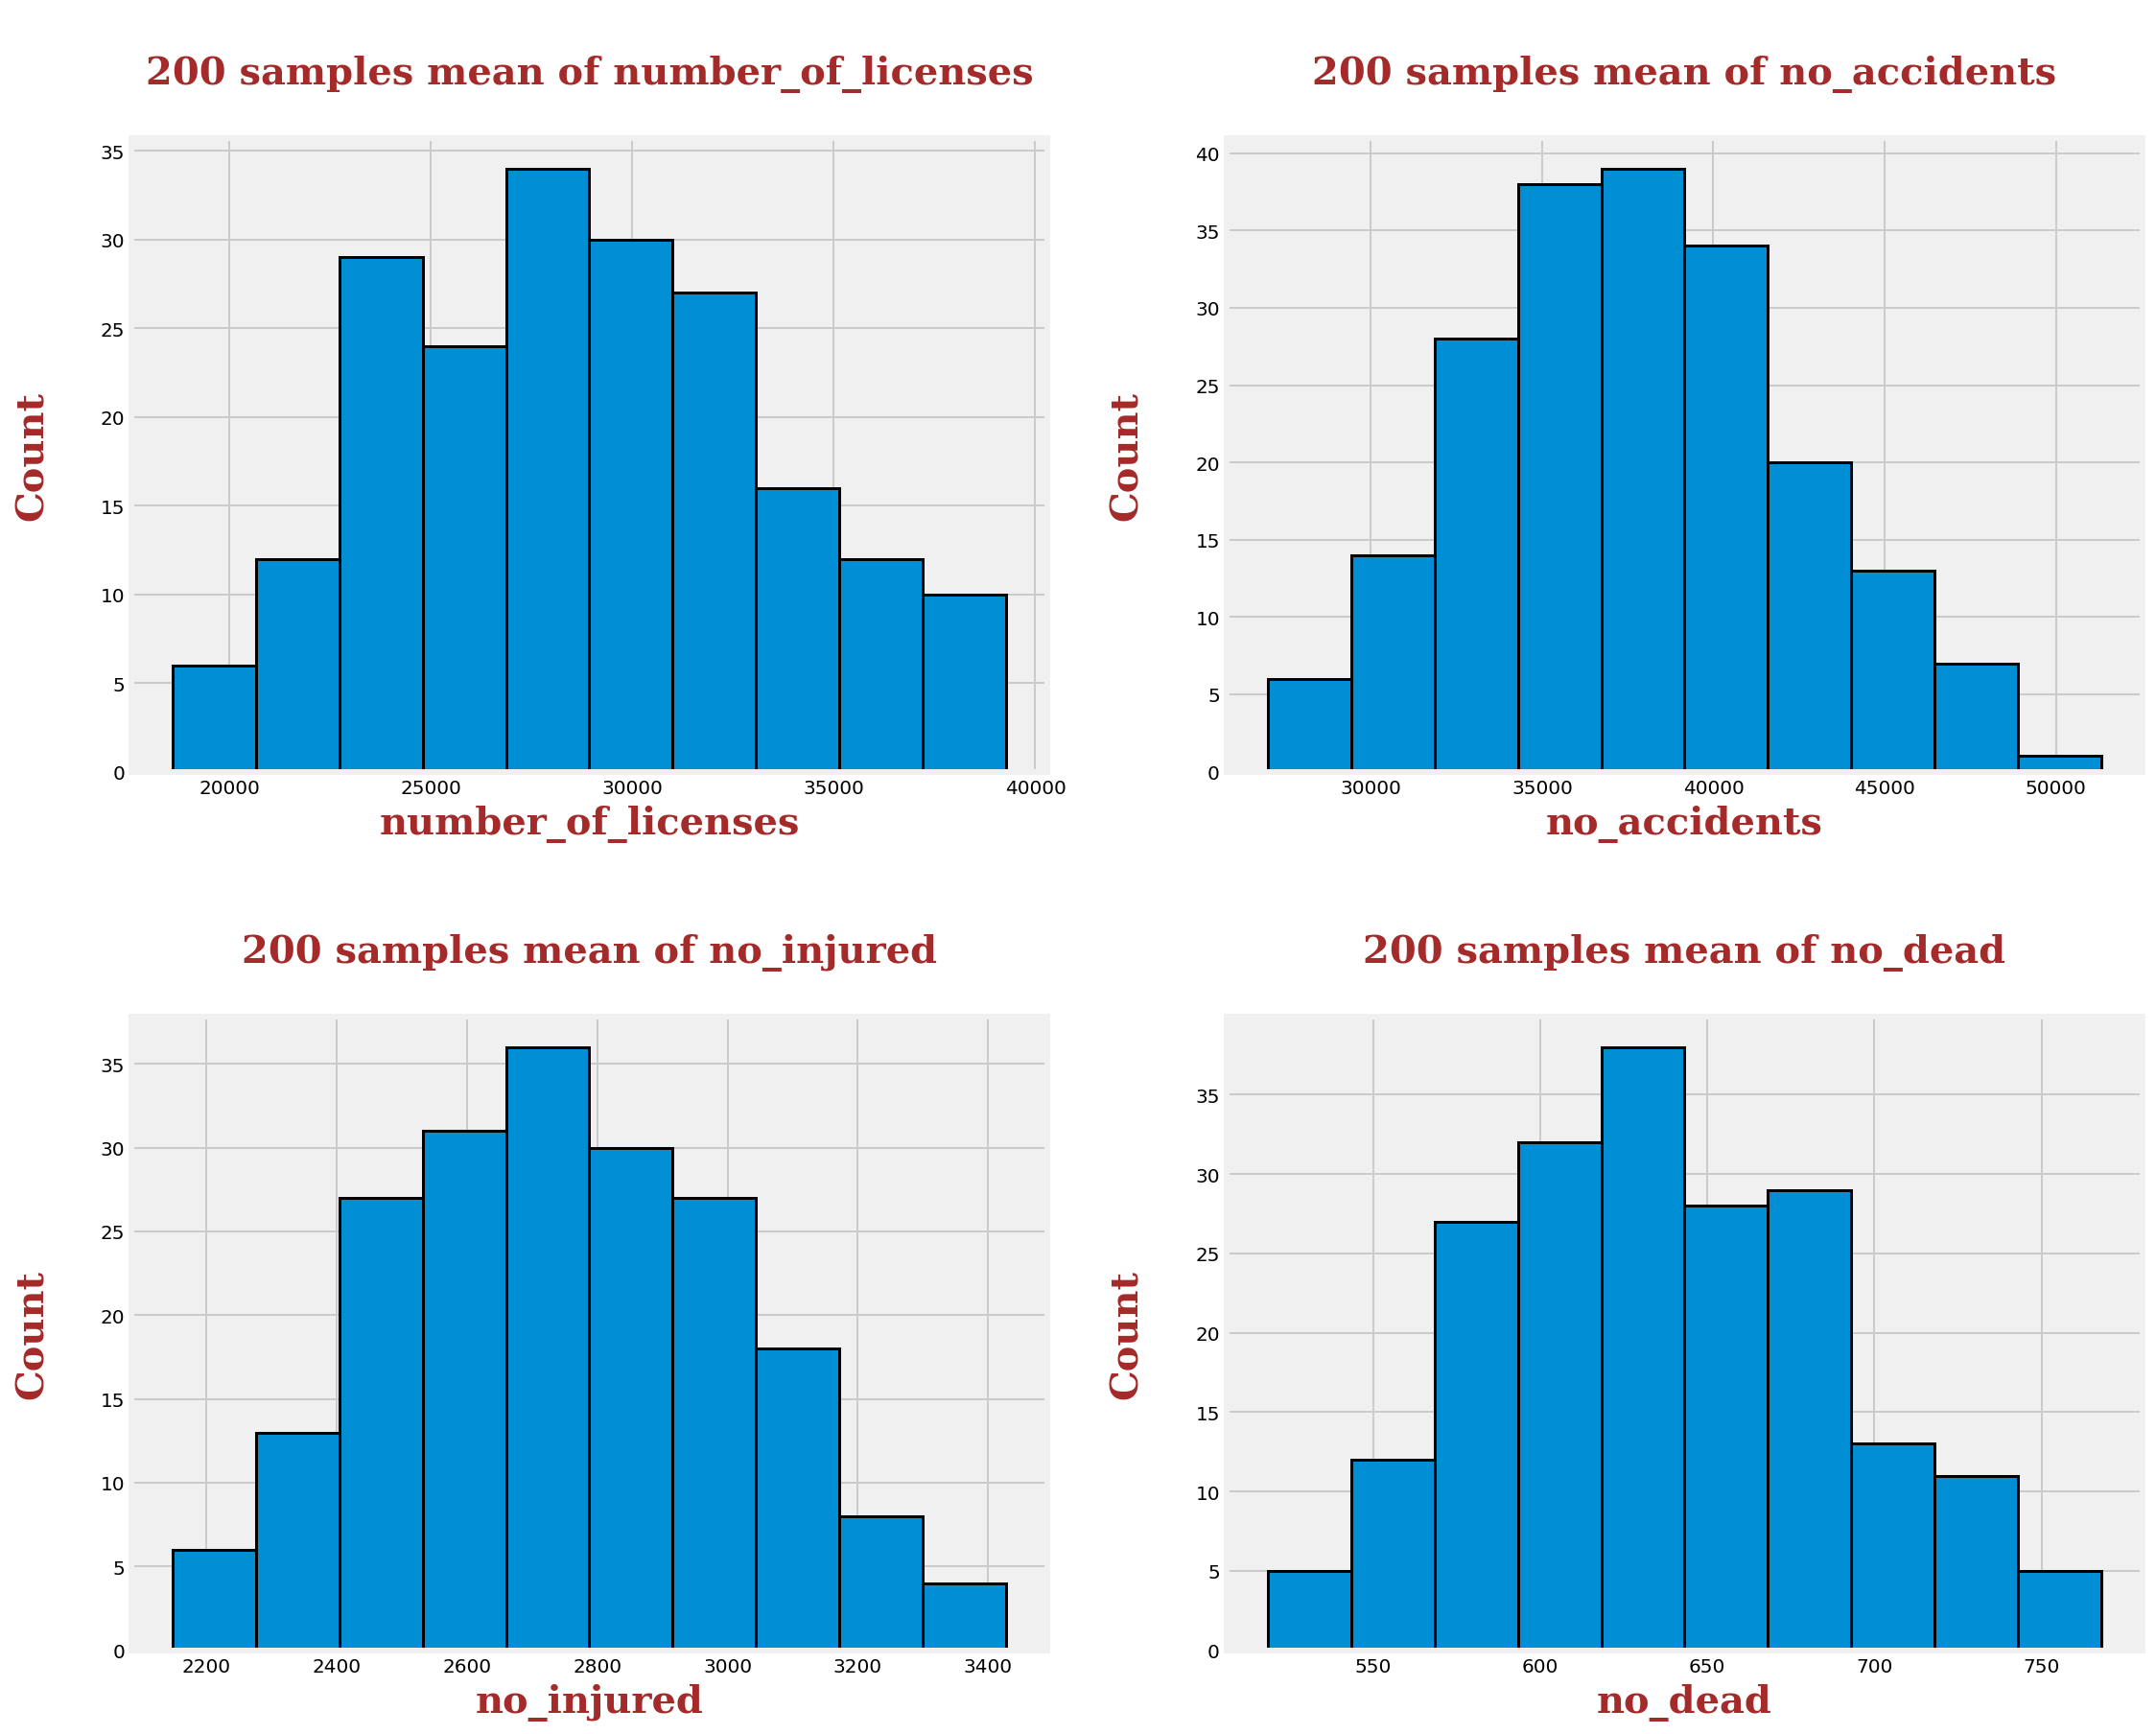

In [101]:
sample_lic = sampler(outer_df.number_of_licenses, 200, 100)    #Call the sampler with 200 samples and 100 size;
sample_acc = sampler(outer_df.no_accidents.dropna(), 200, 100) #Call the sampler with 200 samples and 100 size;
sample_inj = sampler(outer_df.no_injured.dropna(), 200, 100)   #Call the sampler with 200 samples and 100 size;
sample_dead =sampler(outer_df.no_dead.dropna(), 200, 100)      #Call the sampler with 200 samples and 100 size;

fig, ax = plt.subplots(2,2, figsize = (16,13))                 #Create a 2r,2c figures

ax[0][0].hist(x = sample_lic, edgecolor = 'black', linewidth=1.5)               #Plot number_of_licenses samples means;
ax[0][0].set_title("\n200 samples mean of number_of_licenses\n", fontdict=font) #Title;
ax[0][0].set_xlabel('number_of_licenses', fontdict=font)                        #Set xlabel
ax[0][0].set_ylabel('Count\n', fontdict=font)                                   #Set ylabel;

ax[0][1].hist(x = sample_acc, edgecolor = 'black', linewidth=1.5)               #Plot no_accidents samples means;
ax[0][1].set_title("\n200 samples mean of no_accidents\n", fontdict=font)       #Title;
ax[0][1].set_xlabel('no_accidents', fontdict=font)                              #Set xlabel;
ax[0][1].set_ylabel('Count\n', fontdict=font)                                   #Set ylabel;

ax[1][0].hist(x = sample_inj, edgecolor = 'black', linewidth=1.5)               #Plot no_injured samples means; 
ax[1][0].set_title("\n200 samples mean of no_injured\n", fontdict=font)         #Title; 
ax[1][0].set_xlabel('no_injured', fontdict=font)                                #Set xlabel;
ax[1][0].set_ylabel('Count\n', fontdict=font)                                   #Set ylabel;

ax[1][1].hist(x = sample_dead, edgecolor = 'black', linewidth=1.5)              #plot no_dead samples means; 
ax[1][1].set_title("\n200 samples mean of no_dead\n", fontdict=font)            #Title;
ax[1][1].set_xlabel('no_dead', fontdict=font)                                   #Set xlabel 
ax[1][1].set_ylabel('Count\n', fontdict=font)                                   #Set ylabel;

fig.tight_layout(pad=2)

- **Yes we do. I took a 200 sampels of 100 size for each numeric columns and plot it above. And i can see that each plot show a normal distribution. And as i know and researched it's a must when we take `n>30`, even if we don't have a normal distribution skew in the population. The following image discribe the meaning.**<br>

<img src="../assets/images/dist_pop.jpg" width="700">

- **From above picture we can see the sampling distributions shows a normal distribution, when n>30. Also notice that the spread of the sampling distribution decreases as the sample size increase no matter what the population shape is.** 

---

**Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.**

In [102]:
def dist_plot(feature, Sample, Size):
    fig, ax = plt.subplots(figsize = (16,8)) #Create a 2r,2c figures
    
    if feature =='number_of_licenses': #using if here to seperate columns with nans and the one without
        sample_lic = sampler(outer_df[feature], Sample, Size)  #Call the sampler with x samples and 100 size;
    else:
        sample_lic = sampler(outer_df[feature].dropna(), Sample, Size)    #Call the sampler with x samples and 100 size;
        
    ax.hist(x = sample_lic, edgecolor = 'black', linewidth=1.5)           #Plot number_of_licenses samples means;
    ax.set_title(f'\n{Sample} samples mean with {Size} size from {feature}\n', fontdict=font) #Title;
    ax.set_xlabel('\n'+feature ,fontdict=font)                   
    ax.set_ylabel('Frequency\n', fontdict=font);
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

In [103]:
#Creating an interactive widgets, parm: function, widgets.
interact(dist_plot,
          #Create a ToggleButtons for each column;
         feature = widgets.ToggleButtons(options=['number_of_licenses', 'no_accidents', 'no_injured','no_dead'],
                                         description='Column:',
                                         button_style='primary',          #Type of the button;
                                         tooltips=['Select this column']),#Highlighted text on button on hover;
         
         Sample = widgets.IntSlider(min=5, max=1000, step=1),             #Slider from 5 to 1000;
         Size = widgets.IntSlider(min=5, max=1000, step=1), );            #Slider from 5 to 1000;

interactive(children=(ToggleButtons(button_style='primary', description='Column:', options=('number_of_license…

- **Yes, it does.**<br><br>

- **You can change the number of samples and size of samples from the above interactive hist plot and choose the column to plot it and see what will happen and how the data will be spread and how the trend of having samples mean will lead to normal distribution even if the population was not normally distributed.**<br><br>

- **And as long we increase the number of samples and size it will be more Normal distributed.**
<br><br>
- **And by having a normal distribution that's mean the data are spread in a normal way and in a way that makes statistics easier to calculate, read, and print to other people.**
<br><br>
- **For `driving licenses` and `Traffic accidents`, if it was normally distributed the data will be near the mean and that would help a lot in using the data in an easier way because `driving licenses`, `Traffic accidents` contain large numbers and different from other regions and in each year and each data point in most cases it will be far away from other data points.** 
<br><br>
- **So we're dealing with large numbers it would be great if these numbers were distributed normally And it will help in doing some modeling or showing the statistics results and the visualization for it would be more understandable than having a non-normal distribution.**
<br><br>
- **And it will affect our results in predicting and see the pattern of the data to predict and develop some ways or techniques to reduce accidents and understand the relation of having a driving license with accidents.****

---

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [104]:
#NaN

---

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:<br>
**I've got an updated datasets for our datasets `Driving licenses` and `Traffic accidents`. For both years `2018-2019`, I'll do some analysis and cleaning etc.. then i'll present the result and the outcomes at the end.**

In [105]:
#Load updated datasets;
new_drive_df = pd.read_csv('../data/saudi-arabia-driving-licenses-issued 2018-2019.csv', delimiter=';')
new_traffic_df = pd.read_csv('../data/saudi-arabia-traffic-accidents-2018-2019.csv', delimiter=';')

In [106]:
new_drive_df.dtypes #Show the type of updated driving data

Year                           int64
Administritive Area           object
Number of Driving Licenses     int64
geo_shape                     object
geo_point_2d                  object
dtype: object

In [107]:
 new_traffic_df.dtypes #Show the type of updated traffic data

Year             int64
Region          object
Indicator       object
Value            int64
geo_shape       object
geo_point_2d    object
dtype: object

**Everythin is okay here, for data types becuase all what i need is `Year, Area, Number of Driving Licenses, Indicator, Value`.**

In [108]:
new_drive_df.isna().sum() #Show the Nans of updated driving data

Year                           0
Administritive Area            0
Number of Driving Licenses     0
geo_shape                     27
geo_point_2d                  27
dtype: int64

In [109]:
new_traffic_df.isna().sum() #Show the Nans of updated traffic data

Year             0
Region           0
Indicator        0
Value            0
geo_shape       12
geo_point_2d    12
dtype: int64

**Good our columns are without NaNs, next i'll drop the geo shape and 2d points because i don't need it**

In [110]:
new_drive_df.drop(['geo_point_2d', 'geo_shape'], axis=1, inplace=True) #drop the x,y points from updated driving data
new_drive_df.head()

,Year,Administritive Area,Number of Driving Licenses
0,2018,Riyadh,493224
1,2007,Riyadh,36261
2,2014,Makkah,149234
3,2017,Makkah,142487
4,2012,Makkah,143954


In [111]:
new_traffic_df.drop(['geo_point_2d', 'geo_shape'], axis=1, inplace=True) #drop the x,y points from updated traffic data
new_traffic_df.head()

,Year,Region,Indicator,Value
0,2016,Riyadh,No. of Casualties - Dead,1430
1,2016,Eastern Region,No. of Casualties - Dead,1113
2,2016,Eastern Region,No. of Casualties - Injured,4893
3,2016,Hail,No. of Casualties - Dead,299
4,2016,Jazan,No. of Casualties - Dead,514


**Next, i'll change the names of the columns, to the same names for our dataset.**

In [112]:
drive_lic.columns #show columns for old dataset

Index(['year', 'region', 'number_of_licenses', 'region_x', 'region_y'], dtype='object')

In [113]:
new_drive_cols = {'Year':'year',
                  'Administritive Area':'region',
                  'Number of Driving Licenses':'number_of_licenses'}#dict of new names

new_drive_df.rename(columns=new_drive_cols, inplace=True)#Change the names of columns for updated driving dataset

new_drive_df.head()

,year,region,number_of_licenses
0,2018,Riyadh,493224
1,2007,Riyadh,36261
2,2014,Makkah,149234
3,2017,Makkah,142487
4,2012,Makkah,143954


**Before changing the names of the traffic accidents, i'll convert it to WIDE format.**

In [114]:
#From long to wide;
new_traffic_df = new_traffic_df.pivot_table(index=['Year','Region'],
                                                columns='Indicator',
                                                values='Value').reset_index()
                                                    
new_traffic_df.columns.name=None 
new_traffic_df.head() #After converting;

,Year,Region,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,2016,Al-Baha,3618,185,1227
1,2016,Al-Jouf,10212,245,920
2,2016,Asir,32684,983,2541
3,2016,Eastern Region,101619,1113,4893
4,2016,Hail,10199,299,932


**Now let's change the names for it.**

In [115]:
new_traffic_df.columns

Index(['Year', 'Region', 'No. of Accidents', 'No. of Casualties - Dead',
       'No. of Casualties - Injured'],
      dtype='object')

In [116]:
new_traffic_cols = {'Year':'year',
                    'Region':'region',
                    'Number of Driving Licenses':'number_of_licenses',
                    'No. of Accidents':'no_accidents' ,
                    'No. of Casualties - Dead':'no_dead',
                    'No. of Casualties - Injured':'no_injured'}#Change the names of columns for updated driving dataset

new_traffic_df.rename(columns=new_traffic_cols, inplace=True)
new_traffic_df.head()

,year,region,no_accidents,no_dead,no_injured
0,2016,Al-Baha,3618,185,1227
1,2016,Al-Jouf,10212,245,920
2,2016,Asir,32684,983,2541
3,2016,Eastern Region,101619,1113,4893
4,2016,Hail,10199,299,932


**Next i'll check the values of the areas and fix them then make it same as old dataset.**

In [117]:
'old', drive_lic.region.unique(),'new', new_drive_df['region'].unique() #show the regions from old and new driving dataset;

('old',
 array(['Makkah', 'Madinah', 'Qassim', 'Eastern_Region', 'Asir', 'Tabuk',
        'Hail', 'Northern_Border', 'Jazan', 'Najran', 'Al_Baha', 'Al_Jouf',
        'Riyadh'], dtype=object),
 'new',
 array(['Riyadh', 'Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir',
        'Tabouk', 'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
        'Al-Jouf', 'Total'], dtype=object))

**We have regions need to be renamed:<br> `'Al-Qaseem':'Qassim'`, `'Eastern':'Eastern_Region'`, `'Assir':'Asir'`, <br>`'Tabouk':'Tabuk'`,`'Northern Boarder':'Northern_Border'`, `'Al-Baha':'Al_Baha'`,`'Al-Jouf':'Al_Jouf'`.**
                    

In [118]:
#Print the Unique values on datasets for Administritive Area;
print('Old values:\n',new_drive_df['region'].unique())

#Dictonary for all regions with new and old names,;
new_driving_names = {'Makkah': 'Makkah', 
                        'Eastern': 'Eastern_Region',
                        'Tabouk': 'Tabuk',
                        'Hail': 'Hail',
                        'Northern Boarder':'Northern_Border',
                        'Jazan': 'Jazan',
                        'Al-Jouf': 'Al_Jouf', 
                        'Total': 'Total',
                        'Al-Baha': 'Al_Baha',
                        'Riyadh':'Riyadh',
                        'Madinah': 'Madinah',
                        'Al-Qaseem': 'Qassim',
                        'Najran': 'Najran',
                        'Assir': 'Asir'}   

new_drive_df['region'] = new_drive_df['region'].map(new_driving_names) #Mapping each item to new value;

print('\nNewvalues:\n',new_drive_df['region'].unique())

Old values:
 ['Riyadh' 'Makkah' 'Madinah' 'Al-Qaseem' 'Eastern' 'Assir' 'Tabouk' 'Hail'
 'Northern Boarder' 'Jazan' 'Najran' 'Al-Baha' 'Al-Jouf' 'Total']

Newvalues:
 ['Riyadh' 'Makkah' 'Madinah' 'Qassim' 'Eastern_Region' 'Asir' 'Tabuk'
 'Hail' 'Northern_Border' 'Jazan' 'Najran' 'Al_Baha' 'Al_Jouf' 'Total']


In [119]:
'old', traffic_acc_wide.region.unique(),'new', new_traffic_df['region'].unique()

('old',
 array(['Al_Baha', 'Al_Jouf', 'Asir', 'Eastern_Region', 'Hail', 'Jazan',
        'Madinah', 'Makkah', 'Najran', 'Northern_Border', 'Qassim',
        'Riyadh', 'Tabuk'], dtype=object),
 'new',
 array(['Al-Baha', 'Al-Jouf', 'Asir', 'Eastern Region', 'Hail', 'Jazan',
        'Madinah', 'Makkah', 'Najran', 'Northern Borders', 'Qassim',
        'Riyadh', 'Tabouk', 'Total'], dtype=object))

In [120]:
#Print the Unique values on datasets for Administritive Area;
print('Old values:\n',new_traffic_df['region'].unique())

#Dictonary for all regions with new and old names,;
new_traffic_names = {'Makkah': 'Makkah', 
                     'Eastern Region': 'Eastern_Region',
                     'Tabouk': 'Tabuk',
                     'Hail': 'Hail',
                     'Northern Borders':'Northern_Border',
                     'Jazan': 'Jazan',
                     'Al-Jouf': 'Al_Jouf', 
                     'Total': 'Total',
                     'Al-Baha': 'Al_Baha',
                     'Riyadh':'Riyadh',
                     'Madinah': 'Madinah',
                     'Qassim': 'Qassim',
                     'Najran': 'Najran',
                     'Asir': 'Asir'}   

new_traffic_df['region'] = new_traffic_df['region'].map(new_traffic_names) #Mapping each item to new value;

print('\nNewvalues:\n',new_traffic_df['region'].unique())

Old values:
 ['Al-Baha' 'Al-Jouf' 'Asir' 'Eastern Region' 'Hail' 'Jazan' 'Madinah'
 'Makkah' 'Najran' 'Northern Borders' 'Qassim' 'Riyadh' 'Tabouk' 'Total']

Newvalues:
 ['Al_Baha' 'Al_Jouf' 'Asir' 'Eastern_Region' 'Hail' 'Jazan' 'Madinah'
 'Makkah' 'Najran' 'Northern_Border' 'Qassim' 'Riyadh' 'Tabuk' 'Total']


**We're good to go, But let's drop the 'total' rows fro our dataset.**

In [121]:
new_drive_df[new_drive_df.region == 'Total'].count()

year                  27
region                27
number_of_licenses    27
dtype: int64

In [122]:
new_driving_indx = new_drive_df.index[new_drive_df.region == 'Total'].tolist() #Get the index for 'Total' rows;
                                                                   #Used tolist to convert the output to list;
new_drive_df.drop(new_driving_indx, inplace=True)                  #drop row by index using list total_indx;

new_drive_df[new_drive_df.region == 'Total'].count()               #Show number of rows affected by "Total" after drop;

year                  0
region                0
number_of_licenses    0
dtype: int64

In [123]:
new_traffic_df[new_traffic_df.region == 'Total'].count()

year            4
region          4
no_accidents    4
no_dead         4
no_injured      4
dtype: int64

In [124]:
new_driving_indx = new_traffic_df.index[new_traffic_df.region == 'Total'].tolist() #Get the index for 'Total' rows;
                                                                   #Used tolist to convert the output to list;
new_traffic_df.drop(new_driving_indx, inplace=True)                #drop row by index using list total_indx;

new_traffic_df[new_traffic_df.region == 'Total'].count()           #Show number of rows affected by "Total" after drop;

year            0
region          0
no_accidents    0
no_dead         0
no_injured      0
dtype: int64

**Now let's merge the two datasets so we can get a ssingle one to work with.**

In [125]:
new_outer_df = pd.merge(new_drive_df, new_traffic_df,  #Merge the two datasetts
                      left_on=['region', 'year'],
                      right_on=['region', 'year'],
                      how='outer')
new_outer_df.head()

,year,region,number_of_licenses,no_accidents,no_dead,no_injured
0,2018,Riyadh,493224,79884.0,1091.0,4554.0
1,2007,Riyadh,36261,NaN,NaN,NaN
2,2014,Makkah,149234,NaN,NaN,NaN
3,2017,Makkah,142487,145541.0,1641.0,10623.0
4,2012,Makkah,143954,NaN,NaN,NaN


**Let's get the data only for 2018-2019.**

In [126]:
new_outer_df = new_outer_df[new_outer_df.year >= 2018].reset_index(drop=True) #Get the data for 2018-2019 only
new_outer_df.head()

,year,region,number_of_licenses,no_accidents,no_dead,no_injured
0,2018,Riyadh,493224,79884.0,1091.0,4554.0
1,2018,Qassim,4457,17510.0,225.0,1269.0
2,2019,Tabuk,5977,7089.0,228.0,932.0
3,2018,Hail,39575,6955.0,193.0,912.0
4,2018,Northern_Border,3661,10705.0,75.0,428.0


**Let's check the `.dtypes()` for it**

In [127]:
new_outer_df.info() #show the info of new dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                26 non-null     int64  
 1   region              26 non-null     object 
 2   number_of_licenses  26 non-null     int64  
 3   no_accidents        26 non-null     float64
 4   no_dead             26 non-null     float64
 5   no_injured          26 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.3+ KB


**We will fix the type for last three columns from `float` to `int`**

In [128]:
new_outer_df = new_outer_df.astype({'no_accidents': int, 'no_dead': int, 'no_injured': int}) #Convert to int

In [129]:
new_outer_df.info() #show the info of new dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                26 non-null     int64 
 1   region              26 non-null     object
 2   number_of_licenses  26 non-null     int64 
 3   no_accidents        26 non-null     int32 
 4   no_dead             26 non-null     int32 
 5   no_injured          26 non-null     int32 
dtypes: int32(3), int64(2), object(1)
memory usage: 1.0+ KB


- **Data dictionary:**

|Feature|Type|Description|
|:--|:-:|:---|
|**year**|*int64*|An indicator for the year per region.|
|**region**|*object*|Name for the regions.|
|**number_of_licenses**|*int64*|Total Number of driver licenses for each area.|
|**no_accidents**|*int32*|Total Number of accident for each area.|
|**no_dead**|*int32*|Total Number of deads for each area.|
|**no_injured**|*int32*|Total Number of injured for each area.|



---

**Now let's do some exploration, ploting and comparisons to understand our new data.**

**Let's start by doint `.describe()` to get a brief statistics about our data.**

In [130]:
new_outer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,26.0,2018.500000,0.509902,2018.0,2018.00,2018.5,2019.00,2019.0
number_of_licenses,26.0,74092.807692,160395.878869,2575.0,6191.25,12039.0,36340.25,687673.0
no_accidents,26.0,24624.807692,28124.004499,1474.0,6988.50,17186.0,24428.75,103973.0
no_dead,26.0,453.038462,369.749805,75.0,163.50,288.5,646.50,1301.0
no_injured,26.0,2427.961538,2758.925117,413.0,867.75,1232.5,2893.25,11401.0


In [131]:
print('Data for 2018-2019')
new_outer_df.groupby('region')[['number_of_licenses']].max().sort_values(by=['number_of_licenses'],ascending=False).head()

Data for 2018-2019


,number_of_licenses
region,
Riyadh,687673
Makkah,144873
Eastern_Region,131639
Hail,39575
Asir,26636


In [132]:
print('Data for 1993-2017')
outer_df.groupby('region')[['number_of_licenses']].max().sort_values(by=['number_of_licenses'],ascending=False).head()

Data for 1993-2017


,number_of_licenses
region,
Riyadh,495307
Makkah,157389
Eastern_Region,151087
Qassim,73618
Hail,54507


- **I think it already known that Riyadh will be at the top becuase of how big it's and it's the capital of Saudi Arabia. And we still have the same order for top number of licenses even from 2018-2019.**
- **And we have an increase in number of licenses in `Riyadh` by `38.8%`, and this is huge jump by this percent. For Makkah and Eastern_Region both decreased by `7.95%` for `Makkah` and `12.87%` for `Eastern_Region`. This is maybe due to by 2019 the driving schools for women are now avilabe in most of Saudi Arabia cities, we will foucs on the top three regions on our reserach specifically.**

---

In [133]:
print('Data for 2018-2019') #Print the highest numebr of accidents in 2018-2019
new_outer_df.groupby('region')[['no_accidents']].max().sort_values(by=['no_accidents'],ascending=False).head()

Data for 2018-2019


,no_accidents
region,
Makkah,103973
Riyadh,79884
Eastern_Region,45077
Asir,25964
Madinah,21689


In [134]:
print('Data for 1993-2017') #Print the highest numebr of accidents in 1993-2017
outer_df.groupby('region')[['no_accidents']].max().sort_values(by=['no_accidents'],ascending=False).head()

Data for 1993-2017


,no_accidents
region,
Makkah,145541.0
Riyadh,141736.0
Eastern_Region,101619.0
Asir,32684.0
Jazan,25873.0


**We can see a good decrease in the number of accidents, for all top regions by a good percent, `28.56%`, `43.63%`, `55.64%`, for `Makkah`, `Riyadh`, and `Eastern_Region`. specialy `Riyadh` and `Eastern_Region` they did a great job in accidents, this is maybe due to women start driving or `ساهر` by this year has been covered in all of `Saudi Arabia`, but I think it's because of both reasons when women start driving some men stopped driving like the used to do before (all day for everything), and this is maybe what leads us to low accidents because we haven't seen a crazy woman drifting in the cities. And also placing the new rules in driving may also a reason due to this decrease along with the traffic light monitoring system.**

---

In [135]:
print('Data for 2018-2019') #Print the highest numebr of deads in 2018-2019
new_outer_df.groupby('region')[['no_dead']].max().sort_values(by=['no_dead'],ascending=False).head()

Data for 2018-2019


,no_dead
region,
Makkah,1301
Riyadh,1091
Asir,696
Eastern_Region,688
Jazan,563


In [136]:
print('Data for 1993-2017') #Print the highest numebr of deads in 1993-2017
outer_df.groupby('region')[['no_dead']].max().sort_values(by=['no_dead'],ascending=False).head()

Data for 1993-2017


,no_dead
region,
Makkah,2243.0
Riyadh,1430.0
Eastern_Region,1113.0
Asir,983.0
Madinah,822.0


**`Makkah` went down to 1301 from 2243, and this is great. So on for `Riyadh` and `Eastern_Region` that went down by far number**

---

In [137]:
print('Data for 2018-2019') #Print the highest numebr of injured in 2018-2019
new_outer_df.groupby('region')[['no_injured']].max().sort_values(by=['no_injured'],ascending=False).head()

Data for 2018-2019


,no_injured
region,
Makkah,11401
Riyadh,5412
Madinah,3526
Eastern_Region,3021
Asir,2192


In [138]:
print('Data for 1993-2017') #Print the highest numebr of accidents in 1993-2017
outer_df.groupby('region')[['no_injured']].max().sort_values(by=['no_injured'],ascending=False).head()

Data for 1993-2017


,no_injured
region,
Makkah,12383.0
Eastern_Region,4893.0
Riyadh,4540.0
Madinah,4184.0
Asir,2541.0


**The same here for All three regions but Riyadh got an increasing in the Injured numbers from accidents. Makkah doing well but no that good but still decreasing which is may lead to lower numbers in the next year.**

---

**Let's plot the boxplot to see the outliers for each column.**

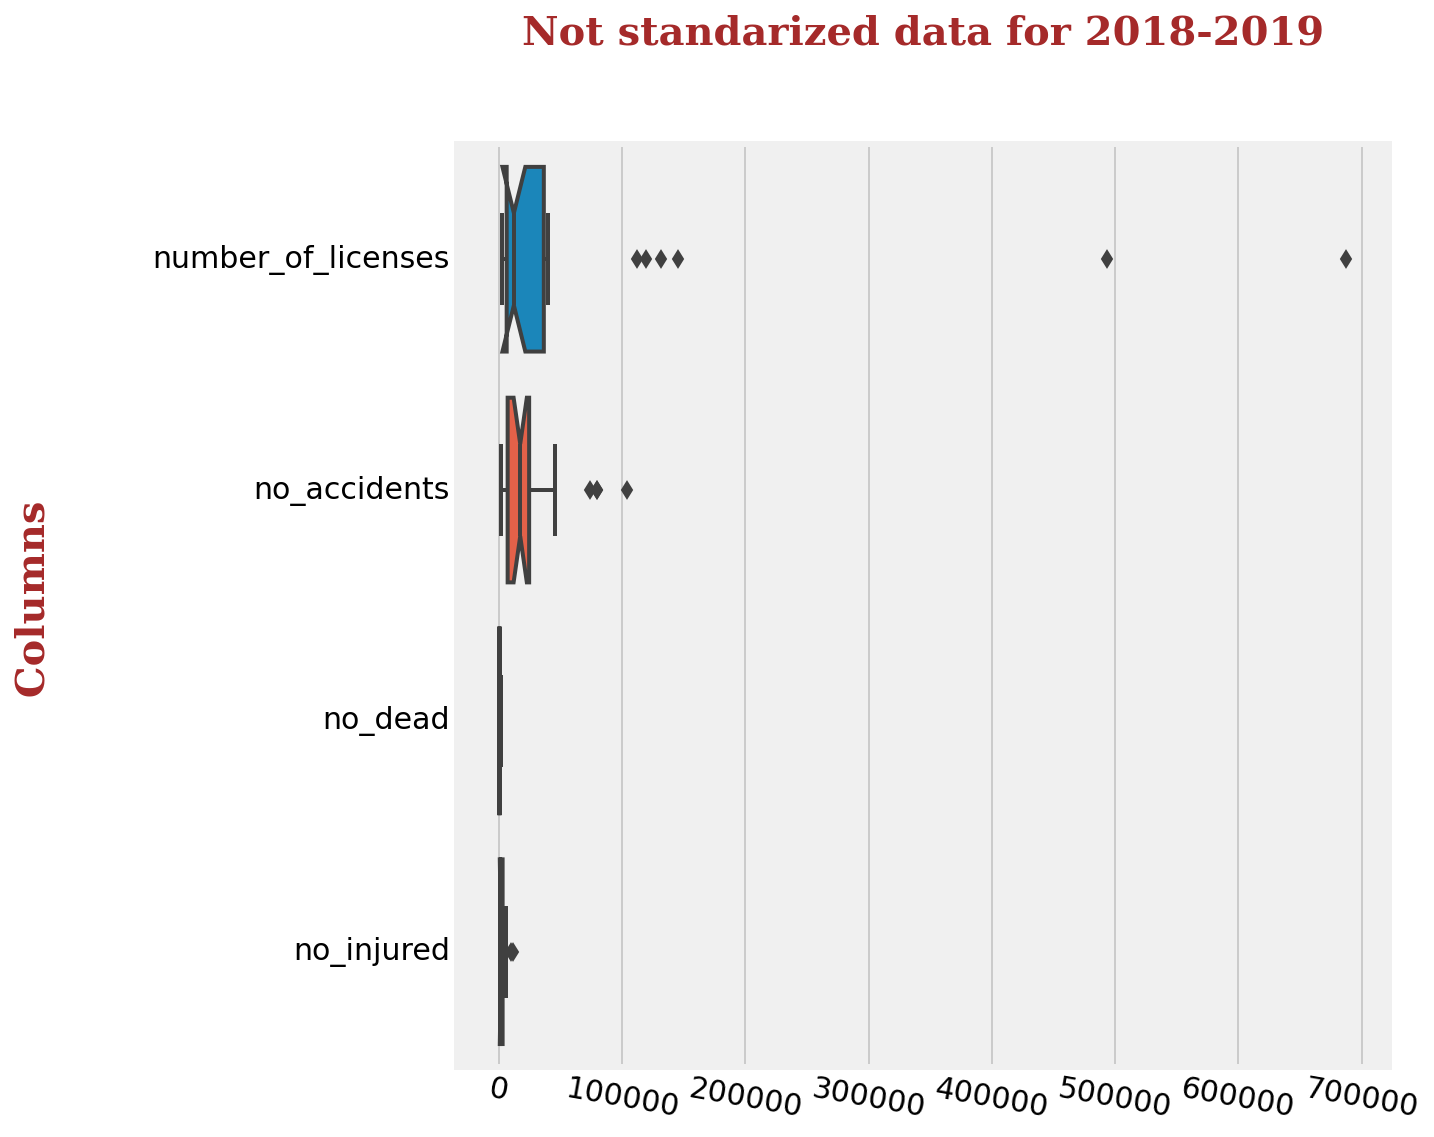

In [139]:
subplot_boxplot(new_outer_df.drop('year', axis=1), 'Not standarized data for 2018-2019', ' Columns')

**Number of licenses are affecting other columns and the scale of it, we will do a standarization for all of the columns and see the outliers.**

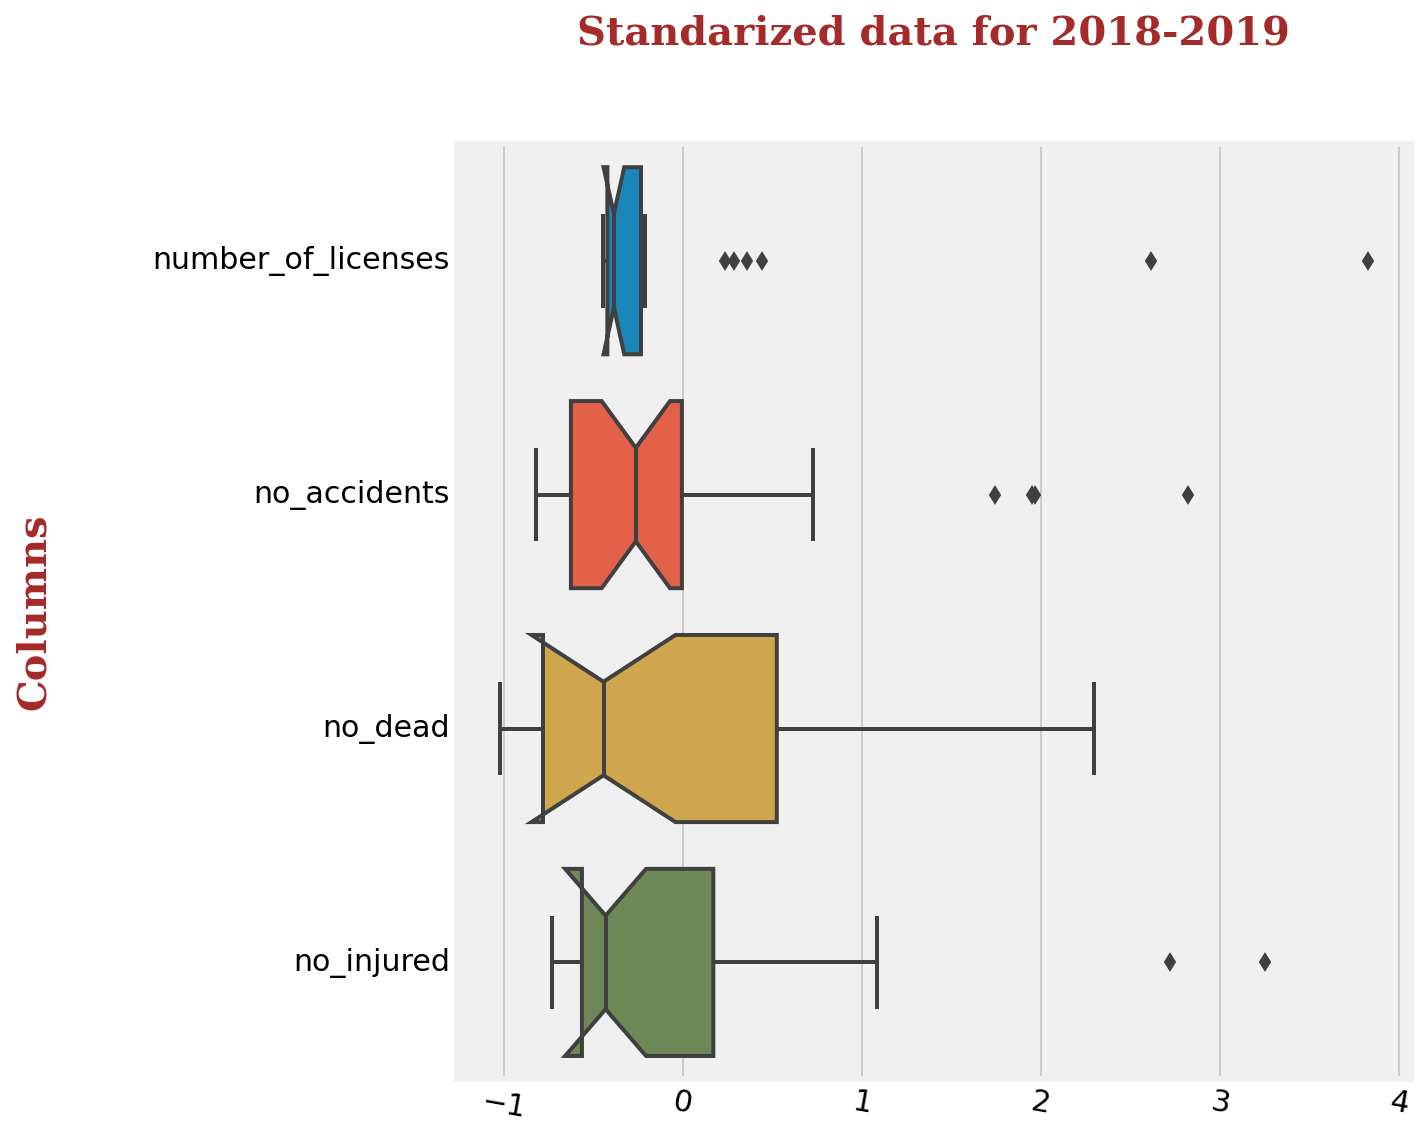

In [140]:
#Select the data
data = stand_data(new_outer_df.drop(['year', 'region'], axis=1))

#Plot using ploting functoin
subplot_boxplot(data, 'Standarized data for 2018-2019', 'Columns') 

**Now it's easy to read and see the plot and outliers, we don't have a lot of outliers, And we can see the notch that represent the mean of each column.**

---

**Let's see how each column is distributed for 2018-2019.**

**1) number_of_licenses**

[number_of_licenses], Skew = 3.1525089820134453 ==> Positive Skewed


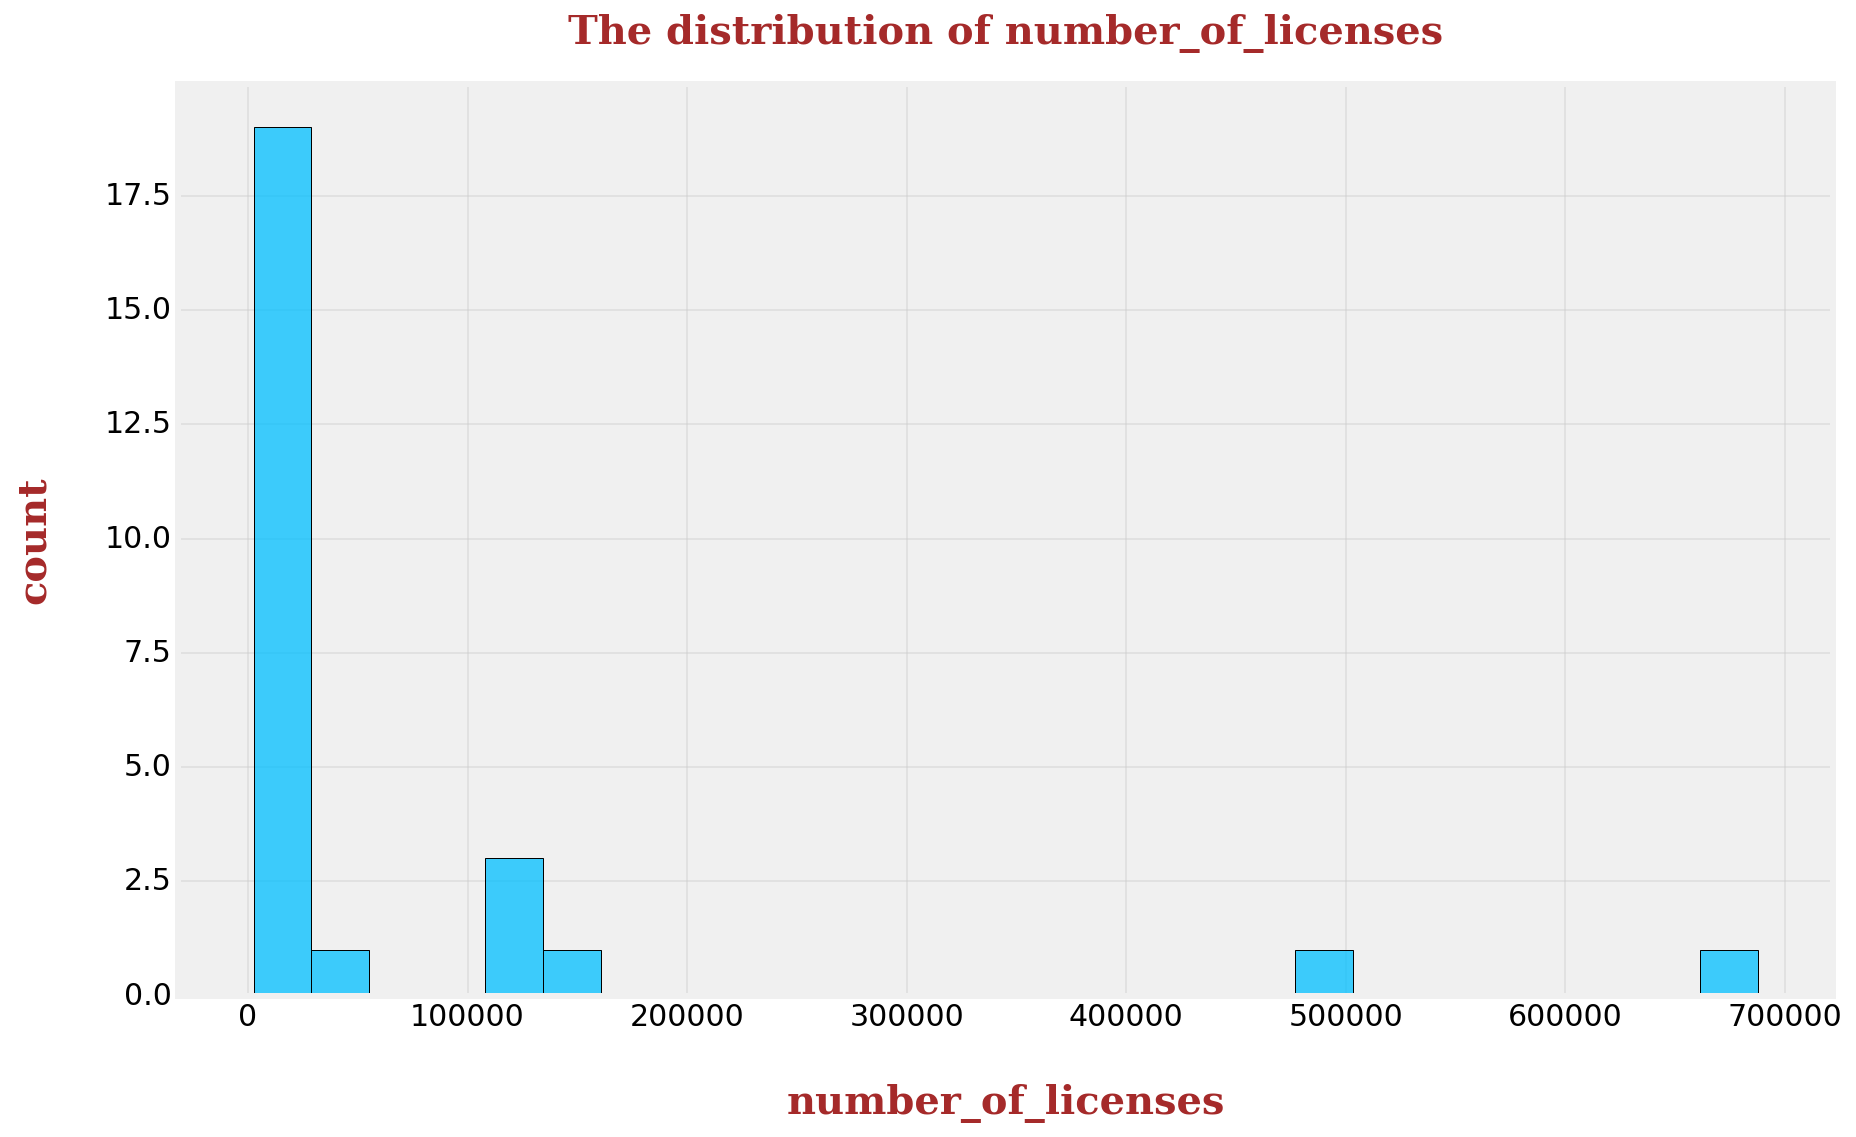

In [141]:
get_shape(new_outer_df, 'number_of_licenses')

- **We can see from the Skew value of `number_of_licenses` is skewed by `3.15` to the right (Positive). But the hist won't show it probably**

**2) no_accidents**

[no_accidents], Skew = 1.6977903071482945 ==> Positive Skewed


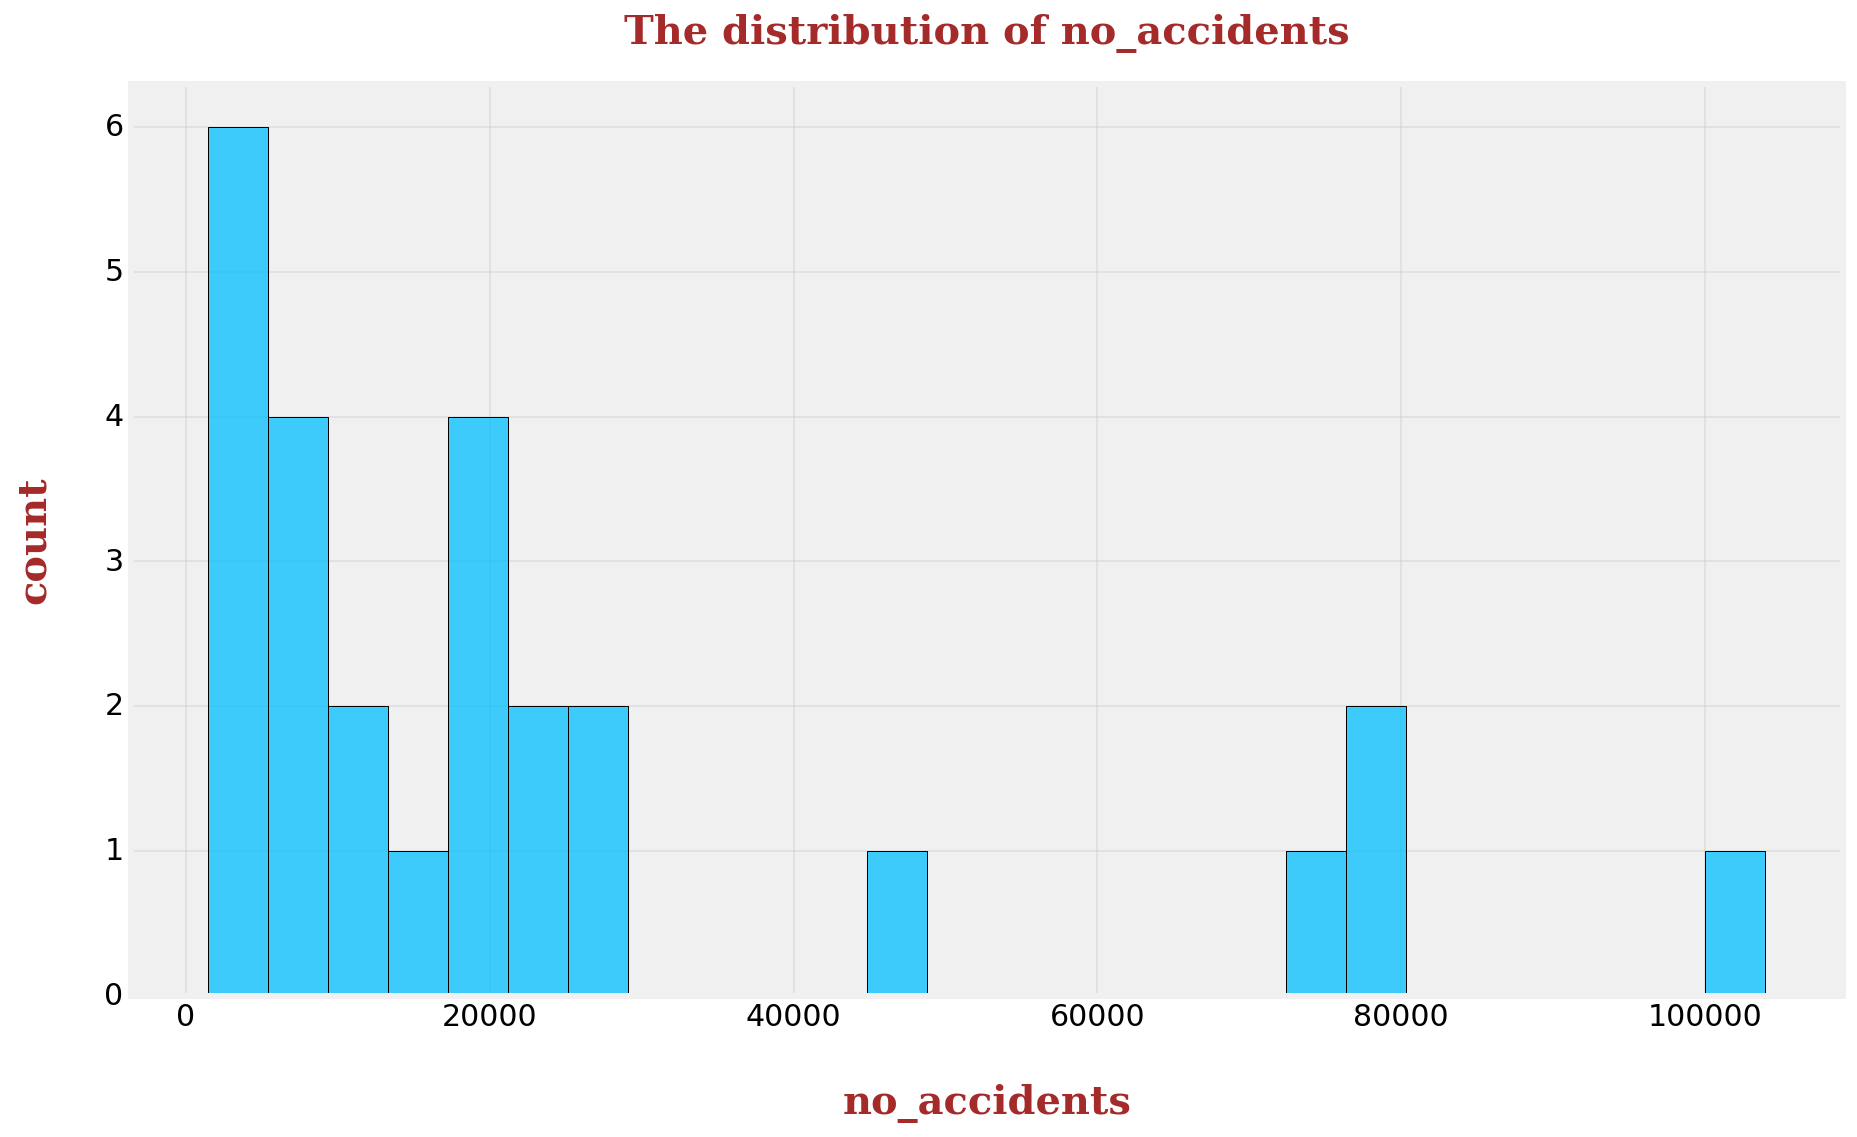

In [142]:
get_shape(new_outer_df, 'no_accidents')

- **We can see from the Skew value the `no_accidents` is skewed by `1.69` to the right (Positive). But for the plot it seems not clear so much that's why Skew values sometimes help.**

**3) no_dead**

[no_dead], Skew = 1.1019139623601013 ==> Positive Skewed


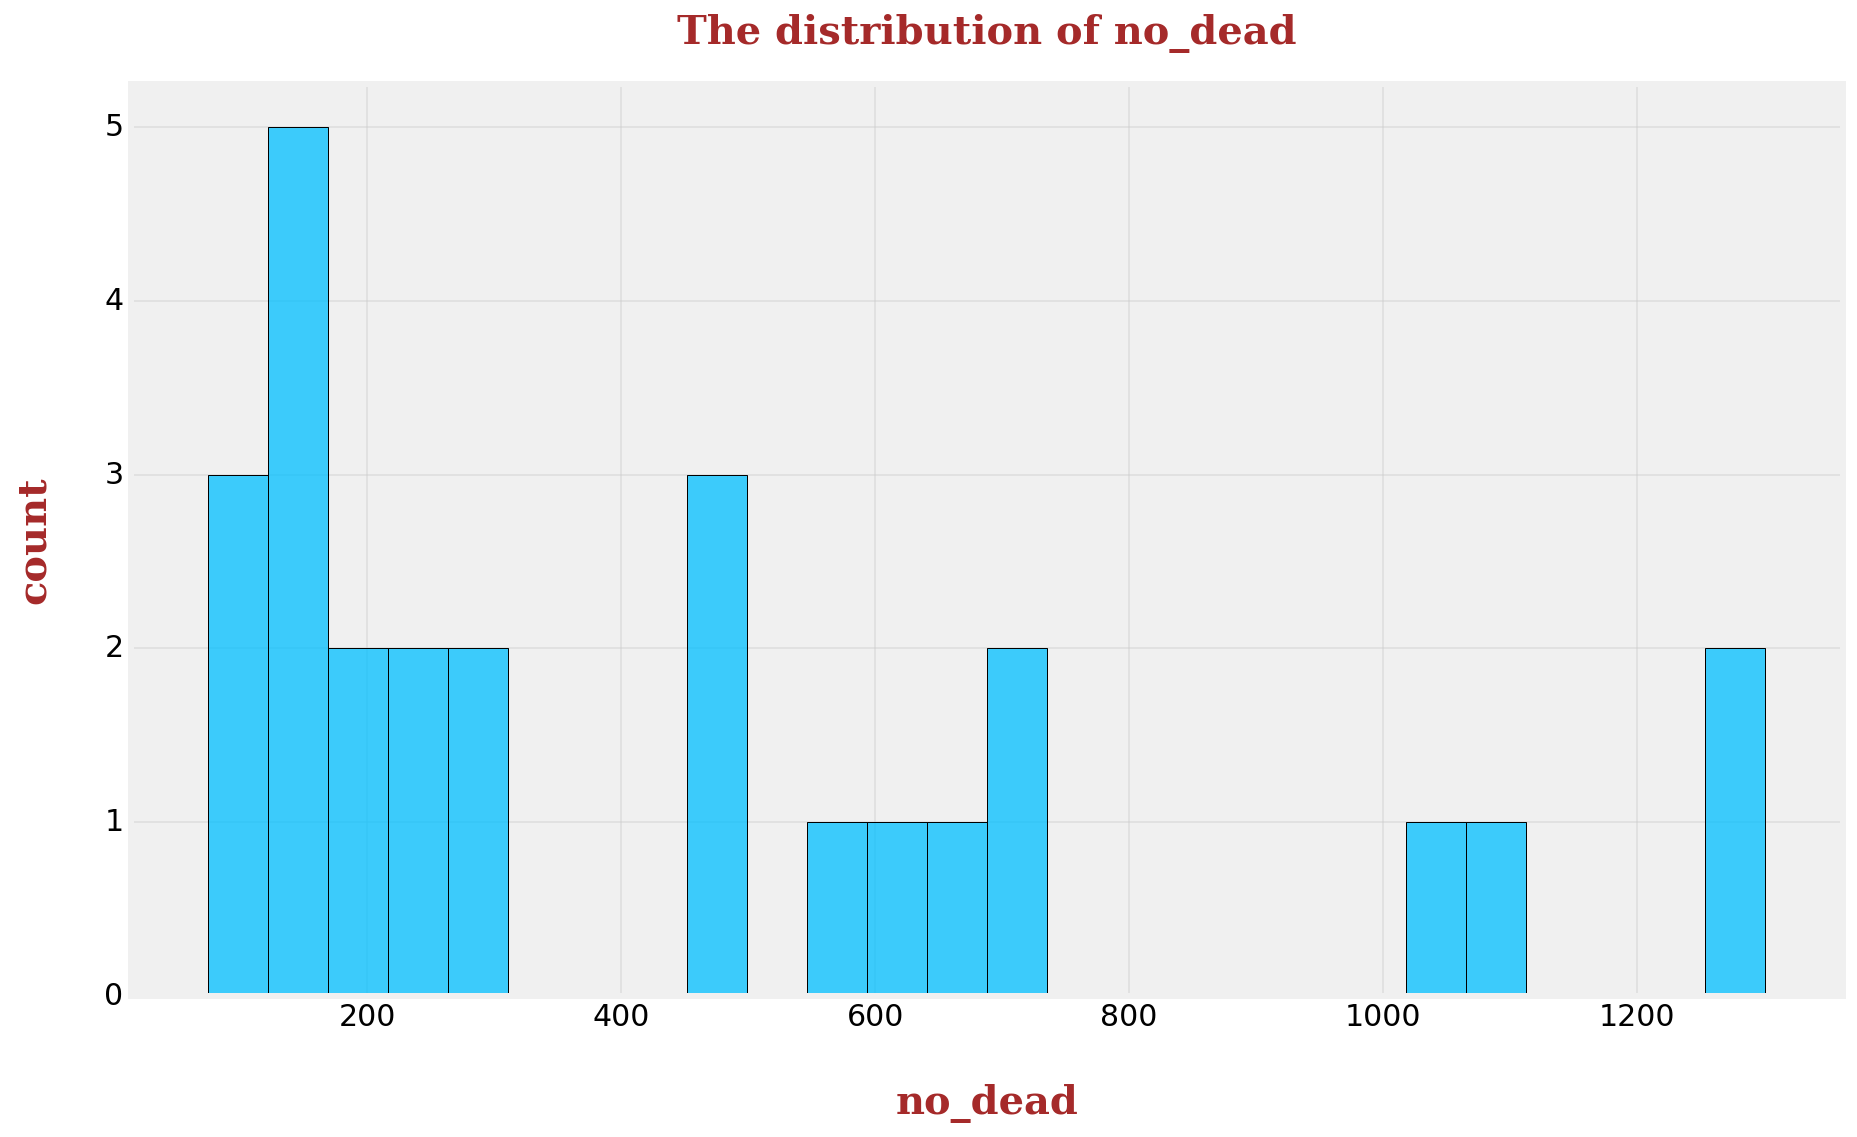

In [143]:
get_shape(new_outer_df, 'no_dead')

- **We can see from the Skew value the `no_dead` is skewed by `1.10` to the right (Positive). But for the plot it's still the same we can't be clear that it's Postive Skew but the Skew vlaue admit it.**

**4) no_injured**

[no_injured], Skew = 2.308300303810136 ==> Positive Skewed


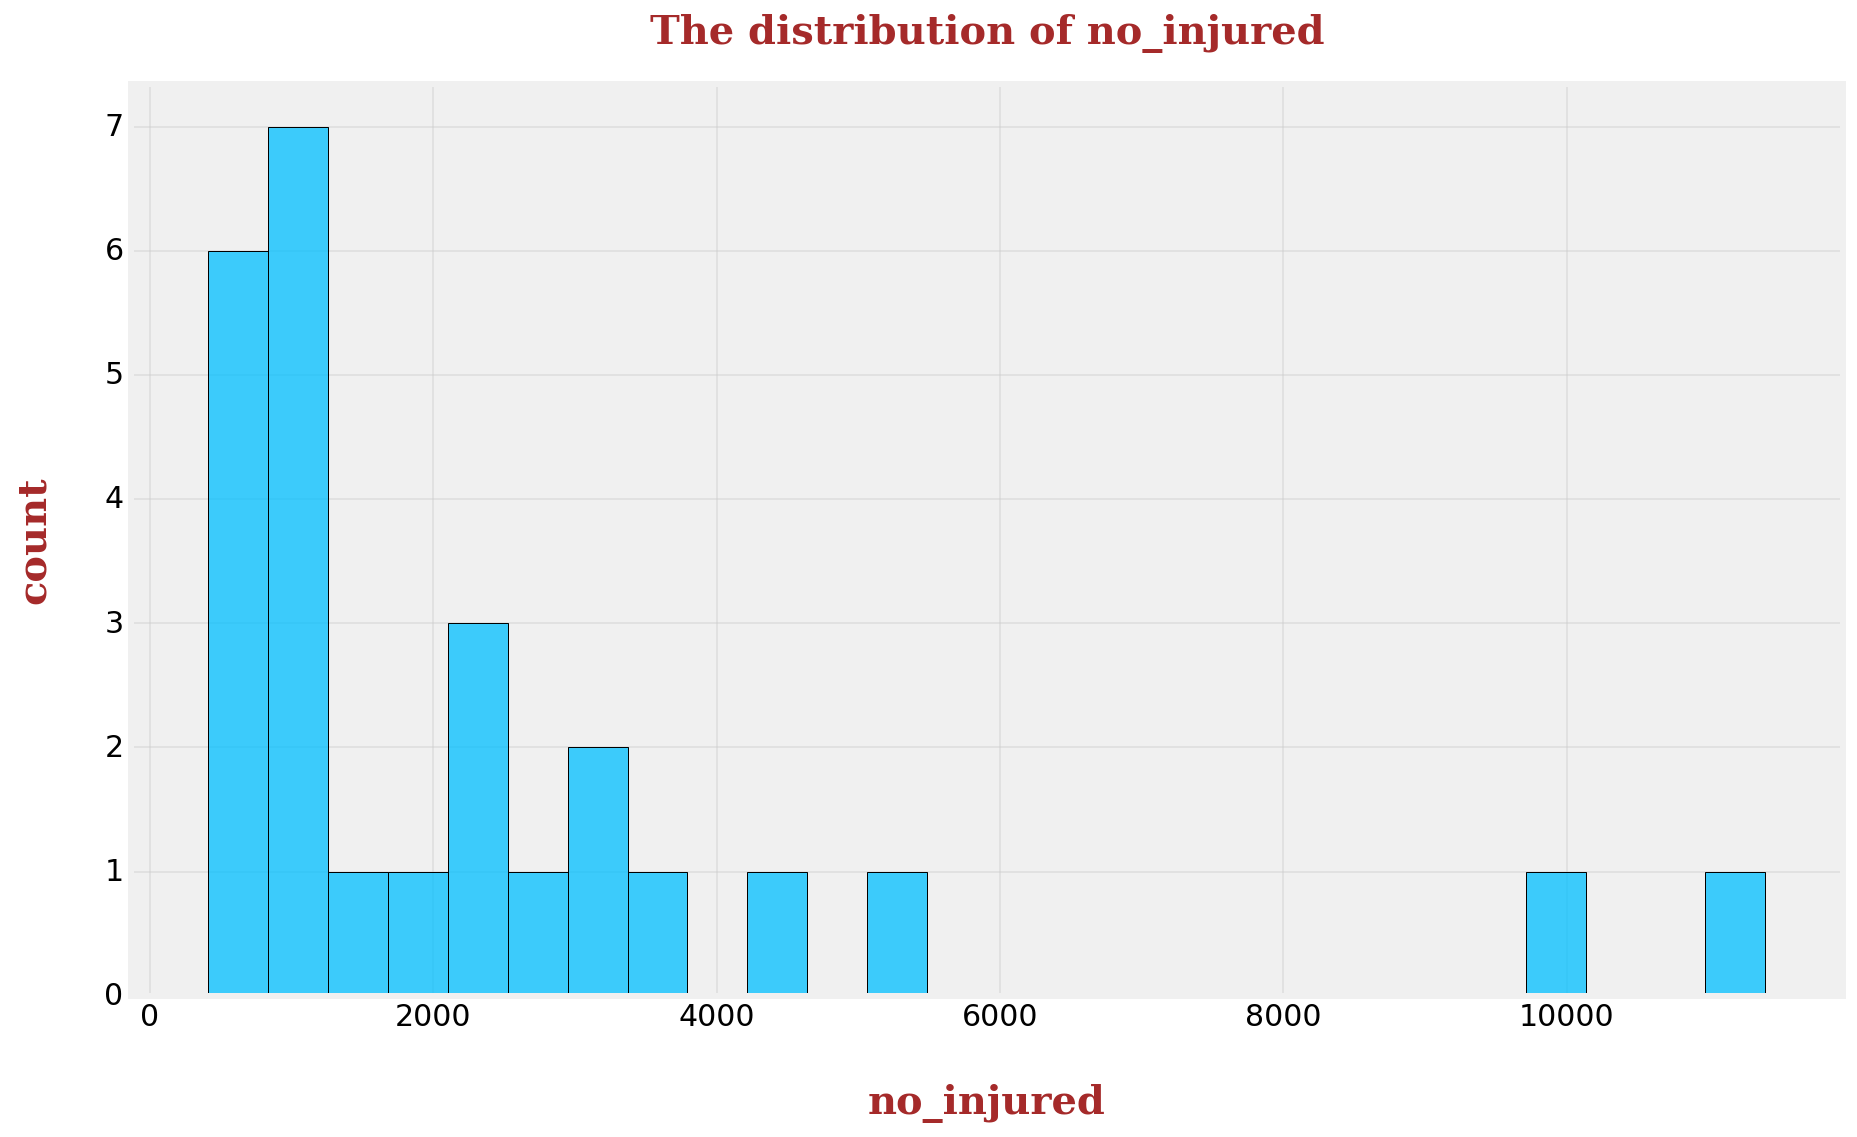

In [144]:
get_shape(new_outer_df, 'no_injured')

- **We can see from the Skew value the no_dead is skewed by `2.30` to the right (Positive). But for the plot it's worst than than previous and still not clear that it's Postive Skew but the Skew vlaue admit it. And this is because of the outilers in every plot not only for this one.**

- **All of the Skews considered as large skewed, and it is not enough to say from the above figures which type of skew that is follow, but calculating the Skew told us it's postive skew for all figures. But it won't shows in good way in the plot due to the values of datapoints.**

---

**Let's plot some differences before and after for both datasets (All interprets are at the end)**

In [145]:
def cols_plot(date, feature):
    #To use the two data sets we will use if else
    if date <= 2017:
        if feature =='number_of_licenses': #using if here to seperate columns with nans and the one without
             #Get region and feature and show data based on date, then groupby region then sort it nad plot it
            outer_df[['region',feature]][outer_df.year == date].groupby('region').sum().sort_values(feature,
                                                                             ascending=False).plot(kind='bar',
                                                                                                    figsize=(14,8),
                                                                                                    edgecolor = 'black',
                                                                                                    linewidth=1.5)
        else:
            #Get region and feature and show data based on date, then groupby region then sort it nad plot it
            outer_df[['region',feature]][outer_df.year == date].dropna().groupby('region').sum().sort_values(feature,
                                                                 ascending=False).plot(kind='bar',
                                                                                        figsize=(14,8),
                                                                                        edgecolor = 'black',
                                                                                        linewidth=1.5)        
    else:
        #Get region and feature and show data based on date, then groupby region then sort it nad plot it
        new_outer_df[['region',feature]][new_outer_df.year == date].groupby('region').sum().sort_values(feature, 
                                                                               ascending=False).plot(kind='bar',
                                                                                                    figsize=(14,8),
                                                                                                    edgecolor = 'black',
                                                                                                    linewidth=1.5)   
    #Decoration
    plt.title(f'\n{feature} for {date}\n', fontdict=font)             #Title;
    plt.xlabel('\n'+feature, fontdict=font)                           #xlabel;
    plt.ylabel('Count\n', fontdict=font)                              #ylabel;
    plt.xticks(rotation=-30, fontsize=15, horizontalalignment='left') #xticks option;
    plt.yticks( fontsize=15, verticalalignment='center');             #yticks option;
    plt.legend(bbox_to_anchor=(1, 1), fontsize=15); #legend location;
    plt.grid(alpha=0.4) #opacity of grid line

In [146]:
#Creating an interactive widgets, parm: function, widgets.
from ipywidgets import Layout
interact(cols_plot,
         date = widgets.RadioButtons(options=[2016,2017, 2018, 2019], description='Year'), #Create radio button
         feature = widgets.ToggleButtons(options=['number_of_licenses', 'no_accidents', 'no_injured','no_dead'],
                                         description='Column:', #label
                                         button_style='success', #style
                                         tooltips=['Select this column'])); #highlighted text

interactive(children=(RadioButtons(description='Year', options=(2016, 2017, 2018, 2019), value=2016), ToggleBu…

---

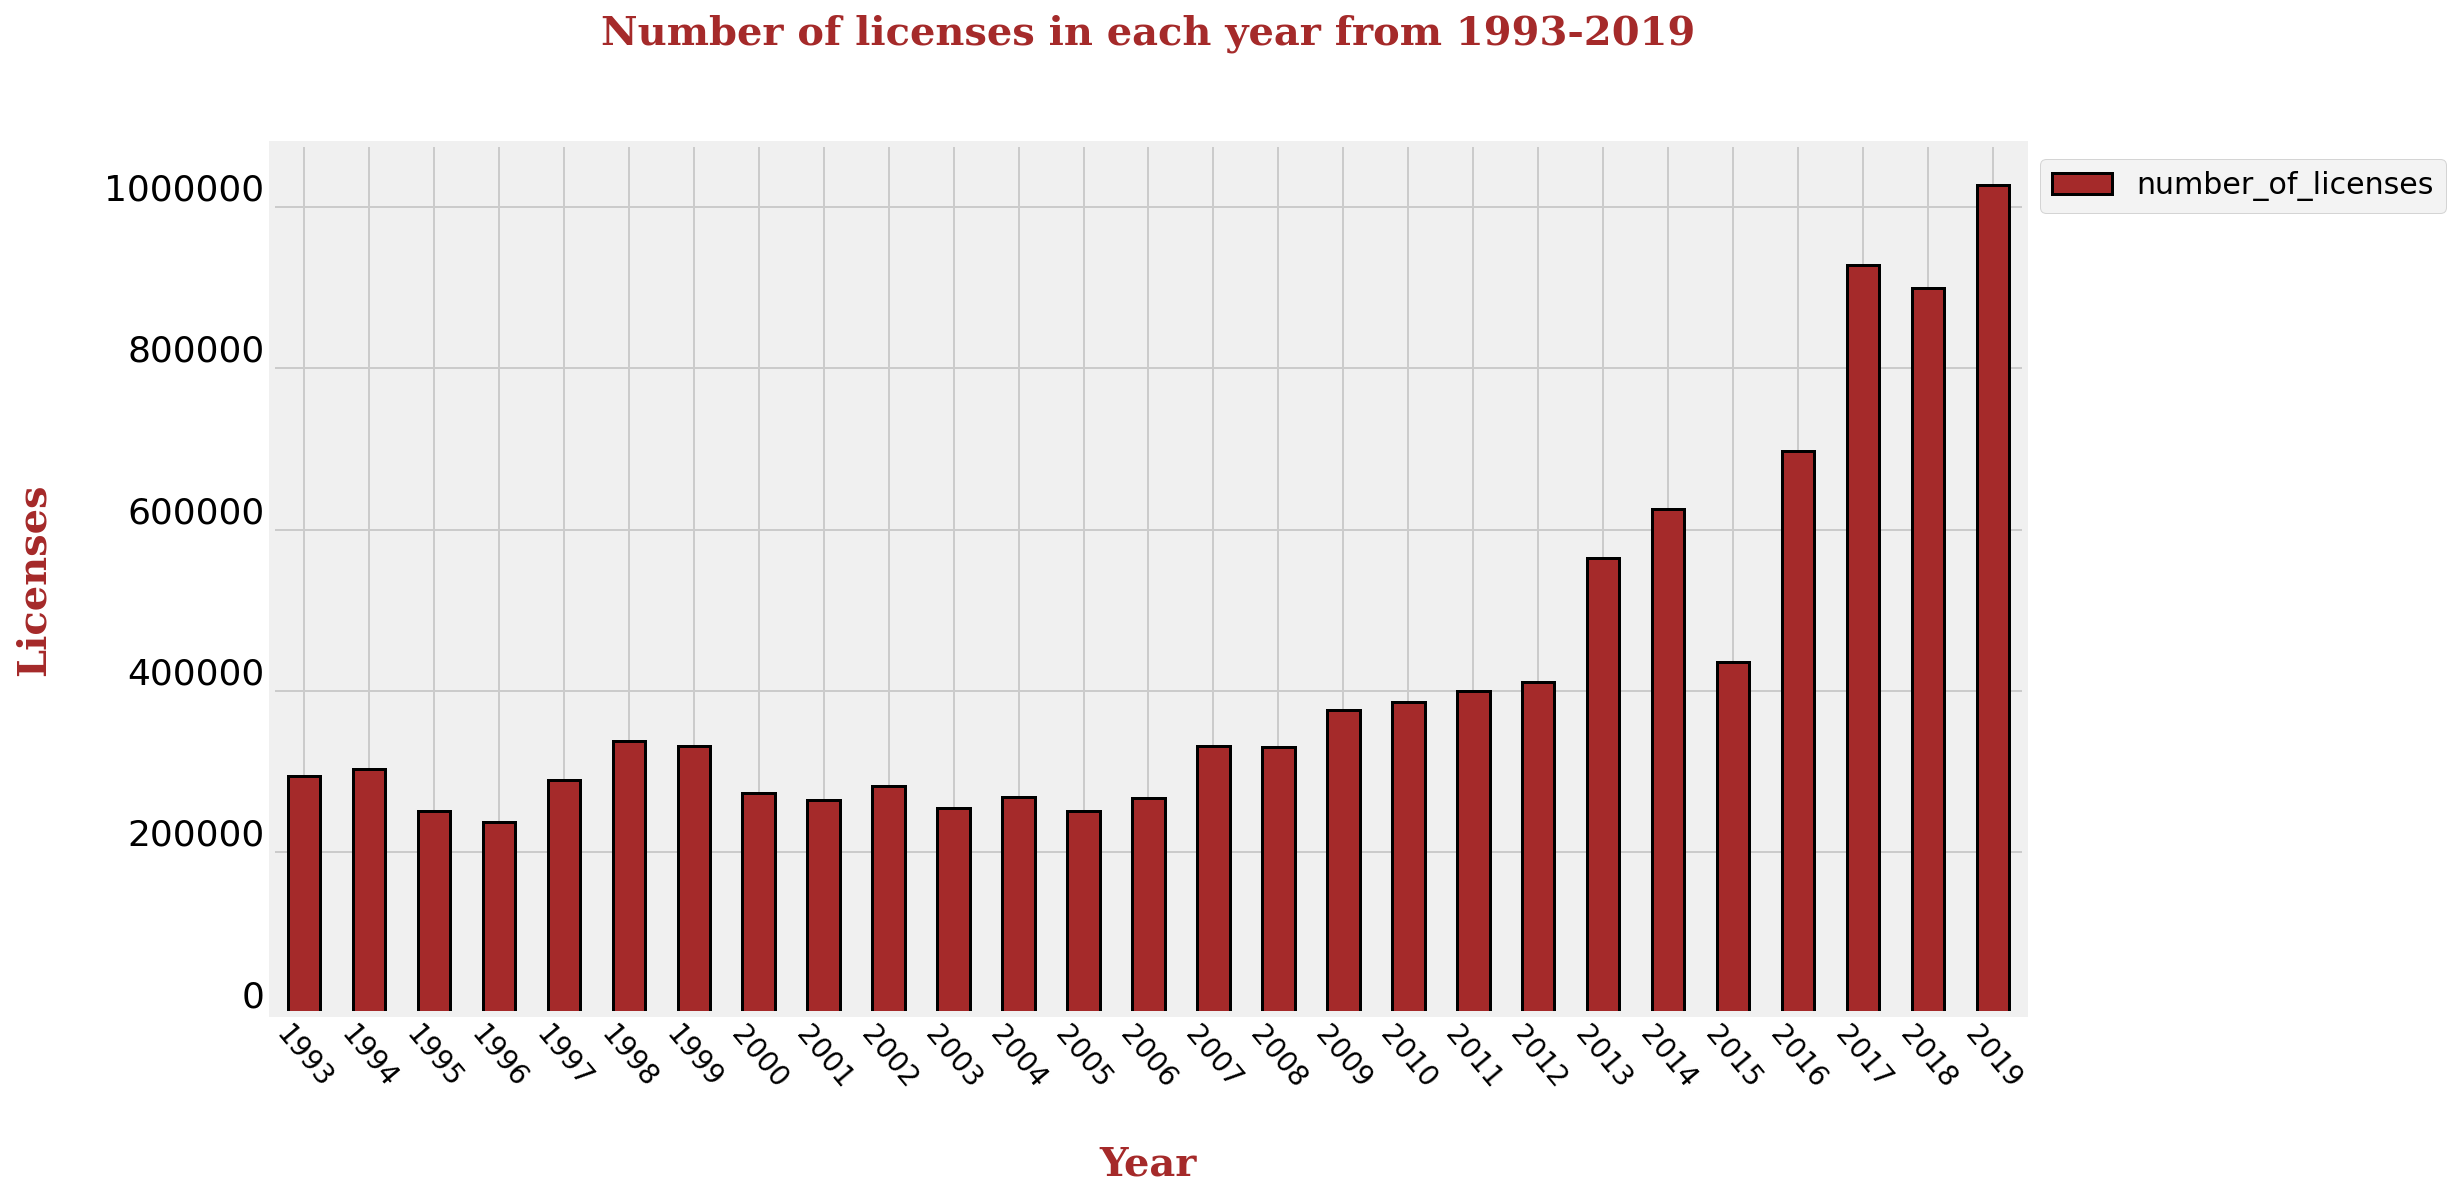

In [148]:
lics_data1 = outer_df[['year', 'region','number_of_licenses']].sort_values('number_of_licenses',
                                                                           ascending=False)         #Slice the data

lics_data2 = new_outer_df[['year', 'region','number_of_licenses']].sort_values('number_of_licenses',#Slice the data
                                                                               ascending=False).reset_index(drop=True)

row_concat_df = pd.concat([lics_data1, lics_data2], axis=0) #Concat new data as row axis

row_concat_df.groupby('year').sum().sort_values('year',ascending=True).plot(kind='bar',        #Type of plot;
                                                                        figsize=(14,8),        #Plot size;
                                                                        color = "brown",       #Color;
                                                                        edgecolor = 'black',   #Edge bar color;
                                                                        linewidth=1.5)         #Size of edge color;

plt.title('Number of licenses in each year from 1993-2019', fontdict=font, pad=50)  #Set title;

plt.xticks(rotation=-50, fontsize=14, horizontalalignment='center')            #xtricks options;
plt.yticks(fontsize=18, verticalalignment='bottom')                            #ytricks options;

plt.xlabel('\nYear',fontdict=font)                                             #xlabel;
plt.ylabel('Licenses\n',fontdict=font)                                         #ylabel;
plt.ticklabel_format(style='plain', axis='y')                                  #Disable scientific notation;
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=15);              #legend location;

---

# summary of plots and research
- From the above interactive plot, then the second plot, we can see `2017-2018-2019` years for each variable in datasets. And we can see `2018` got an increase in `number of licenses`. and for `2019` we got a large jump in `Riyadh` from `490k` to almost `690k`, and absolutely this is caused by allowing women to drive, based on [70,000 women have been issued driving licenses by June 2018](https://saudigazette.com.sa/article/561569/SAUDI-ARABIA/70000-women-obtain-Saudi-driving-licenses), This article talks about the total number of women who issued a driving license until `June 24, 2018` in `Buraidah` and by that date and I quote `“We have 65 schools all over the Kingdom to teach men and women driving”`, and `"Registration for training at the school was closed one hour after its opening but it will reopen during the second phase."` The article is not talking about all regions but, 70k in one region is capable to describe how other regions will be and with the help of Registration for training at the school was closed one hour after it open, I assume there was a huge number and by `2019` when almost every region got the driving school for women, we got that number and I think it will increase by `2020 for sure`. <br><br>

- For the number of accidents, we can see big changes from `2017-2019` for each region and for each year from the two plots, and the number of accidents has decreased from `140,000` to almost `79,000` and this is due to many things, one of the reasons is the new traffic light monitoring system which is capture who cut of the red light or turn to the right in some situations, and the new and restricted rules with new fines while using phones, not putting the seat belt, not passing other drivers from right side, and activate old rules with new fines and make it very important and placed in front of the eye. all those reasons lead us to these low numbers and if we have `2020` data we will see high numbers for licenses for both men and women based on [Women driving the transformation of the KSA automotive market](https://www.pwc.com/m1/en/publications/documents/women-driving-the-transformation-of-the-ksa-automotive-market.pdf), image credit to **PwC** analysis:
<img src="../assets/images/pwc_analysis.png" width="700">


- For `Injured` and `Deads`, it's not quite describable because some regions were low in 2017 and become higher by 2019, and some regions are not, they went down more and more than before, So no big changes to be listed but there are some changes but in low numbers.

- And for the second plot it's the same as the plot we did before, but here we added the new years, and as we can see `2018` went back a little bit, but on `2019` the total number of licenses has crossed the 1 Million line and considered the highest among of all years.

---

## Conclusions and Recommendations

- Based on the above analysis on Driving licenses from 1993-2017 and Traffic accidents from 2016-2017. We're expecting an increasing number of drivers on the roads each year from 1993 to 2017, we saw an increase in the numbers until 2015 it went down but in 2016 and 2017 it comeback with numbers more than any year before, and it's the same for accidents, injured, dead. With each year we see a region increasing and others get decreased. And based on what we did until now we can say: `Riyadh`, `Makkah` and `Eastern_Region`, are having a high number when we talk about `number of licenses` and `no accidents` over all-region and years. But for the number of licenses `Riyadh` is highest with big numbers between regions with almost `500k` licenses in a single year for `2017`.<br><br>

- Riyadh is expecting an increase in the number of licenses because each year the number is increasing in `2016` we got `242,851` and in `2017` we got `495,307` almost `+49%`incresing over a single year. So based on that and what we found from the research `Riyadh` got more licenses in `2018-2019` more than in past years. And the same for `Makkah` and `Eastern_Region`. In `2017` it got an increasing in Number of licenses we can see an increase with a number of accidents for some regions and some are lower based on `2016`, the `2017` is better for some regions like `Riyadh`, And we can see `Makkah` around `140k` licenses it got `+145k` accidents. But for Riyadh, it's Not.<br><br>


- All deads and injured in `2017` for each region, `Makkah` is the highest number of injured then `Riyadh` which is good for `Eastern` that they dropped from what happens in `2016` but `Riyadh` increased by almost `10%`. But `Makkah` still the highest among all of the regions with over `10,600` but they did well decreasing from `12,600` to know is a good thing. For deads, Makkah still in front with `2243` deaths over `2017` then `Riyadh` with `1430` deaths.<br><br>

- The accidents as we saw by each year, it got decreased by a large number and increased for some regions like `Eastern regio` and `Makkah`, but for `Riyadh` it got decreased by almost `40k` or more. And I think this is because of the new system for monitoring the roads `'ساهر'` based on [Saher cameras help reduce traffic deaths by more than 37%](https://www.arabnews.com/node/1095606/saudi-arabia), and I quote (`" Saudi Arabia has reported more than a 37 percent drop in deaths rate caused by traffic accidents following the implementation of automated Saher system, according to a study by the Riyadh-based King Abdullah International Medical Research Center (KAIMRC)."`).<br><br>
- But these data were not enough to give a good view of our data and for our recommendations. So I searched for updated data for the same dataset, and I found an updated version of it, then I made a quick analysis on it and compare it to the old data. And the summary is, `2018` got an increase in the number of licenses. and for `2019` we got a large jump in `Riyadh` from `490k` to almost `690k`, and absolutely this is caused by allowing women to drive, based on the article [70,000 women have been issued driving licenses by June 2018](https://saudigazette.com.sa/article/561569/SAUDI-ARABIA/70000-women-obtain-Saudi-driving-licenses). <br><br>

- **My recommendation is to focus on some of the regions that didn't get an effective result from new systems and rules. And try to study the environment more because, like Makkah, we have so many different drivers and the roads maybe need some fixing due to the daily huge numbers of drivers using their cars on the road, and Makkah is the center place for all Muslims, so it expects every year a huge number in some part of the year and this will affect the environment as well, So maybe if there will be a study and recreating for some roads and it's way drawn on the map, the number of injured and deads will be lower as well as the number of accidents.**
